In [1]:
shhh <- function(expr) suppressPackageStartupMessages(suppressWarnings(suppressMessages(expr)))
shhh({
library(tidyverse); 
library(lubridate); 
library(scales);
library(magrittr); 
library(dplyr);
})

In [158]:
library(IRdisplay)

display_html(
'<script>  
code_show=true; 
function code_toggle() {
  if (code_show){
    $(\'div.input\').hide();
  } else {
    $(\'div.input\').show();
  }
  code_show = !code_show
}  
$( document ).ready(code_toggle);
</script>
  <form action="javascript:code_toggle()">
    <input type="submit" value="Click here to toggle on/off the raw code.">
 </form>'
)

In [3]:
options(repr.plot.width = 15, repr.plot.height = 10)

# Logged In Users Pre and Post  User Menu Deployment Analysis

**Jennifer Wang, Staff Data Scientist, Wikimedia Foundation**

**28 October 2021**  
**24 January 2022**
**3 February 2022**

[TICKET](https://phabricator.wikimedia.org/T289574)

# Table of Contents
1. [Introduction](#Introduction)
2. [Purpose](#Purpose)
3. [Methodology](#Methodology)
4. [Trend of User Link Clicks](#Trend-of-User-Link-Clicks)
5. [Comparison of Pre and Post Deployment](#Comparison-of-Pre-and-Post-Deployment)
6. [Does edit count affect this in any way](#Does-edit-count-affect-this-in-any-way?)
7. [Pattern by edit buckets](#Pattern0-by-edit-buckets)

# Introduction
As a part of the [Desktop Improvements project](https://www.mediawiki.org/wiki/Reading/Web/Desktop_Improvements), The Wikimedia Foundation's [Web team](https://www.mediawiki.org/wiki/Readers/Web/Team) is introducing a new way to display the user tools found at the top of the page. The original user tools appear as links at the top of the page. The new solution reorganized the tools under a single menu that will allow users easy access to their user tools and make the navigation more intuitive by visually highlighting the structure of user links and their purpose. You can find more information on this change and other feature deployments on the [User menu project page](https://www.mediawiki.org/wiki/Reading/Web/Desktop_Improvements/Features/User_menu).

User menu is deployed on logged-in users on all early adopter wikis in August 10,  2021.  This report details the analysis and results for the deployment of user menu on logged-in users.

Polit wikis are:  
        - French Wikitionary (frwiktionary)   
        - Hebrew Wikipedia (hewiki)    
        - Portuguese Wikiversity (ptwikiversity)   
        - French Wikipedia (frwiki)     
        - Basque Wikipedia (euwiki)  
        - Persian Wikipedia (fawiki)  
        - Portuguese Wikipedia (ptwiki)  
        - Korean Wikipedia (kowiki)  
        - Turkish Wikipedia (trwiki)  
        - Serbian Wikipedia (srwiki)  
        - Bengali Wikipedia (bnwiki)  
        - German Wikivoyage (dewikivoyage)  
        - Venetian Wikipedia (vecwiki)  
        - Wikimedia Incubator (incubatorwiki)  

__New feature -- user tools under user menu__
<img src="Figures/new.png" width="600" height="400" align="center"/>

__Old feature -- user tools without user menu__

<img src="Figures/old.png" width="600" height="360" align="center"/>

# Purpose

The goal of the pre-post analysis is to identify any changes in user behavior that might have resulted from the deployment of the user menu feature. Our hypothesis is that while we decrease visual clutter on interface, the clicks on user tools under user menu will slightly lower than the original design. 

# Methodology

We reviewed the total number of clicks on each available user tools by each pilot wikis. We mainly focused on the logged-in users because this feature is designed for logged-in users. 

We selected a period of 4 weeks before the deployment as the pre deployment period, i.e. 2021-07-13 ~  2021-08-09 .  Post period analysis reviewed the numbers within the 4 weeks since the deployment, i.e. 2021-08-10  ~  2021-09-06.

The clicks on some user tools on some wikis are too few to show a consistent trend. When we analyze the pattern by editing buckets, we look at the total number of clicks from all wikis on each user tool.



# Trend of User Menu Clicks

In [4]:
query_user_link_clicks <- 
"
SELECT TO_DATE(dt) AS event_date, 
    wiki, 
    event.name, 
    event.isAnon, 
    COUNT(1) AS clicks 
FROM event_sanitized.desktopwebuiactionstracking 
WHERE year=2021 and month >=7
AND event.action='click' 
AND event.name IN ('ui.dropdown-p-personal', 'pt-watchlist' , 'pt-mytalk', 
'pt-sandbox', 'pt-preferences', 'pt-betafeatures', 'pt-mycontris', 'pt-logout') 
AND wiki IN ('frwiktionary' , 'hewiki' ,'ptwikiversity' ,'frwiki', 'euwiki' ,
         'fawiki' ,'ptwiki' , 'kowiki' , 'trwiki' , 'srwiki' , 'bnwiki' , 'dewikivoyage' ,
         'vecwiki' , 'incubatorwiki' )
GROUP BY  TO_DATE(dt) , wiki, event.name, event.isAnon
"

In [5]:
df_user_link_clicks <-  wmfdata::query_hive(query_user_link_clicks)

Don't forget to authenticate with Kerberos using kinit



In [6]:
df_user_link_clicks$event_date <- as.Date(df_user_link_clicks$event_date)

In [7]:
head(df_user_link_clicks)

event_date wiki   name       isanon clicks
1 2021-07-01 bnwiki pt-mytalk  false   6    
2 2021-07-01 fawiki pt-sandbox false  18    
3 2021-07-01 trwiki pt-sandbox false   6    
4 2021-07-02 bnwiki pt-mytalk  false   6    
5 2021-07-02 fawiki pt-sandbox false   9    
6 2021-07-02 trwiki pt-sandbox false  11

In [8]:
df_user_link_clicks <- df_user_link_clicks %>%
mutate(
wiki_name = case_when( #clarfiy Wiki project names
        wiki == 'frwiktionary' ~ "French Wikitionary",
        wiki == 'hewiki' ~ 'Hebrew Wikipedia',
        wiki == 'ptwikiversity' ~ 'Portuguese Wikiversity',
        wiki == 'frwiki'~ "French Wikipedia",
        wiki == 'euwiki' ~ "Basque Wikipedia",
        wiki == 'fawiki' ~ 'Persian Wikipedia',
        wiki == 'ptwiki' ~ 'Portuguese Wikipedia',
        wiki == 'kowiki' ~ 'Korean Wikipedia',
        wiki == 'trwiki' ~ 'Turkish Wikipedia',
        wiki == 'srwiki' ~ 'Serbian Wikipedia',
        wiki == 'bnwiki' ~ 'Bengali Wikipedia',
        wiki == 'dewikivoyage' ~ 'German Wikivoyage',
        wiki == 'vecwiki' ~ 'Venetian Wikipedia',
        wiki == 'incubatorwiki' ~ 'Wikimedia Incubator'),
)

In [8]:
df_user_munu <- df_user_link_clicks %>%
    filter((isanon=='false') & (name=='ui.dropdown-p-personal')) 



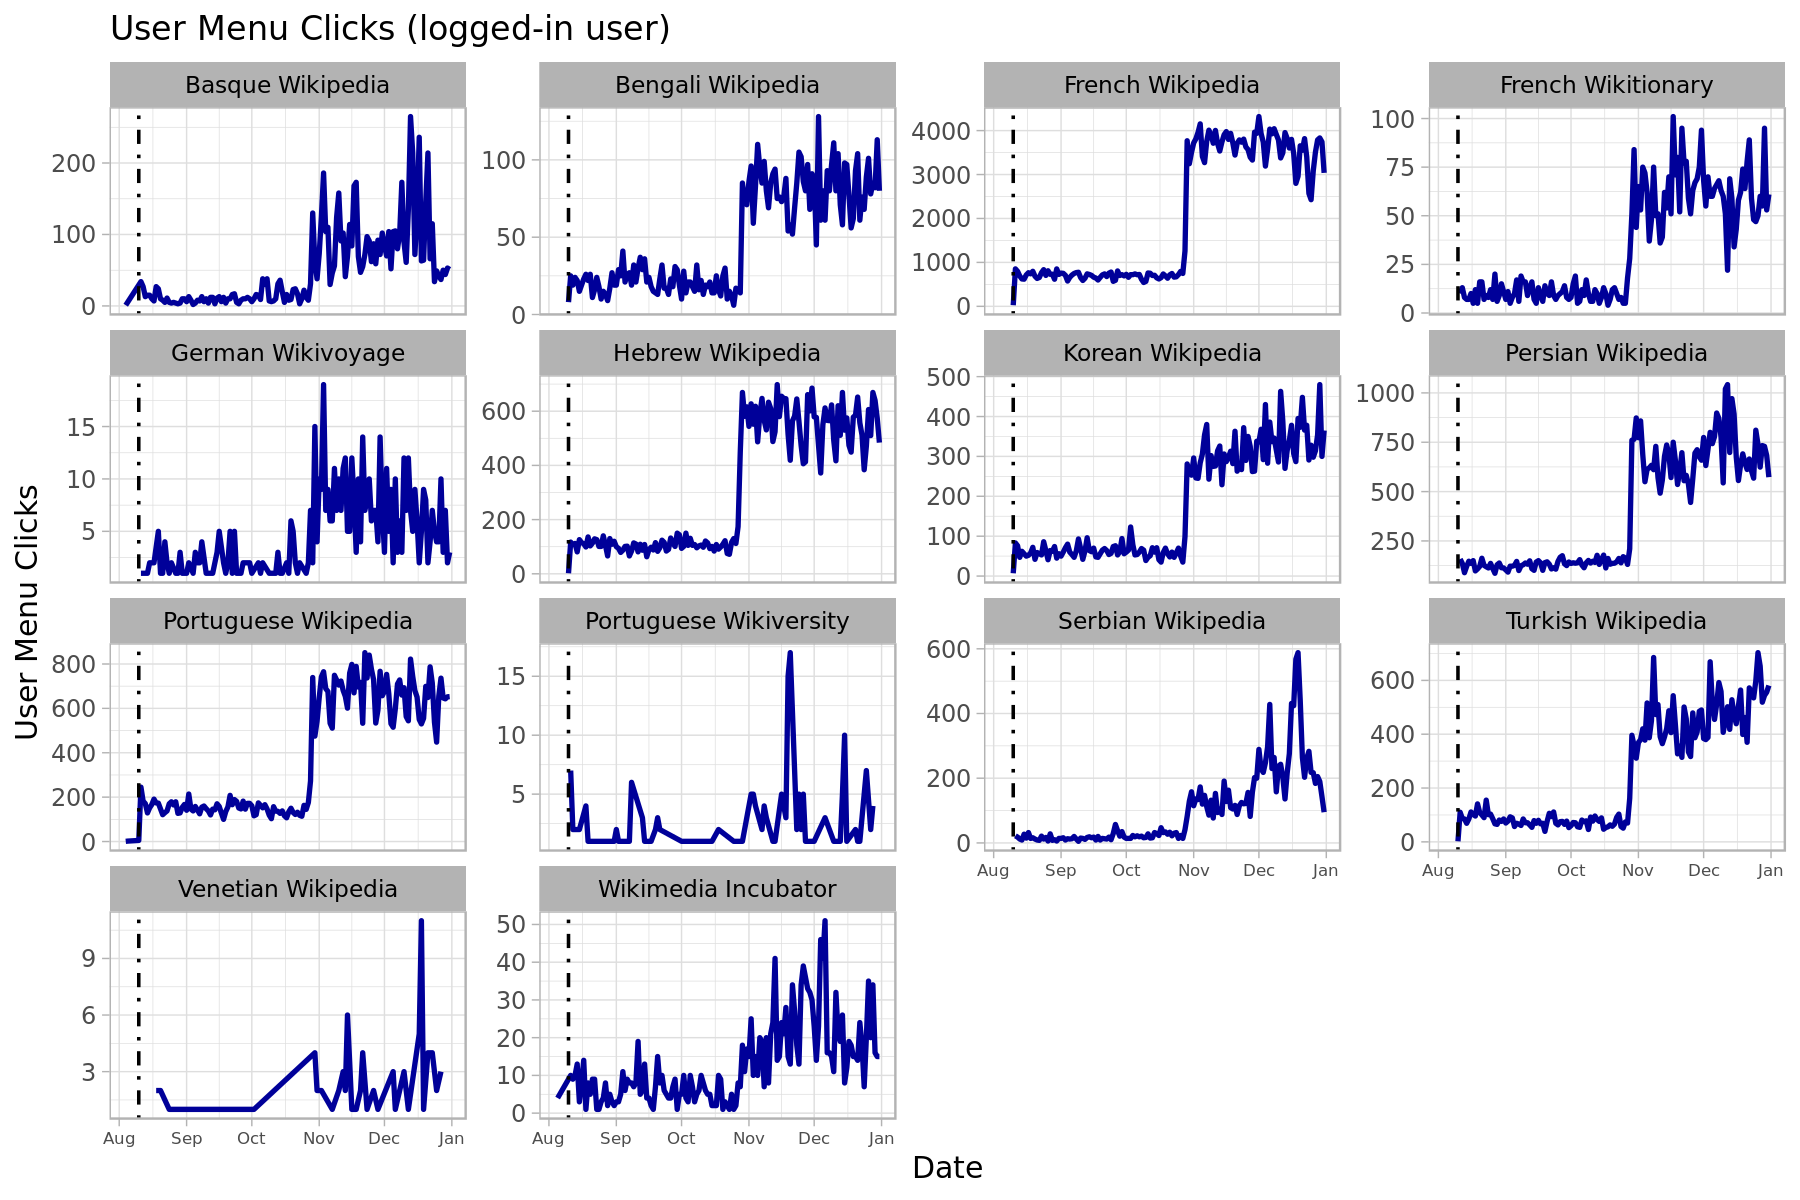

In [11]:
menu_g <- ggplot(data=filter( df_user_link_clicks,  (name=='ui.dropdown-p-personal')&(isanon=='false')), 
                                mapping=aes(x=event_date)) +
geom_line(aes(y=clicks ), color="#000099" , size = 1.5) +
geom_vline(aes(xintercept = as.numeric(as.Date('2021-08-10'))), linetype="dotdash", color="black", size=1)+
facet_wrap(~wiki_name,nrow=4,scale = 'free_y')+
labs(title = 'User Menu Clicks (logged-in user) ',
     x = 'Date',
     y = 'User Menu Clicks') +
theme_light(base_size=18) +
theme(legend.position = "bottom", 
     plot.caption = element_text(hjust = 0, face= "italic"),
     strip.text = element_text(size = 14, colour='black'),
     axis.text.x = element_text( size = 10 ),
     plot.title = element_text(size=20))
menu_g

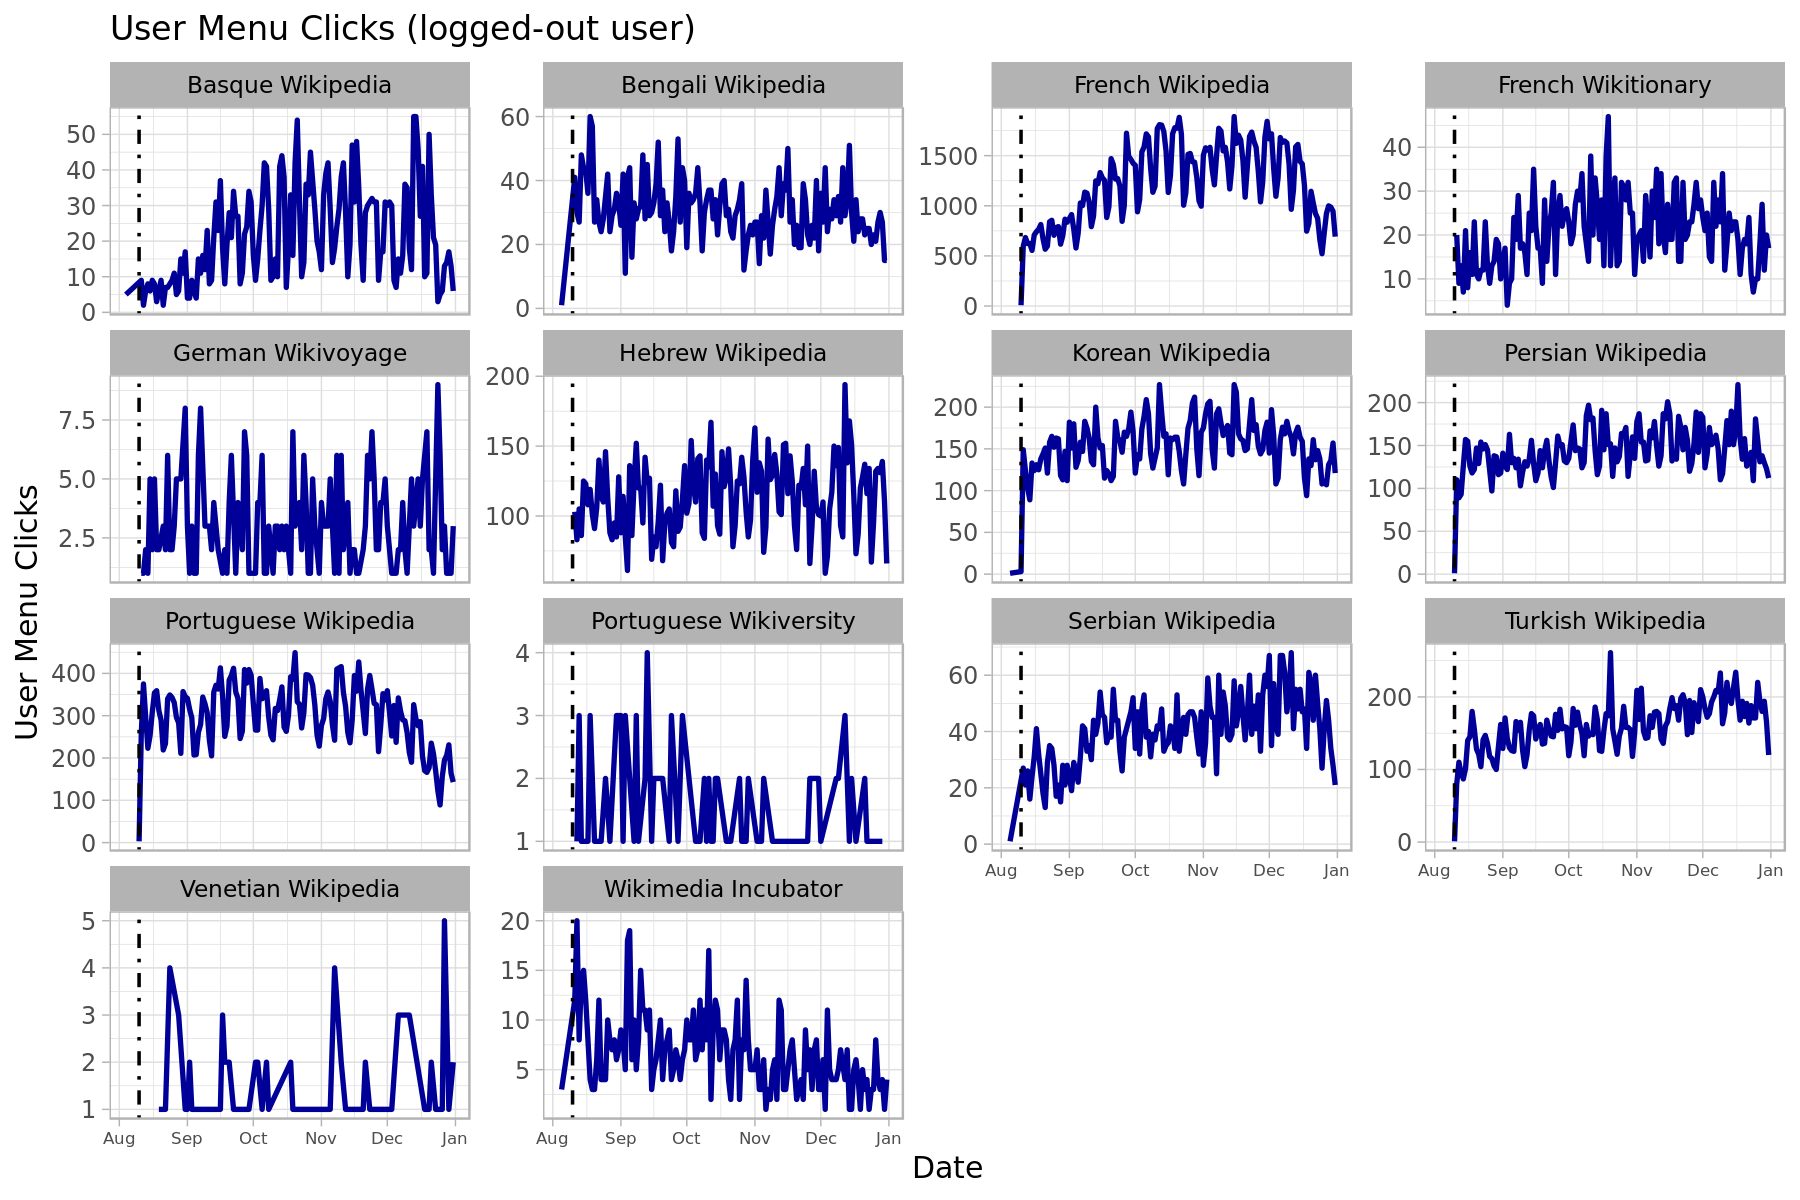

In [12]:
menu_anon_g <- ggplot(data=filter( df_user_link_clicks,  (name=='ui.dropdown-p-personal')&(isanon=='true')), 
                                mapping=aes(x=event_date)) +
geom_line(aes(y=clicks ), color="#000099" , size = 1.5) +
geom_vline(aes(xintercept = as.numeric(as.Date('2021-08-10'))), linetype="dotdash", color="black", size=1)+
facet_wrap(~wiki_name,nrow=4,scale = 'free_y')+
labs(title = 'User Menu Clicks (logged-out user) ',
     x = 'Date',
     y = 'User Menu Clicks') +
theme_light(base_size=18) +
theme(legend.position = "bottom", 
     plot.caption = element_text(hjust = 0, face= "italic"),
     strip.text = element_text(size = 14, colour='black'),
     axis.text.x = element_text( size = 10 ),
     plot.title = element_text(size=20))
menu_anon_g

__Summary__


User dropdown menu is in use since 2021-08-10.

# Trend of User Link Clicks

## By wiki and user tool

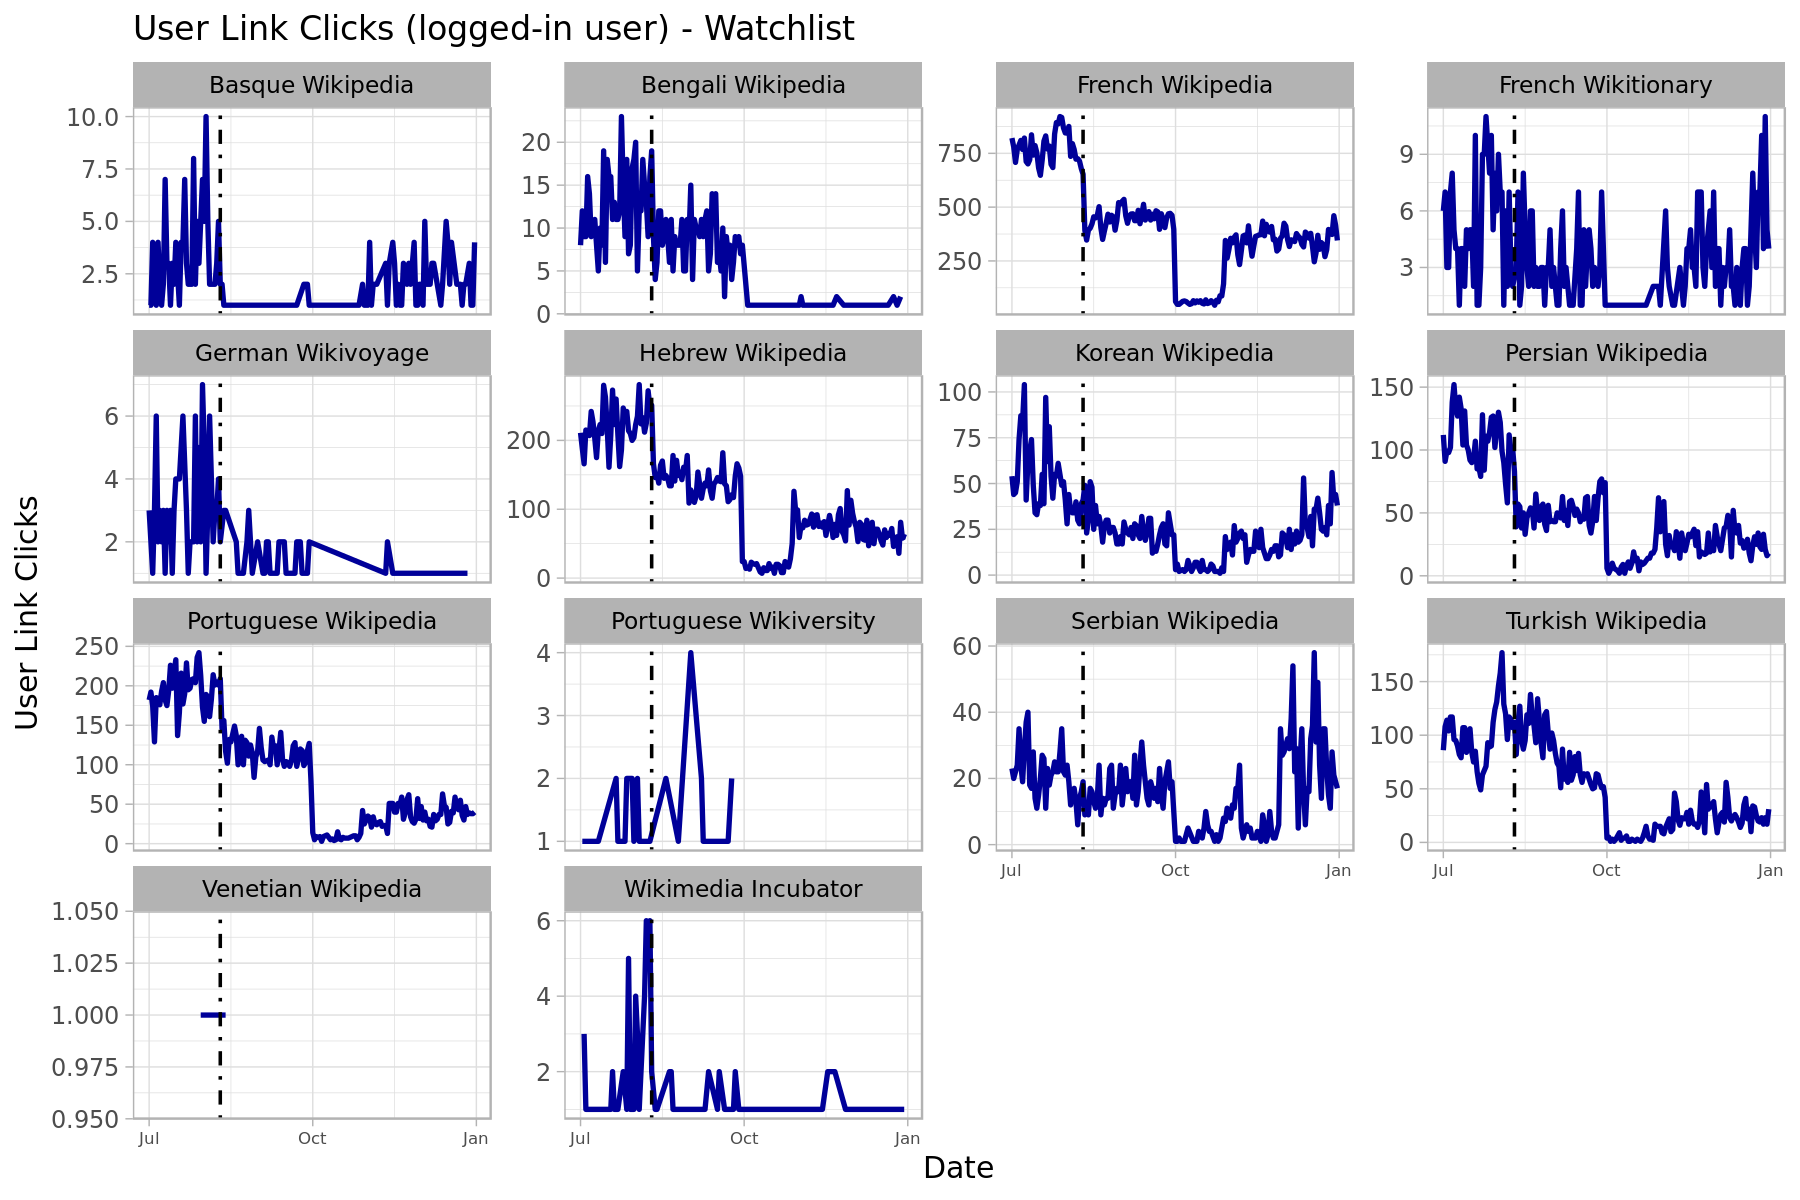

In [13]:
watchlist_g <- ggplot(data=filter( df_user_link_clicks,  (name=='pt-watchlist')&(isanon=='false')), 
                                mapping=aes(x=event_date)) +
geom_line(aes(y=clicks ), color="#000099" , size = 1.5) +
geom_vline(aes(xintercept = as.numeric(as.Date('2021-08-10'))), linetype="dotdash", color="black", size=1)+
facet_wrap(~wiki_name,nrow=4,scale = 'free_y')+
labs(title = 'User Link Clicks (logged-in user) - Watchlist ',
     x = 'Date',
     y = 'User Link Clicks') +
theme_light(base_size=18) +
theme(legend.position = "bottom", 
     plot.caption = element_text(hjust = 0, face= "italic"),
     strip.text = element_text(size = 14, colour='black'),
     axis.text.x = element_text( size = 10 ),
     plot.title = element_text(size=20))
     
watchlist_g 

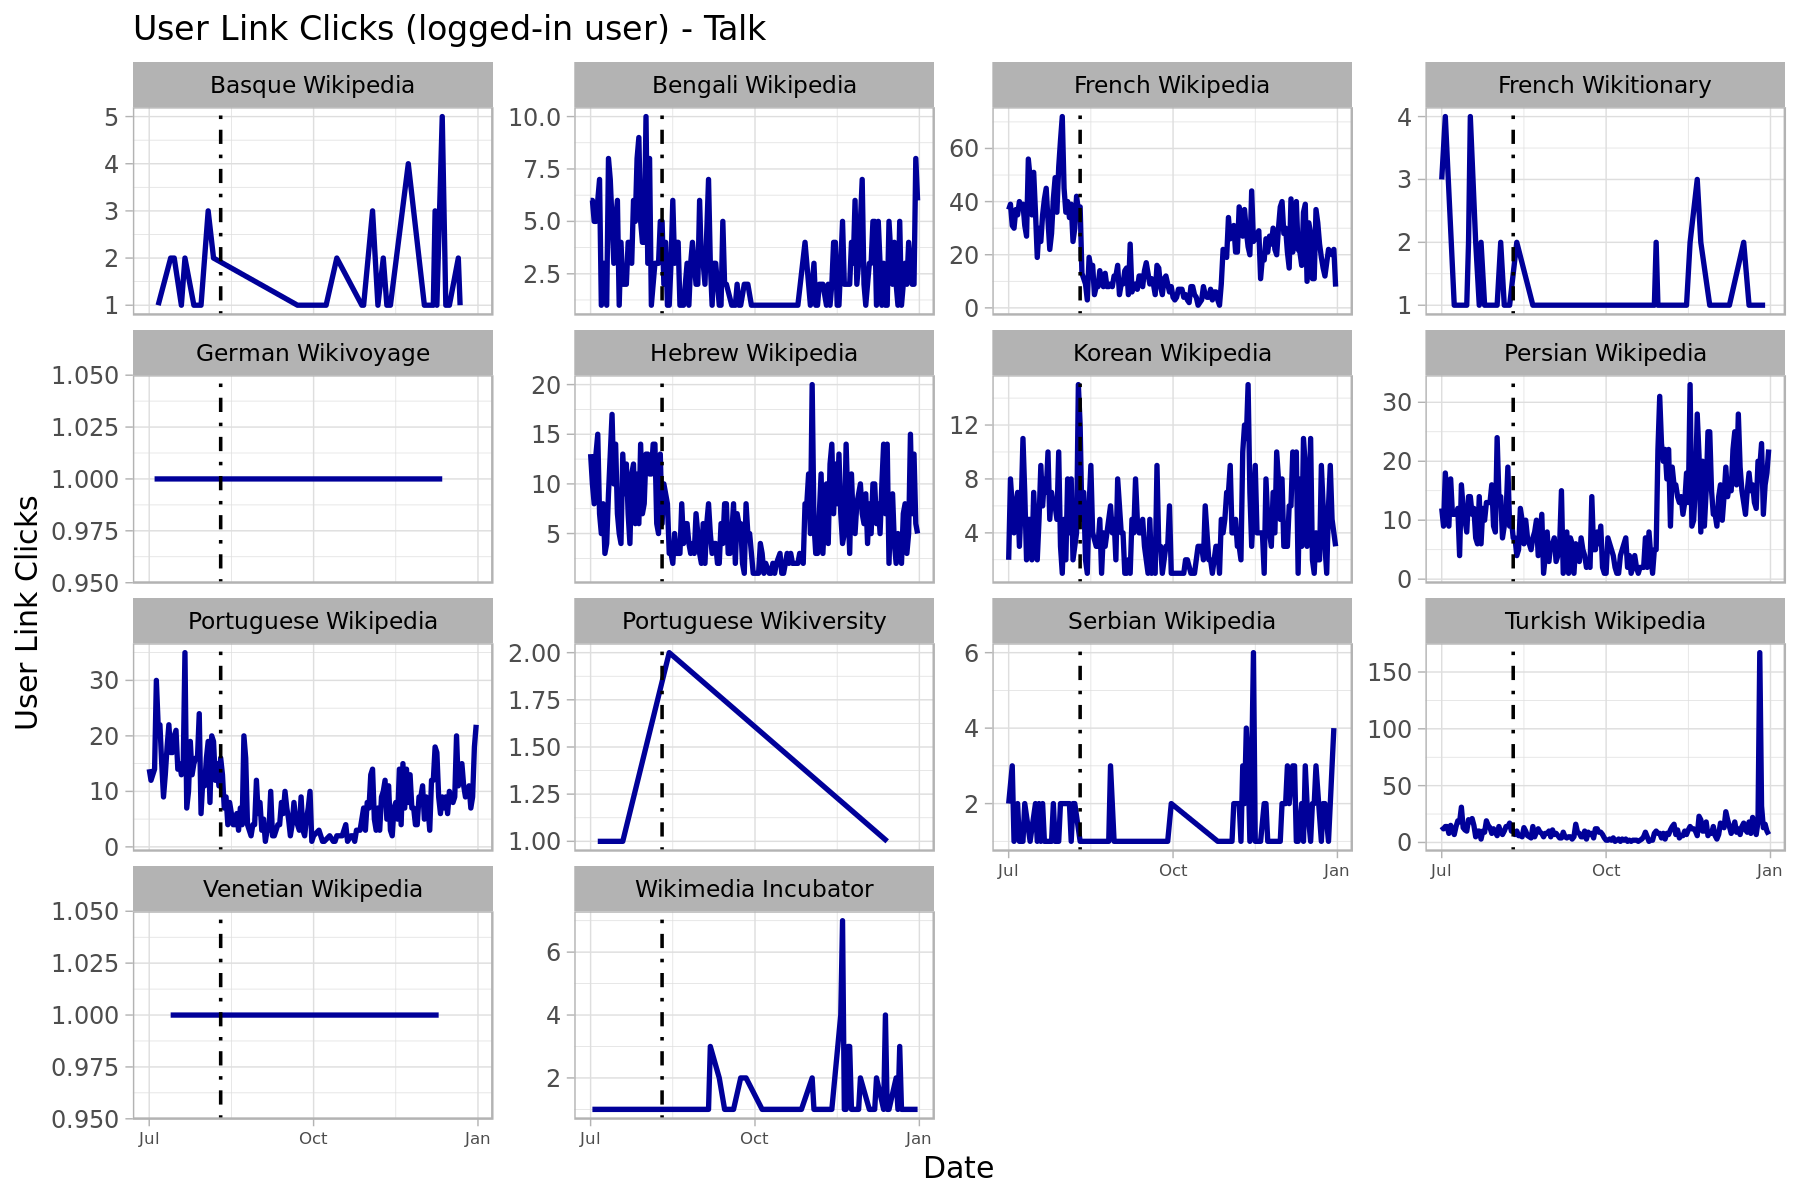

In [14]:
talk_g <- ggplot(data=filter( df_user_link_clicks,  (name=='pt-mytalk')&(isanon=='false')), 
                                mapping=aes(x=event_date)) +
geom_line(aes(y=clicks ), color="#000099" , size = 1.5) +
geom_vline(aes(xintercept = as.numeric(as.Date('2021-08-10'))), linetype="dotdash", color="black", size=1)+
facet_wrap(~wiki_name,nrow=4,scale = 'free_y')+
labs(title = 'User Link Clicks (logged-in user) - Talk ',
     x = 'Date',
     y = 'User Link Clicks') +
theme_light(base_size=18) +
theme(legend.position = "bottom", 
     plot.caption = element_text(hjust = 0, face= "italic"),
     strip.text = element_text(size = 14, colour='black'),
     axis.text.x = element_text( size = 10 ),
     plot.title = element_text(size=20))
     
talk_g 

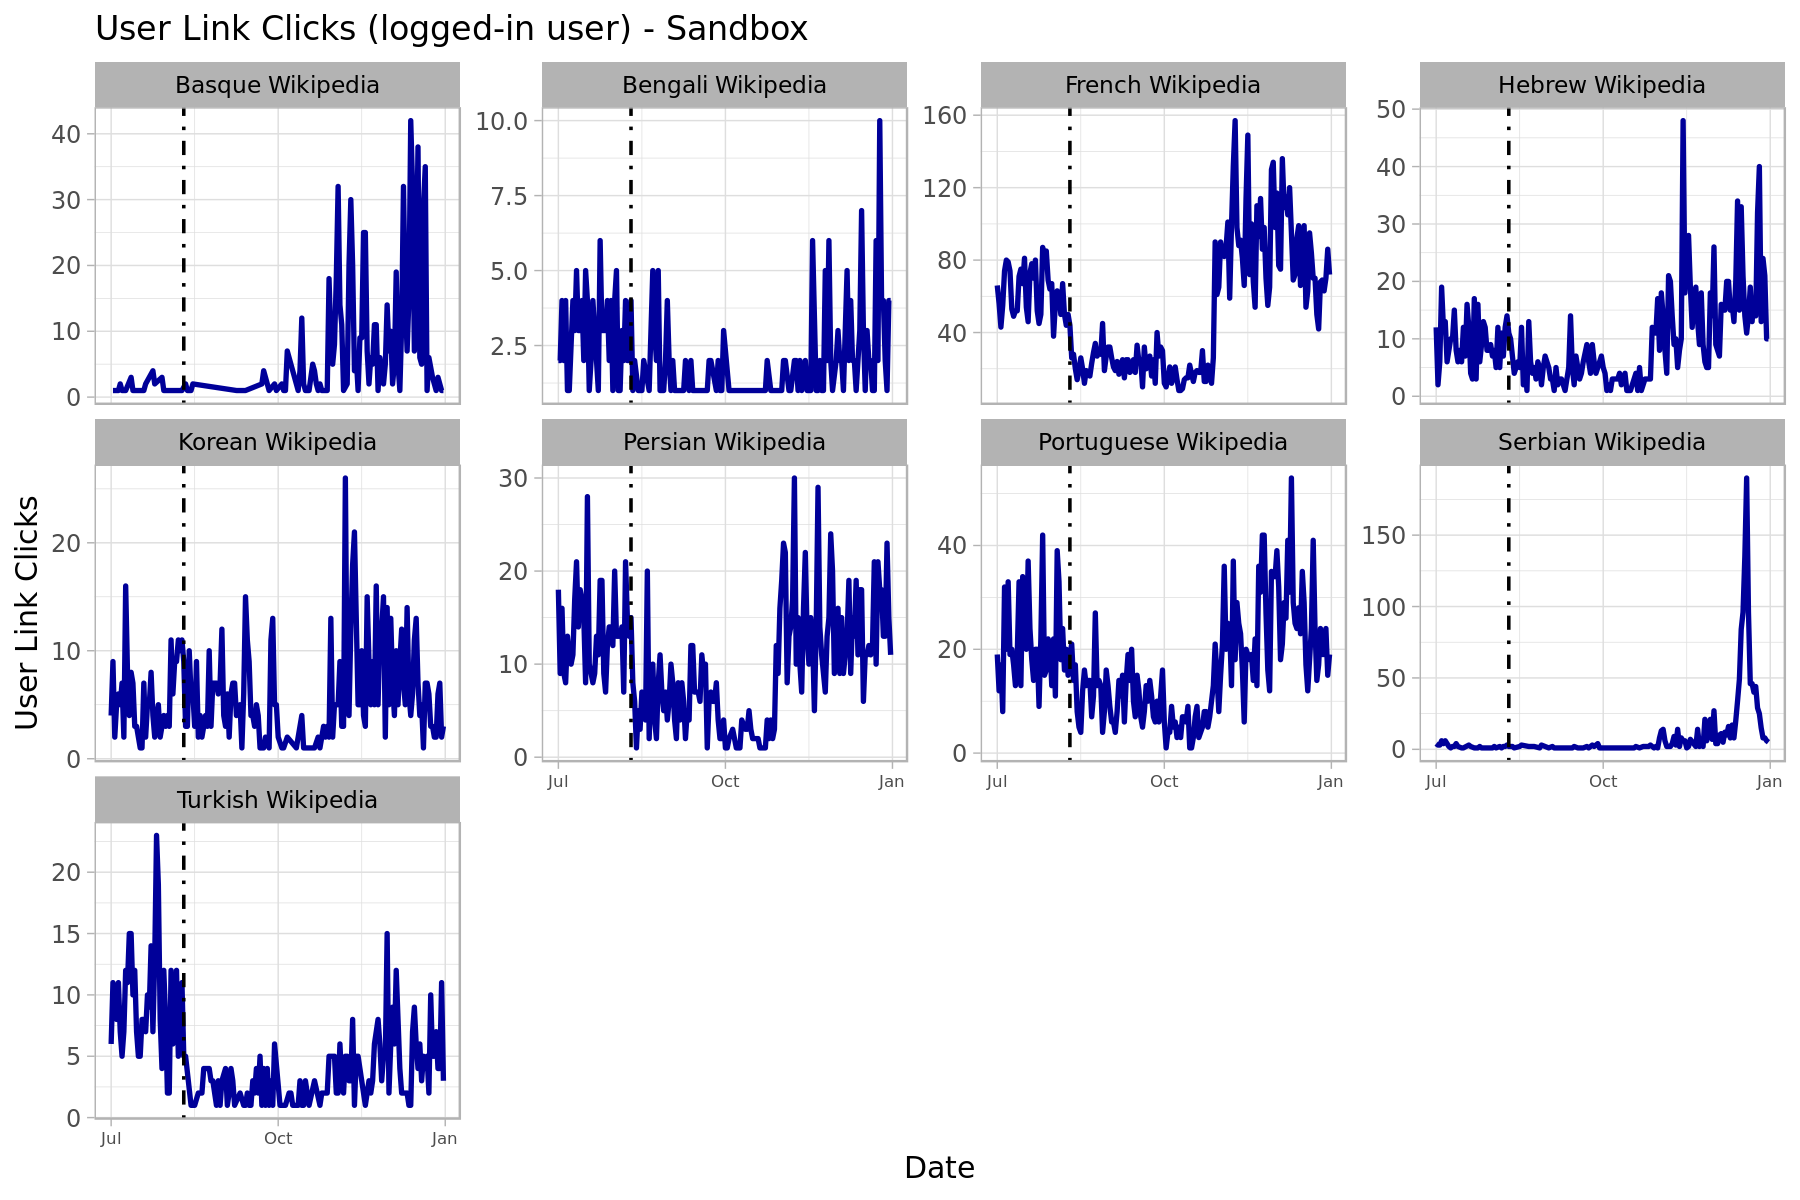

In [15]:
sandbox_g <- ggplot(data=filter( df_user_link_clicks,  (name=='pt-sandbox')&(isanon=='false')),
                                mapping=aes(x=event_date)) +
geom_line(aes(y=clicks ), color="#000099" , size = 1.5) +
geom_vline(aes(xintercept = as.numeric(as.Date('2021-08-10'))), linetype="dotdash", color="black", size=1)+
facet_wrap(~wiki_name,ncol=4,scale = 'free_y')+
labs(title = 'User Link Clicks (logged-in user) - Sandbox ',
     x = 'Date',
     y = 'User Link Clicks') +
theme_light(base_size=18) +
theme(legend.position = "bottom", 
     plot.caption = element_text(hjust = 0, face= "italic"),
     strip.text = element_text(size = 14, colour='black'),
     axis.text.x = element_text( size = 10 ),
     plot.title = element_text(size=20))
     
sandbox_g 

geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?



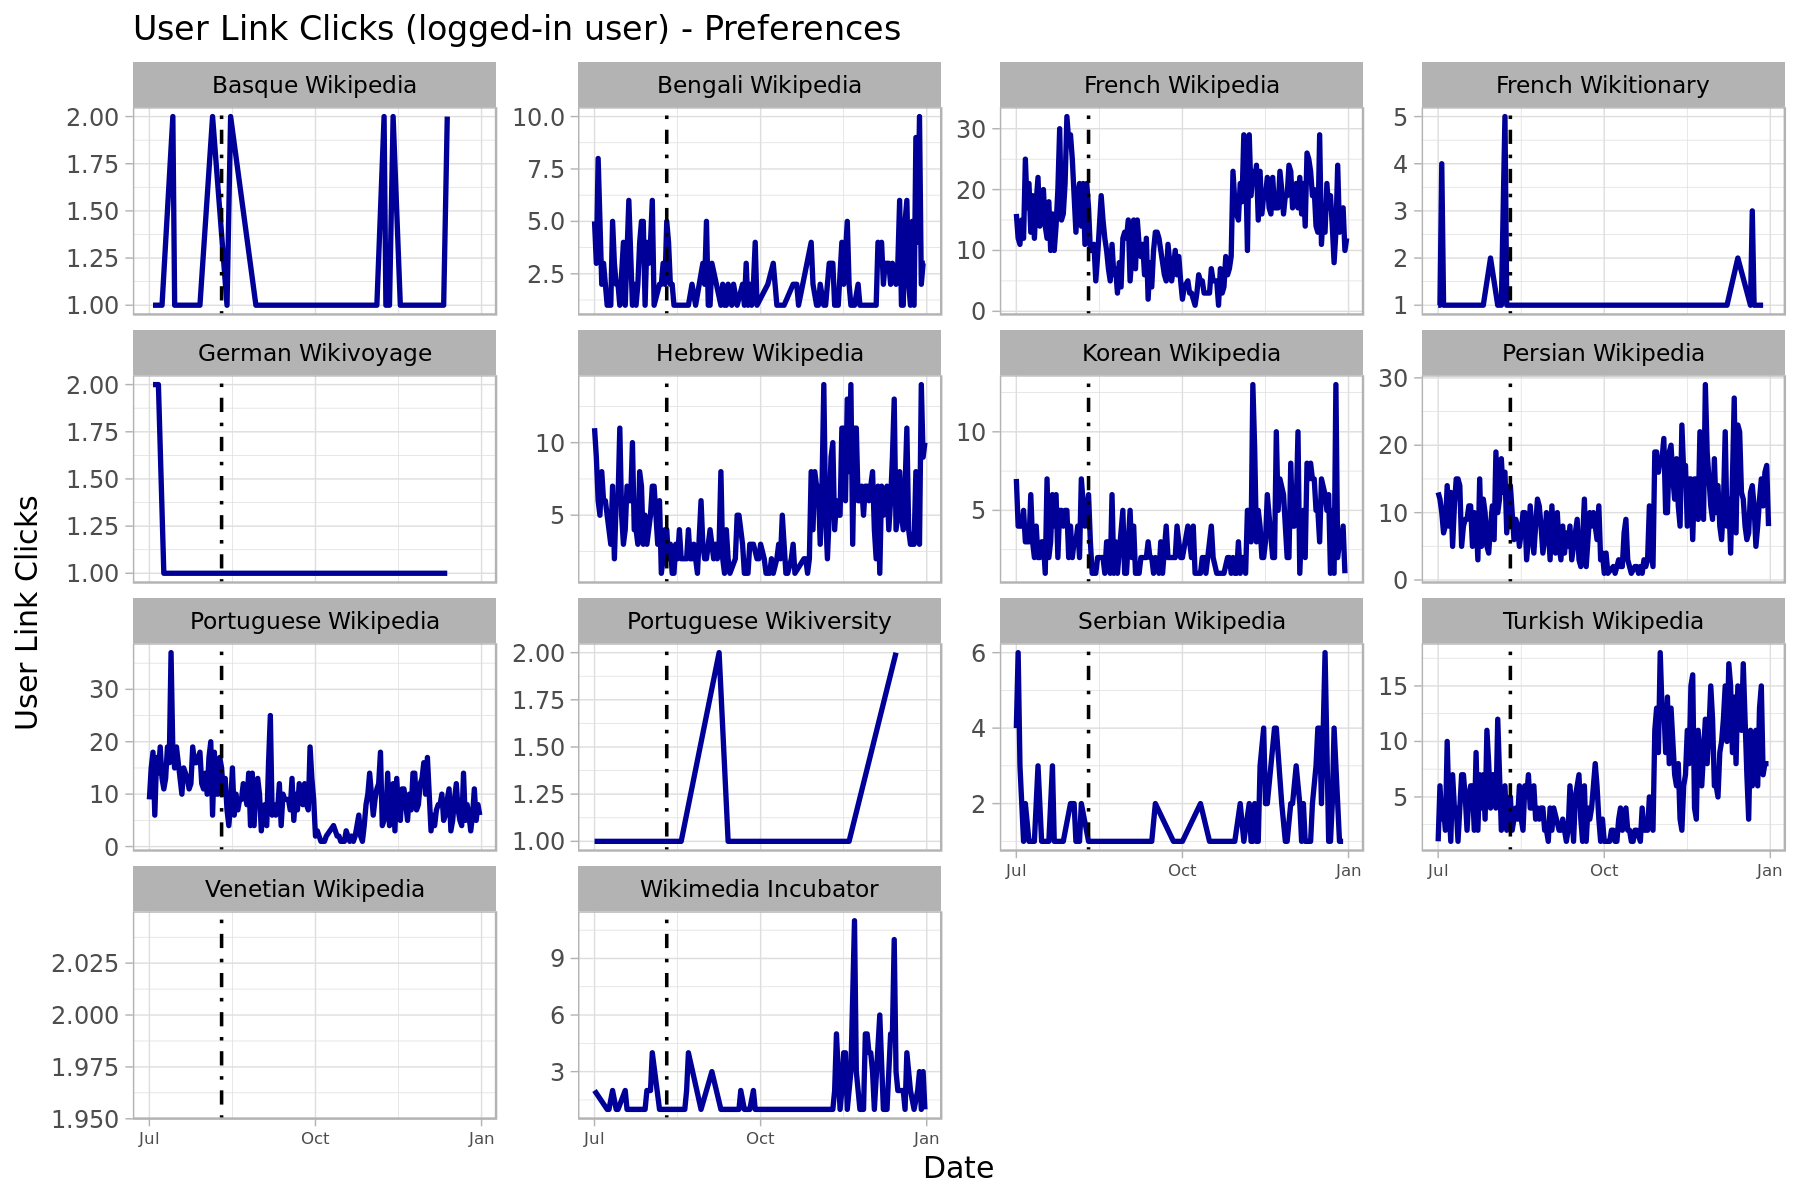

In [16]:
preferences_g <- ggplot(data=filter( df_user_link_clicks,  (name=='pt-preferences')&(isanon=='false')),
                                mapping=aes(x=event_date)) +
geom_line(aes(y=clicks ), color="#000099" , size = 1.5) +
geom_vline(aes(xintercept = as.numeric(as.Date('2021-08-10'))), linetype="dotdash", color="black", size=1)+
facet_wrap(~wiki_name,nrow=4,scale = 'free_y')+
labs(title = 'User Link Clicks (logged-in user) - Preferences ',
     x = 'Date',
     y = 'User Link Clicks') +
theme_light(base_size=18) +
theme(legend.position = "bottom", 
     plot.caption = element_text(hjust = 0, face= "italic"),
     strip.text = element_text(size = 14, colour='black'),
     axis.text.x = element_text( size = 10 ),
     plot.title = element_text(size=20))
     
preferences_g 

geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?



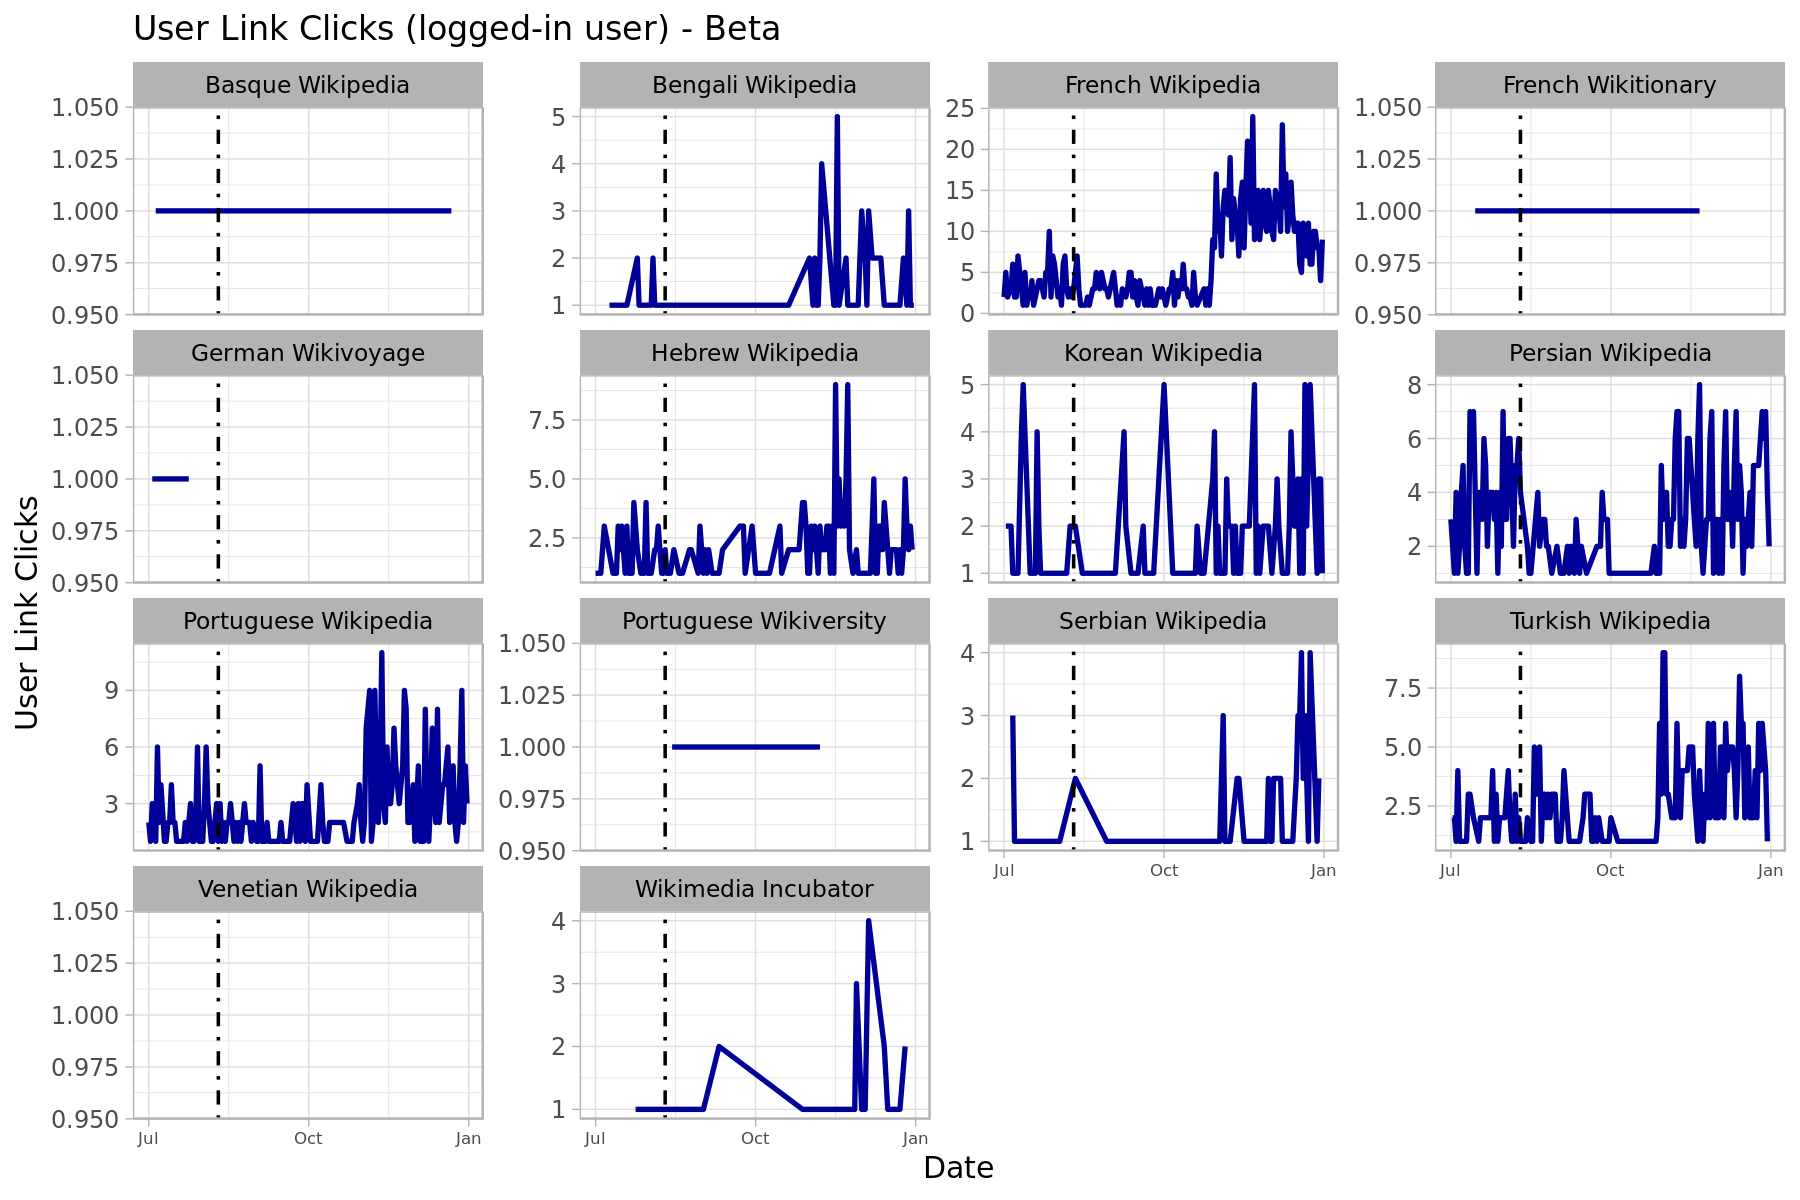

In [18]:
beta_g <- ggplot(data=filter( df_user_link_clicks,  (name=='pt-betafeatures')&(isanon=='false')),
                                mapping=aes(x=event_date)) +
geom_line(aes(y=clicks ), color="#000099" , size = 1.5) +
geom_vline(aes(xintercept = as.numeric(as.Date('2021-08-10'))), linetype="dotdash", color="black", size=1)+
facet_wrap(~wiki_name,ncol=4,scale = 'free_y')+
labs(title = 'User Link Clicks (logged-in user) - Beta ',
     x = 'Date',
     y = 'User Link Clicks') +
theme_light(base_size=18) +
theme(legend.position = "bottom", 
     plot.caption = element_text(hjust = 0, face= "italic"),
     strip.text = element_text(size = 14, colour='black'),
     axis.text.x = element_text( size = 10 ),
     plot.title = element_text(size=20))
     
beta_g 

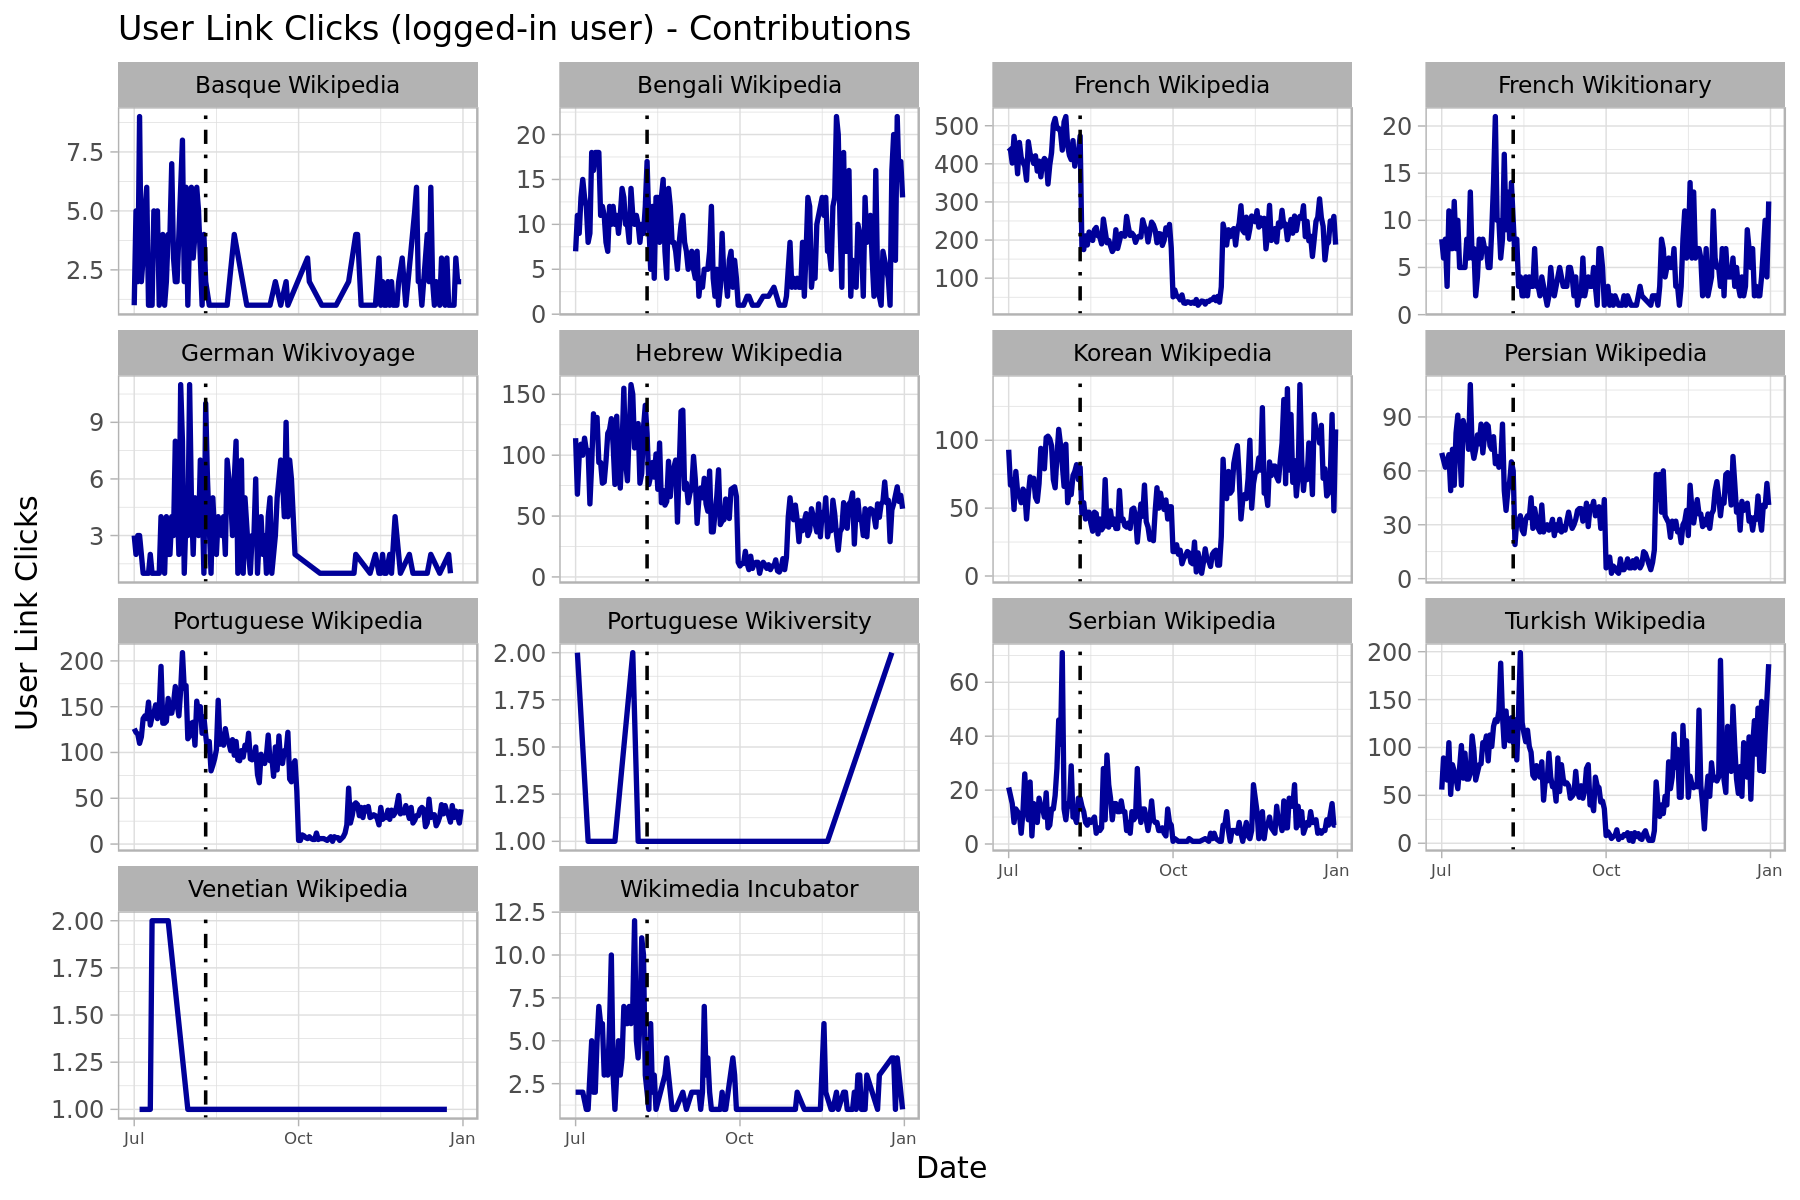

In [19]:
contri_g <- ggplot(data=filter( df_user_link_clicks,  (name=='pt-mycontris')&(isanon=='false')),
                                mapping=aes(x=event_date)) +
geom_line(aes(y=clicks ), color="#000099" , size = 1.5) +
geom_vline(aes(xintercept = as.numeric(as.Date('2021-08-10'))), linetype="dotdash", color="black", size=1)+
facet_wrap(~wiki_name,nrow=4,scale = 'free_y')+
labs(title = 'User Link Clicks (logged-in user) - Contributions ',
     x = 'Date',
     y = 'User Link Clicks') +
theme_light(base_size=18) +
theme(legend.position = "bottom", 
     plot.caption = element_text(hjust = 0, face= "italic"),
     strip.text = element_text(size = 14, colour='black'),
     axis.text.x = element_text( size = 10 ),
     plot.title = element_text(size=20))
     
contri_g 

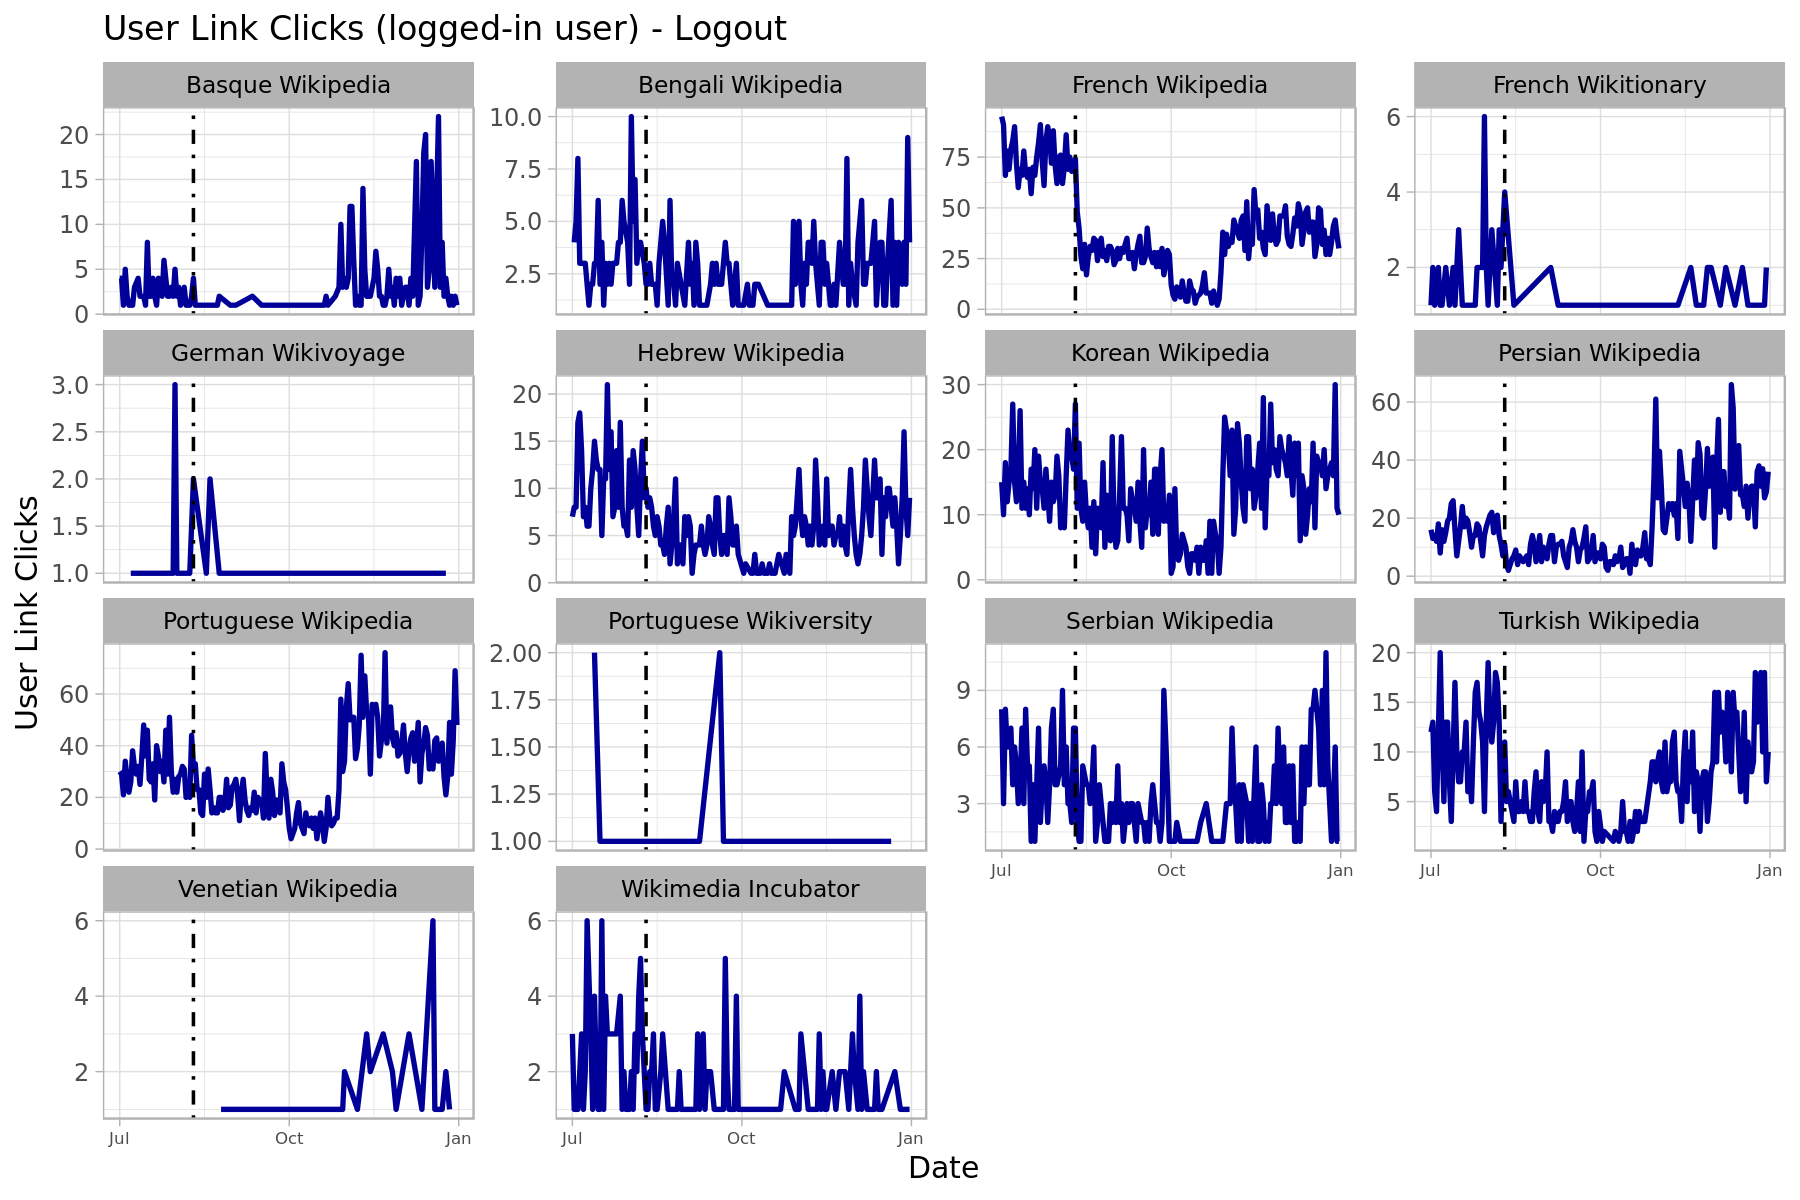

In [20]:
logout_g <- ggplot(data=filter( df_user_link_clicks,  (name=='pt-logout')&(isanon=='false')),
                                mapping=aes(x=event_date)) +
geom_line(aes(y=clicks ), color="#000099" , size = 1.5) +
geom_vline(aes(xintercept = as.numeric(as.Date('2021-08-10'))), linetype="dotdash", color="black", size=1)+
facet_wrap(~wiki_name,nrow=4,scale = 'free_y')+
labs(title = 'User Link Clicks (logged-in user) - Logout ',
     x = 'Date',
     y = 'User Link Clicks') +
theme_light(base_size=18) +
theme(legend.position = "bottom", 
     plot.caption = element_text(hjust = 0, face= "italic"),
     strip.text = element_text(size = 14, colour='black'),
     axis.text.x = element_text( size = 10 ),
     plot.title = element_text(size=20))
logout_g 

## By wiki

In [21]:
df_wiki <- df_user_link_clicks %>%
    filter((isanon=='false') & (name!='ui.dropdown-p-personal')) %>%
    group_by(wiki_name, event_date) %>%
    summarize(user_link_clicks=sum(clicks, na.rm=TRUE), .groups='drop')


In [22]:
df_wiki

wiki_name           event_date user_link_clicks
1    Basque Wikipedia    2021-07-01  6              
2    Basque Wikipedia    2021-07-02 11              
3    Basque Wikipedia    2021-07-03  9              
4    Basque Wikipedia    2021-07-04 17              
5    Basque Wikipedia    2021-07-05  8              
6    Basque Wikipedia    2021-07-06 11              
7    Basque Wikipedia    2021-07-07  9              
8    Basque Wikipedia    2021-07-08 10              
9    Basque Wikipedia    2021-07-09  7              
10   Basque Wikipedia    2021-07-10  8              
11   Basque Wikipedia    2021-07-11  8              
12   Basque Wikipedia    2021-07-12 13              
13   Basque Wikipedia    2021-07-13 10              
14   Basque Wikipedia    2021-07-14 12              
15   Basque Wikipedia    2021-07-15  8              
16   Basque Wikipedia    2021-07-16 14              
17   Basque Wikipedia    2021-07-17  6              
18   Basque Wikipedia    2021-07-18  5              
19   Basque Wikipedia    2021-07-19 12              
20   Basque Wikipedia    2021-07-20 12              
21   Basque Wikipedia    2021-07-21 15              
22   Basque Wikipedia    2021-07-22 14              
23   Basque Wikipedia    2021-07-23  9              
24   Basque Wikipedia    2021-07-24 10              
25   Basque Wikipedia    2021-07-25 13              
26   Basque Wikipedia    2021-07-26 10              
27   Basque Wikipedia    2021-07-27 11              
28   Basque Wikipedia    2021-07-28 16              
29   Basque Wikipedia    2021-07-29 12              
30   Basque Wikipedia    2021-07-30 15              
⋮    ⋮                   ⋮          ⋮               
2173 Wikimedia Incubator 2021-12-01  8              
2174 Wikimedia Incubator 2021-12-02  3              
2175 Wikimedia Incubator 2021-12-03  4              
2176 Wikimedia Incubator 2021-12-04  8              
2177 Wikimedia Incubator 2021-12-05  6              
2178 Wikimedia Incubator 2021-12-06 12              
2179 Wikimedia Incubator 2021-12-07  4              
2180 Wikimedia Incubator 2021-12-08  5              
2181 Wikimedia Incubator 2021-12-09  2              
2182 Wikimedia Incubator 2021-12-10  3              
2183 Wikimedia Incubator 2021-12-11  7              
2184 Wikimedia Incubator 2021-12-12  7              
2185 Wikimedia Incubator 2021-12-13 11              
2186 Wikimedia Incubator 2021-12-14 15              
2187 Wikimedia Incubator 2021-12-15  4              
2188 Wikimedia Incubator 2021-12-16  4              
2189 Wikimedia Incubator 2021-12-17  1              
2190 Wikimedia Incubator 2021-12-18  6              
2191 Wikimedia Incubator 2021-12-19  5              
2192 Wikimedia Incubator 2021-12-20  3              
2193 Wikimedia Incubator 2021-12-21  7              
2194 Wikimedia Incubator 2021-12-22  1              
2195 Wikimedia Incubator 2021-12-23  6              
2196 Wikimedia Incubator 2021-12-25  5              
2197 Wikimedia Incubator 2021-12-26  7              
2198 Wikimedia Incubator 2021-12-27  4              
2199 Wikimedia Incubator 2021-12-28  7              
2200 Wikimedia Incubator 2021-12-29  3              
2201 Wikimedia Incubator 2021-12-30  5              
2202 Wikimedia Incubator 2021-12-31  4

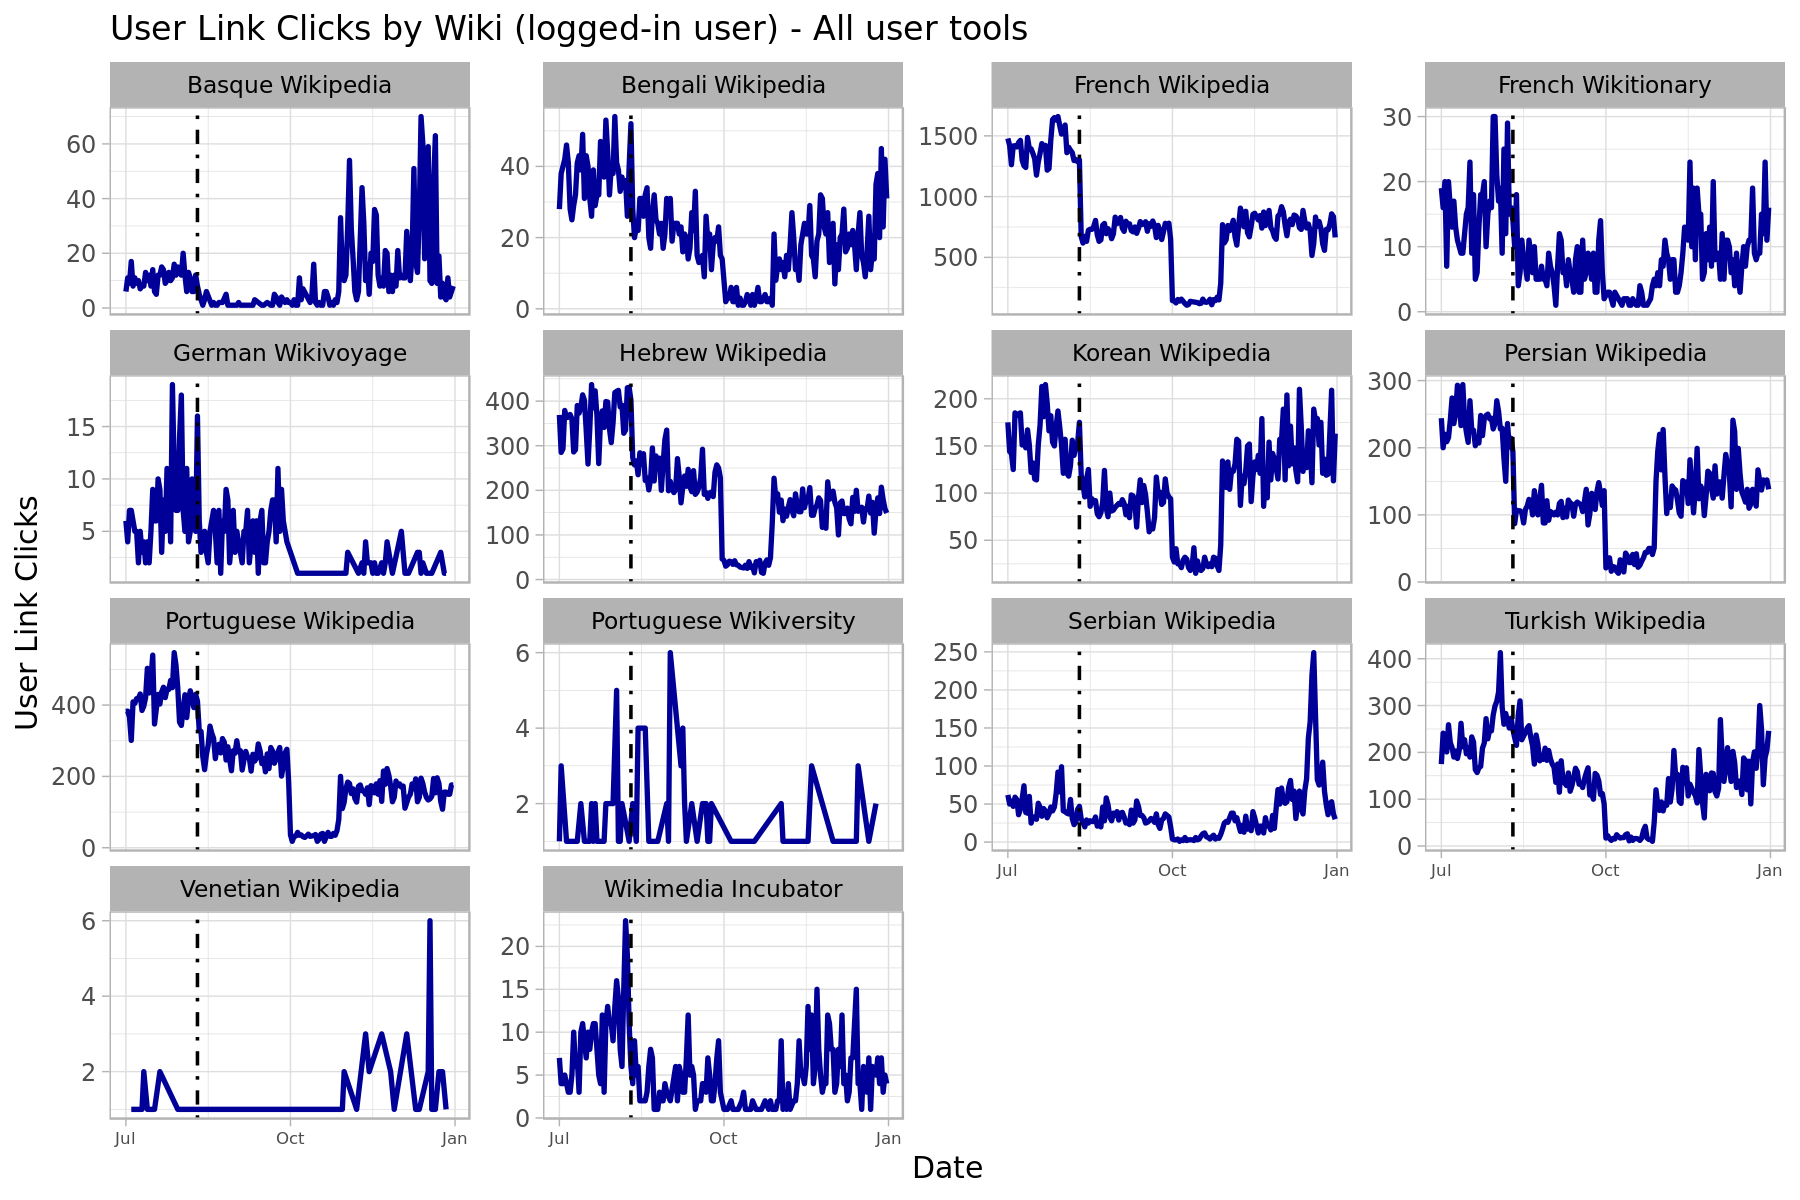

In [23]:
wiki_g <- ggplot(data=df_wiki,
                                mapping=aes(x=event_date)) +
geom_line(aes(y=user_link_clicks ), color="#000099" , size = 1.5) +
geom_vline(aes(xintercept = as.numeric(as.Date('2021-08-10'))), linetype="dotdash", color="black", size=1)+
facet_wrap(~wiki_name,nrow=4,scale = 'free_y')+
labs(title = 'User Link Clicks by Wiki (logged-in user) - All user tools ',
     x = 'Date',
     y = 'User Link Clicks') +
theme_light(base_size=18) +
theme(legend.position = "bottom", 
     plot.caption = element_text(hjust = 0, face= "italic"),
     strip.text = element_text(size = 14, colour='black'),
     axis.text.x = element_text( size = 10 ),
     plot.title = element_text(size=20))
wiki_g 

## By user tool

In [24]:
df_tool <- df_user_link_clicks %>%
    filter((isanon=='false') & (name!='ui.dropdown-p-personal')) %>%
    group_by(name, event_date) %>%
    summarize(user_link_clicks=sum(clicks, na.rm=TRUE), .groups='drop')


In [48]:
filter(df_tool,(event_date <'2021-11-10') & (event_date >'2021-10-15'))

name            event_date user_link_clicks
1   pt-betafeatures 2021-10-16  5              
2   pt-betafeatures 2021-10-17  3              
3   pt-betafeatures 2021-10-18  5              
4   pt-betafeatures 2021-10-19  4              
5   pt-betafeatures 2021-10-20  6              
6   pt-betafeatures 2021-10-21  2              
7   pt-betafeatures 2021-10-22  5              
8   pt-betafeatures 2021-10-23  2              
9   pt-betafeatures 2021-10-24  5              
10  pt-betafeatures 2021-10-25  1              
11  pt-betafeatures 2021-10-26 10              
12  pt-betafeatures 2021-10-27  5              
13  pt-betafeatures 2021-10-28 13              
14  pt-betafeatures 2021-10-29 27              
15  pt-betafeatures 2021-10-30 28              
16  pt-betafeatures 2021-10-31 33              
17  pt-betafeatures 2021-11-01 30              
18  pt-betafeatures 2021-11-02 27              
19  pt-betafeatures 2021-11-03 23              
20  pt-betafeatures 2021-11-04 23              
21  pt-betafeatures 2021-11-05 32              
22  pt-betafeatures 2021-11-06 23              
23  pt-betafeatures 2021-11-07 31              
24  pt-betafeatures 2021-11-08 48              
25  pt-betafeatures 2021-11-09 25              
26  pt-logout       2021-10-16 21              
27  pt-logout       2021-10-17 31              
28  pt-logout       2021-10-18 41              
29  pt-logout       2021-10-19 40              
30  pt-logout       2021-10-20 29              
⋮   ⋮               ⋮          ⋮               
146 pt-sandbox      2021-11-05 163             
147 pt-sandbox      2021-11-06 127             
148 pt-sandbox      2021-11-07 182             
149 pt-sandbox      2021-11-08 231             
150 pt-sandbox      2021-11-09 232             
151 pt-watchlist    2021-10-16 106             
152 pt-watchlist    2021-10-17  94             
153 pt-watchlist    2021-10-18 114             
154 pt-watchlist    2021-10-19  91             
155 pt-watchlist    2021-10-20 101             
156 pt-watchlist    2021-10-21 113             
157 pt-watchlist    2021-10-22  99             
158 pt-watchlist    2021-10-23  83             
159 pt-watchlist    2021-10-24 126             
160 pt-watchlist    2021-10-25 110             
161 pt-watchlist    2021-10-26 134             
162 pt-watchlist    2021-10-27 150             
163 pt-watchlist    2021-10-28 254             
164 pt-watchlist    2021-10-29 596             
165 pt-watchlist    2021-10-30 489             
166 pt-watchlist    2021-10-31 511             
167 pt-watchlist    2021-11-01 525             
168 pt-watchlist    2021-11-02 540             
169 pt-watchlist    2021-11-03 539             
170 pt-watchlist    2021-11-04 564             
171 pt-watchlist    2021-11-05 476             
172 pt-watchlist    2021-11-06 418             
173 pt-watchlist    2021-11-07 477             
174 pt-watchlist    2021-11-08 576             
175 pt-watchlist    2021-11-09 567

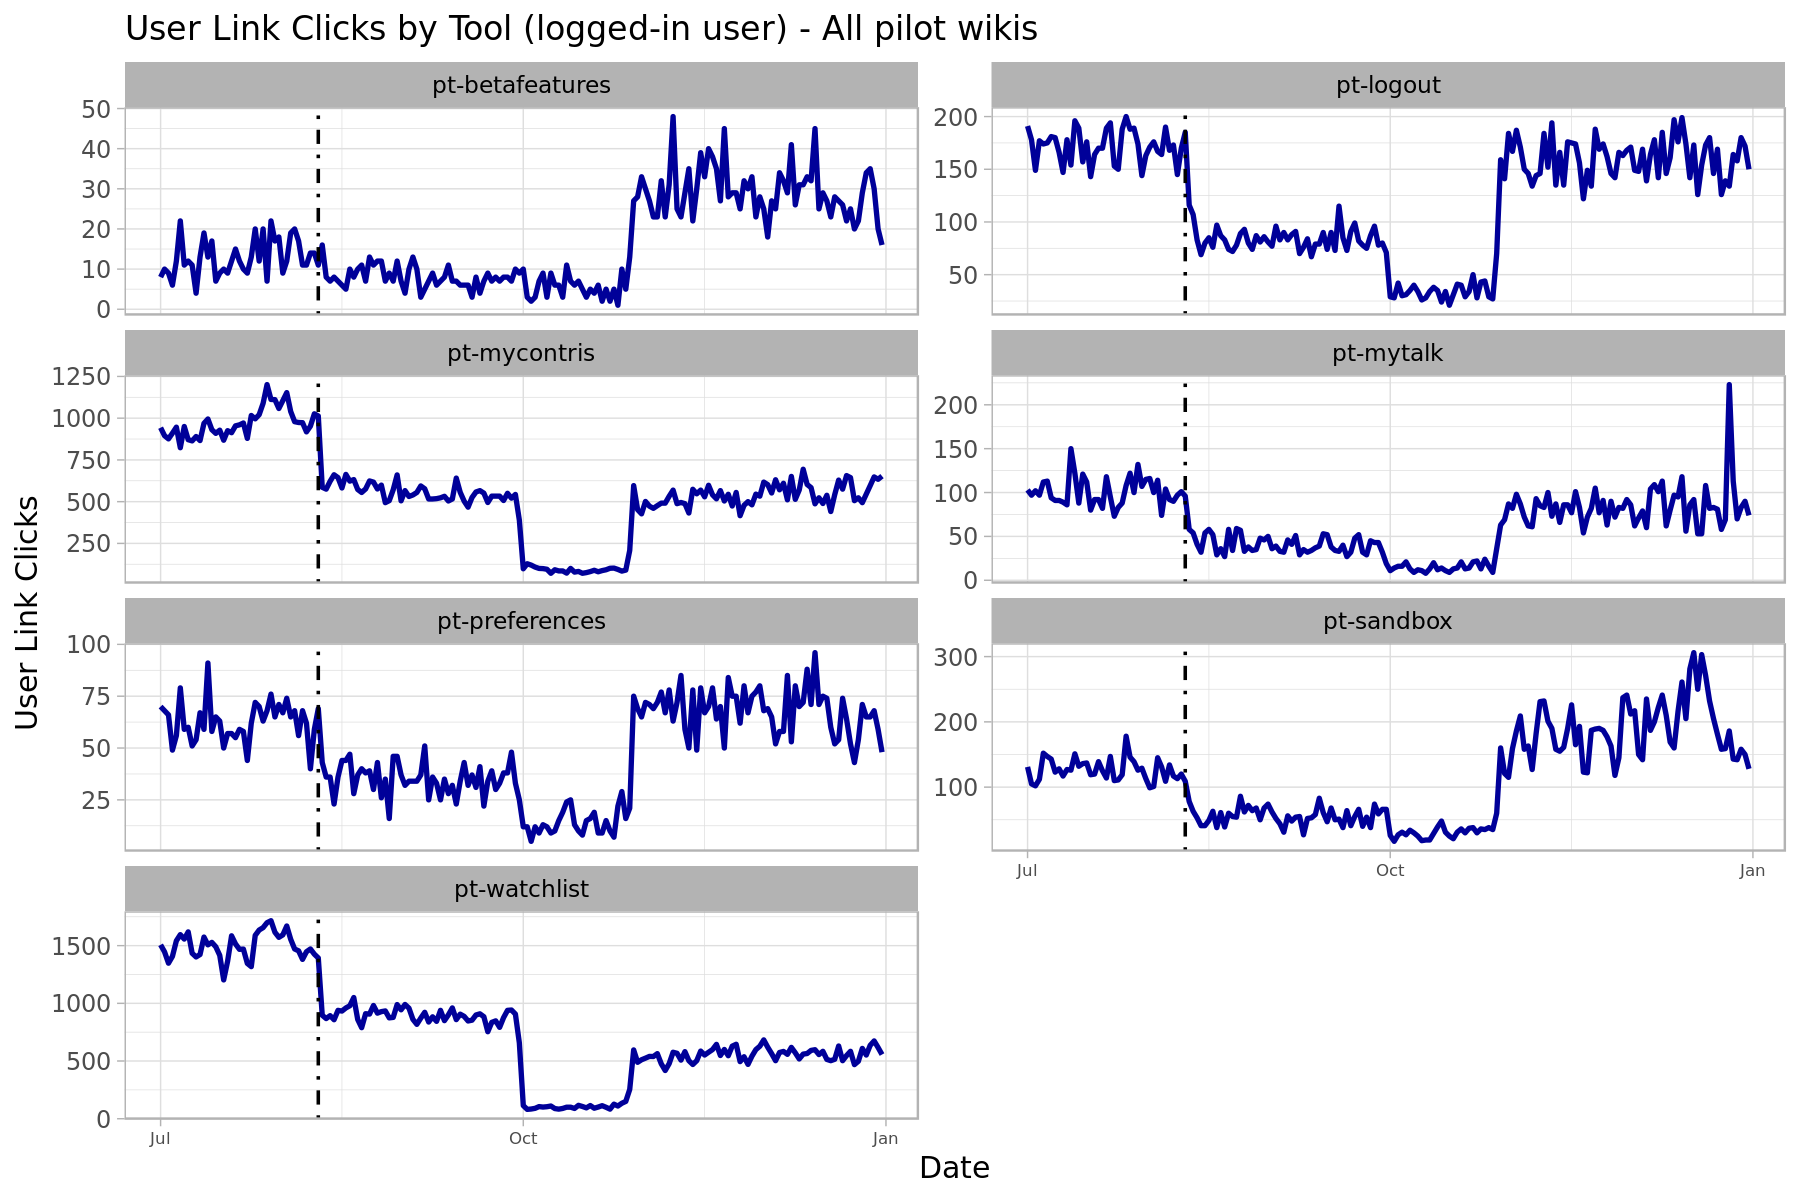

In [26]:
tool_g <- ggplot(data=df_tool,
                                mapping=aes(x=event_date)) +
geom_line(aes(y=user_link_clicks ), color="#000099" , size = 1.5) +
geom_vline(aes(xintercept = as.numeric(as.Date('2021-08-10'))), linetype="dotdash", color="black", size=1)+
facet_wrap(~name,nrow=4,scale = 'free_y')+
labs(title = 'User Link Clicks by Tool (logged-in user) - All pilot wikis ',
     x = 'Date',
     y = 'User Link Clicks') +
theme_light(base_size=18) +
theme(legend.position = "bottom", 
     plot.caption = element_text(hjust = 0, face= "italic"),
     strip.text = element_text(size = 14, colour='black'),
     axis.text.x = element_text( size = 10 ),
     plot.title = element_text(size=20))
tool_g 

__Summary__:

- The user link clicks dropped since the user menu was deployed on 2021-08-10. It is expected. 
- The jump in Oct 1, 2021 is due to some instrumentation change. 
- The jump in Oct 28, 2021 is due to the change of sampling rate. https://phabricator.wikimedia.org/T292588


# Comparison of Pre and Post Deployment

In [113]:
# add column classifying pre and post deployment dates
df_user_link_clicks_prepost <- df_user_link_clicks %>%
    mutate(deployment = case_when(
        event_date >= '2021-07-13' & event_date <= '2021-08-09'  ~ 'pre',
        event_date >= '2021-08-10' & event_date <= '2021-09-06'  ~ 'post',      
        TRUE ~ 'NA'
    ))   %>%
    filter((deployment!='NA')&(isanon=='false')& (name!='ui.dropdown-p-personal')) %>%
    group_by(wiki_name, deployment, name,isanon) %>%
    summarize(sum_clicks = sum(clicks),  .groups = 'drop')

In [114]:
head(df_user_link_clicks_prepost)

wiki_name        deployment name           isanon sum_clicks
1 Basque Wikipedia post       pt-logout      false  13        
2 Basque Wikipedia post       pt-mycontris   false  13        
3 Basque Wikipedia post       pt-preferences false   4        
4 Basque Wikipedia post       pt-sandbox     false   6        
5 Basque Wikipedia post       pt-watchlist   false  14        
6 Basque Wikipedia pre        pt-logout      false  66

In [115]:
df_user_link_clicks_prepost$deployment <- factor(df_user_link_clicks_prepost$deployment,levels = c("pre", "post"))

## Watchlist

In [116]:
watchlist_clicks_barchart <- df_user_link_clicks_prepost %>%
        filter(name=='pt-watchlist') %>%
        ggplot(aes(x = deployment, y= sum_clicks, fill=deployment)) +
        geom_bar(stat="identity", position = 'dodge') +
        geom_text(aes(label = paste(sum_clicks)), color = "white", position = position_dodge(0.9), vjust = 1.5, size = 3) +
        facet_wrap(~wiki_name, scale = 'free_y') +
        labs (
              y = "Number of user link clicks",
             title = "Number of user linkc clicks before and after deployment -- Watchlist",
             caption = "User type: logged-in User") +
     scale_fill_manual(values= c( "#000099", "#666666"), name = "Feature")  +
         theme(
            panel.grid.major = element_blank(), 
            panel.grid.minor = element_blank(),
            panel.background = element_blank(),
            plot.caption = element_text(hjust = 0, face= "italic"),
            strip.background =element_rect(fill="white"),
            plot.title = element_text(hjust = 0.5),
            text = element_text(size=16),
           # axis.title.x=element_blank(),
           # axis.text.x=element_blank(),
            axis.line = element_line(colour = "black"),
            legend.position = "bottom")

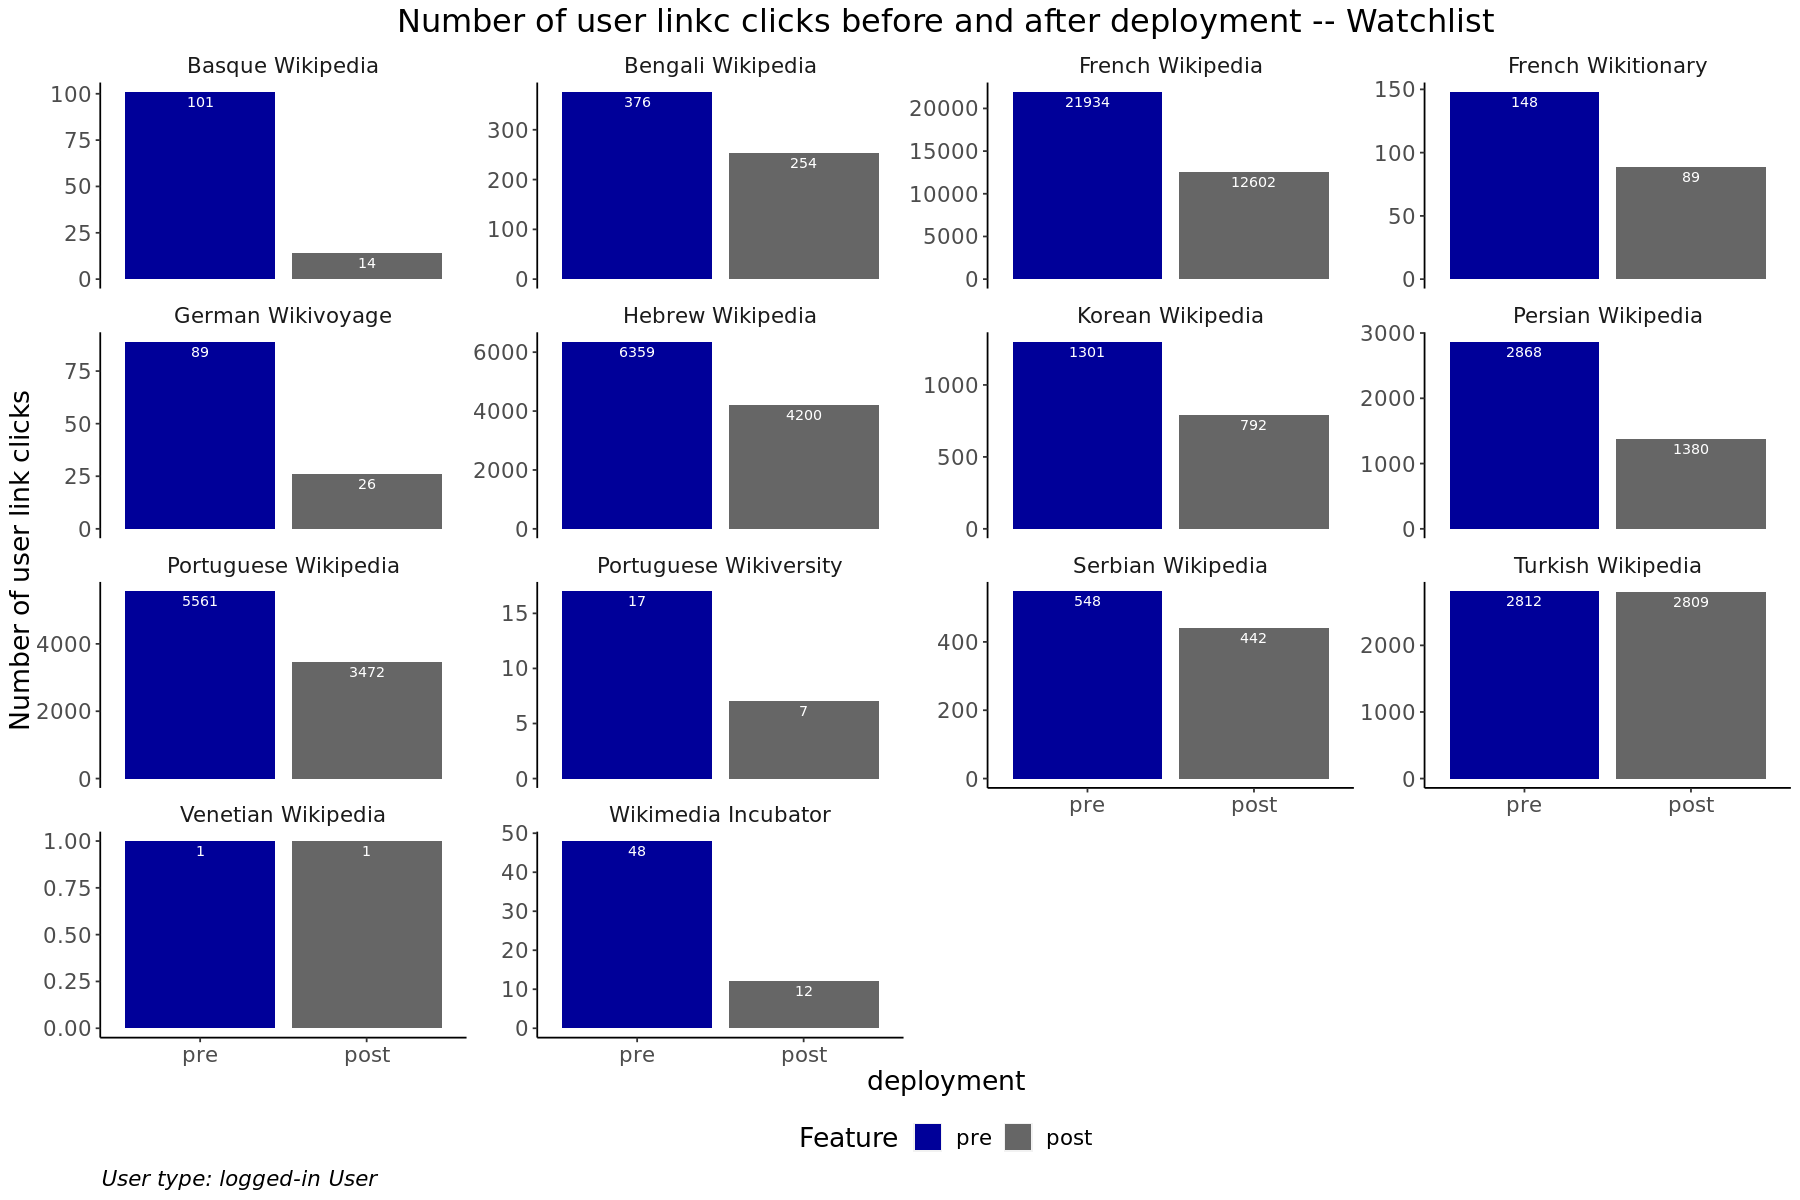

In [117]:
watchlist_clicks_barchart

__Determin the percentage of changes__

In [118]:
# determine percent change

df_watchlist_clicks_prepost_w <- df_user_link_clicks_prepost %>%
  filter(name=='pt-watchlist') %>%
  select(wiki_name, deployment,sum_clicks) %>%
  pivot_wider(names_from = deployment, values_from = sum_clicks) %>%
  mutate(pct_change=round((post-pre)/pre * 100 , 2))

In [119]:
df_watchlist_clicks_prepost_w

wiki_name              post  pre   pct_change
1  Basque Wikipedia          14   101 -86.14    
2  Bengali Wikipedia        254   376 -32.45    
3  French Wikipedia       12602 21934 -42.55    
4  French Wikitionary        89   148 -39.86    
5  German Wikivoyage         26    89 -70.79    
6  Hebrew Wikipedia        4200  6359 -33.95    
7  Korean Wikipedia         792  1301 -39.12    
8  Persian Wikipedia       1380  2868 -51.88    
9  Portuguese Wikipedia    3472  5561 -37.57    
10 Portuguese Wikiversity     7    17 -58.82    
11 Serbian Wikipedia        442   548 -19.34    
12 Turkish Wikipedia       2809  2812  -0.11    
13 Venetian Wikipedia         1     1   0.00    
14 Wikimedia Incubator       12    48 -75.00

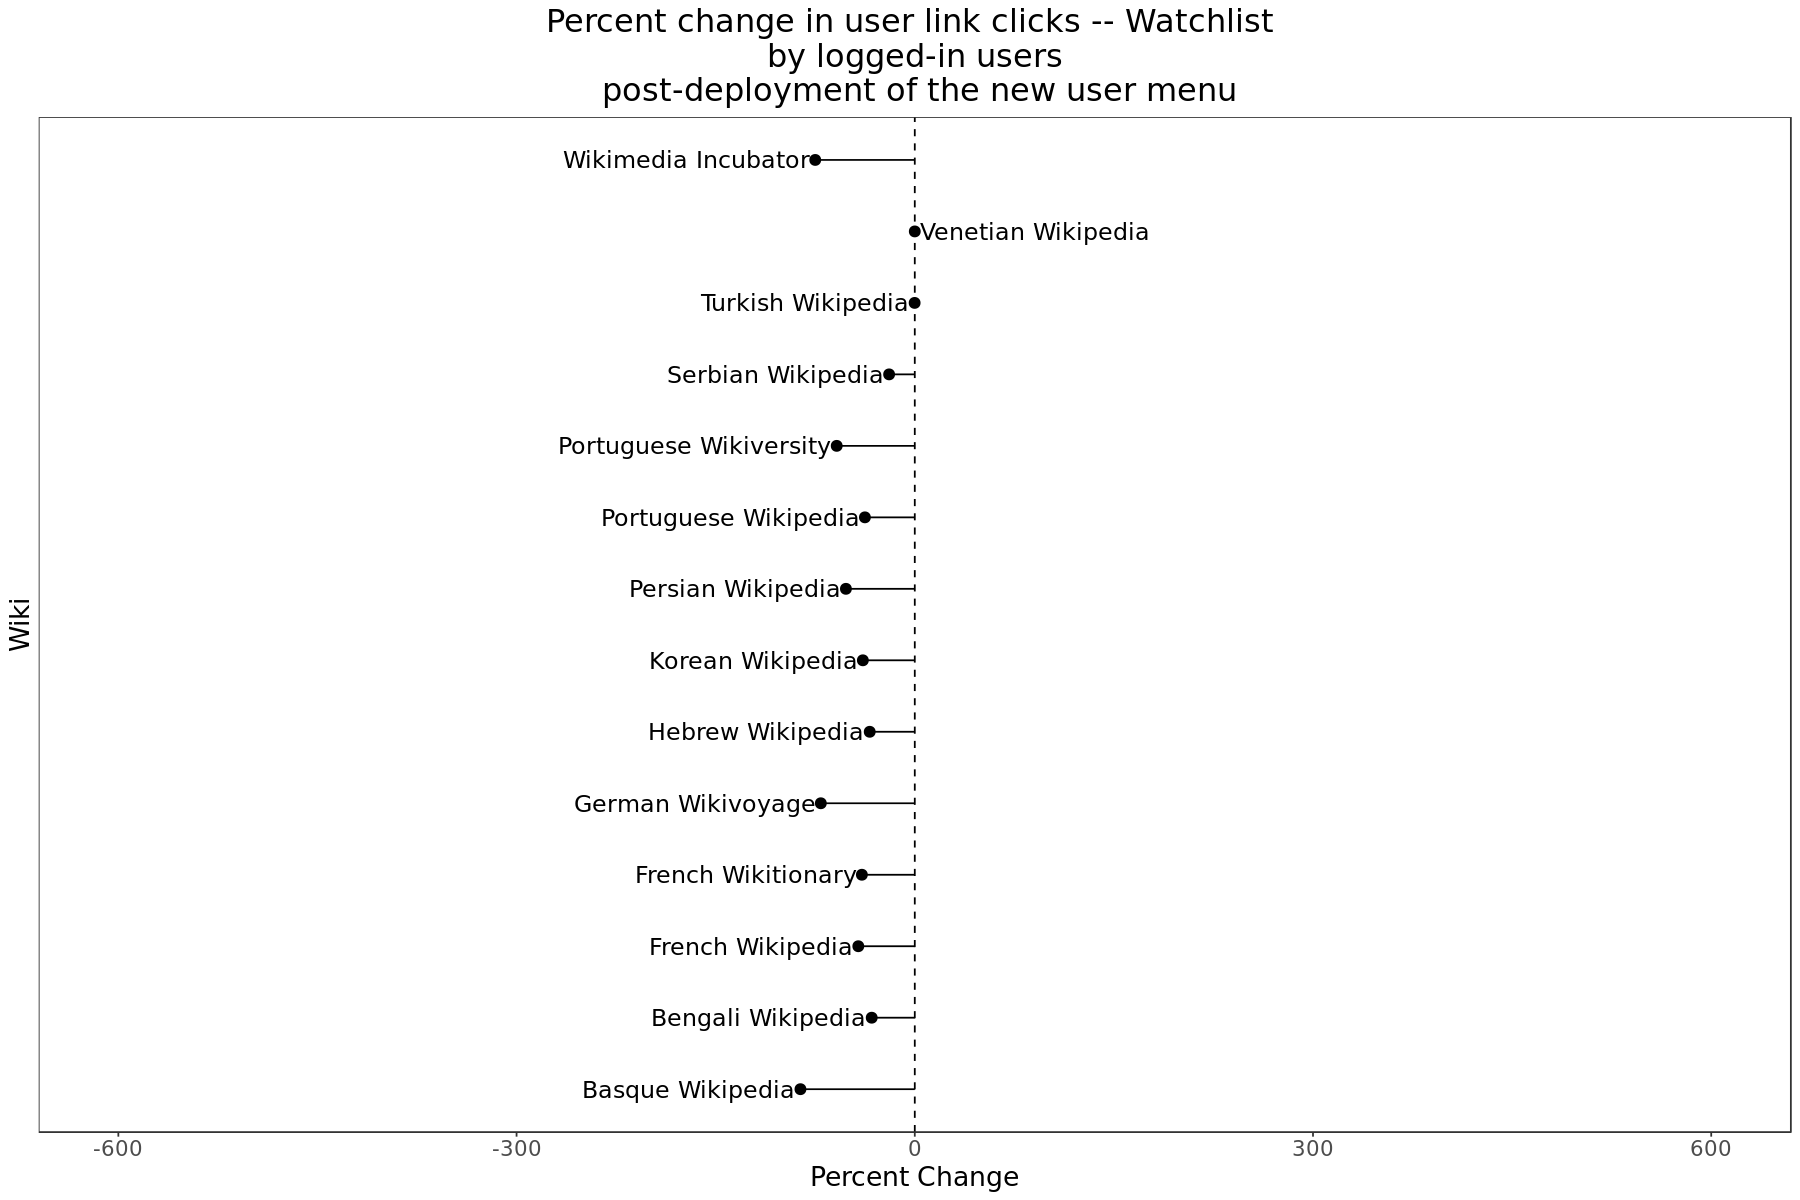

In [120]:
# chart percent change in logged-out sessions pre and post deployment for each of the early adopter wikis

pct_watchlist_g <- df_watchlist_clicks_prepost_w %>%
        filter( is.numeric(pct_change) & pre>0) %>%
        ggplot() +
        geom_hline(yintercept = 0, linetype = "dashed") +
        geom_pointrange(
            aes(x = wiki_name, ymin = 0, ymax = pct_change, y = pct_change)
        ) +
        geom_text(
            aes(
                y = pct_change + ifelse(pct_change < 0, -4, 4),
                x = wiki_name, label = wiki_name,
                hjust = ifelse(pct_change < 0, "right", "left")
            ),
            size = 5
        ) +
        scale_x_discrete(breaks = NULL) +
        coord_flip(ylim = c(-600, 600)) +
         labs (x = "Wiki",
                y = "Percent Change",
             title = "Percent change in user link clicks -- Watchlist \n by logged-in users \n post-deployment of the new user menu") +
        theme_bw() +
        theme(
            panel.grid.major = element_blank(), 
            panel.grid.minor = element_blank(),
            panel.background = element_blank(),
            plot.title = element_text(hjust = 0.5),
            text = element_text(size=16)) 
      
pct_watchlist_g 



__Average percent change__


Average of the percent changes observed on each early adopter wiki

In [121]:
mean((filter(df_watchlist_clicks_prepost_w, is.numeric(pct_change) & pre>0))$pct_change, na.rm=TRUE)

[1] -41.97

## Talk


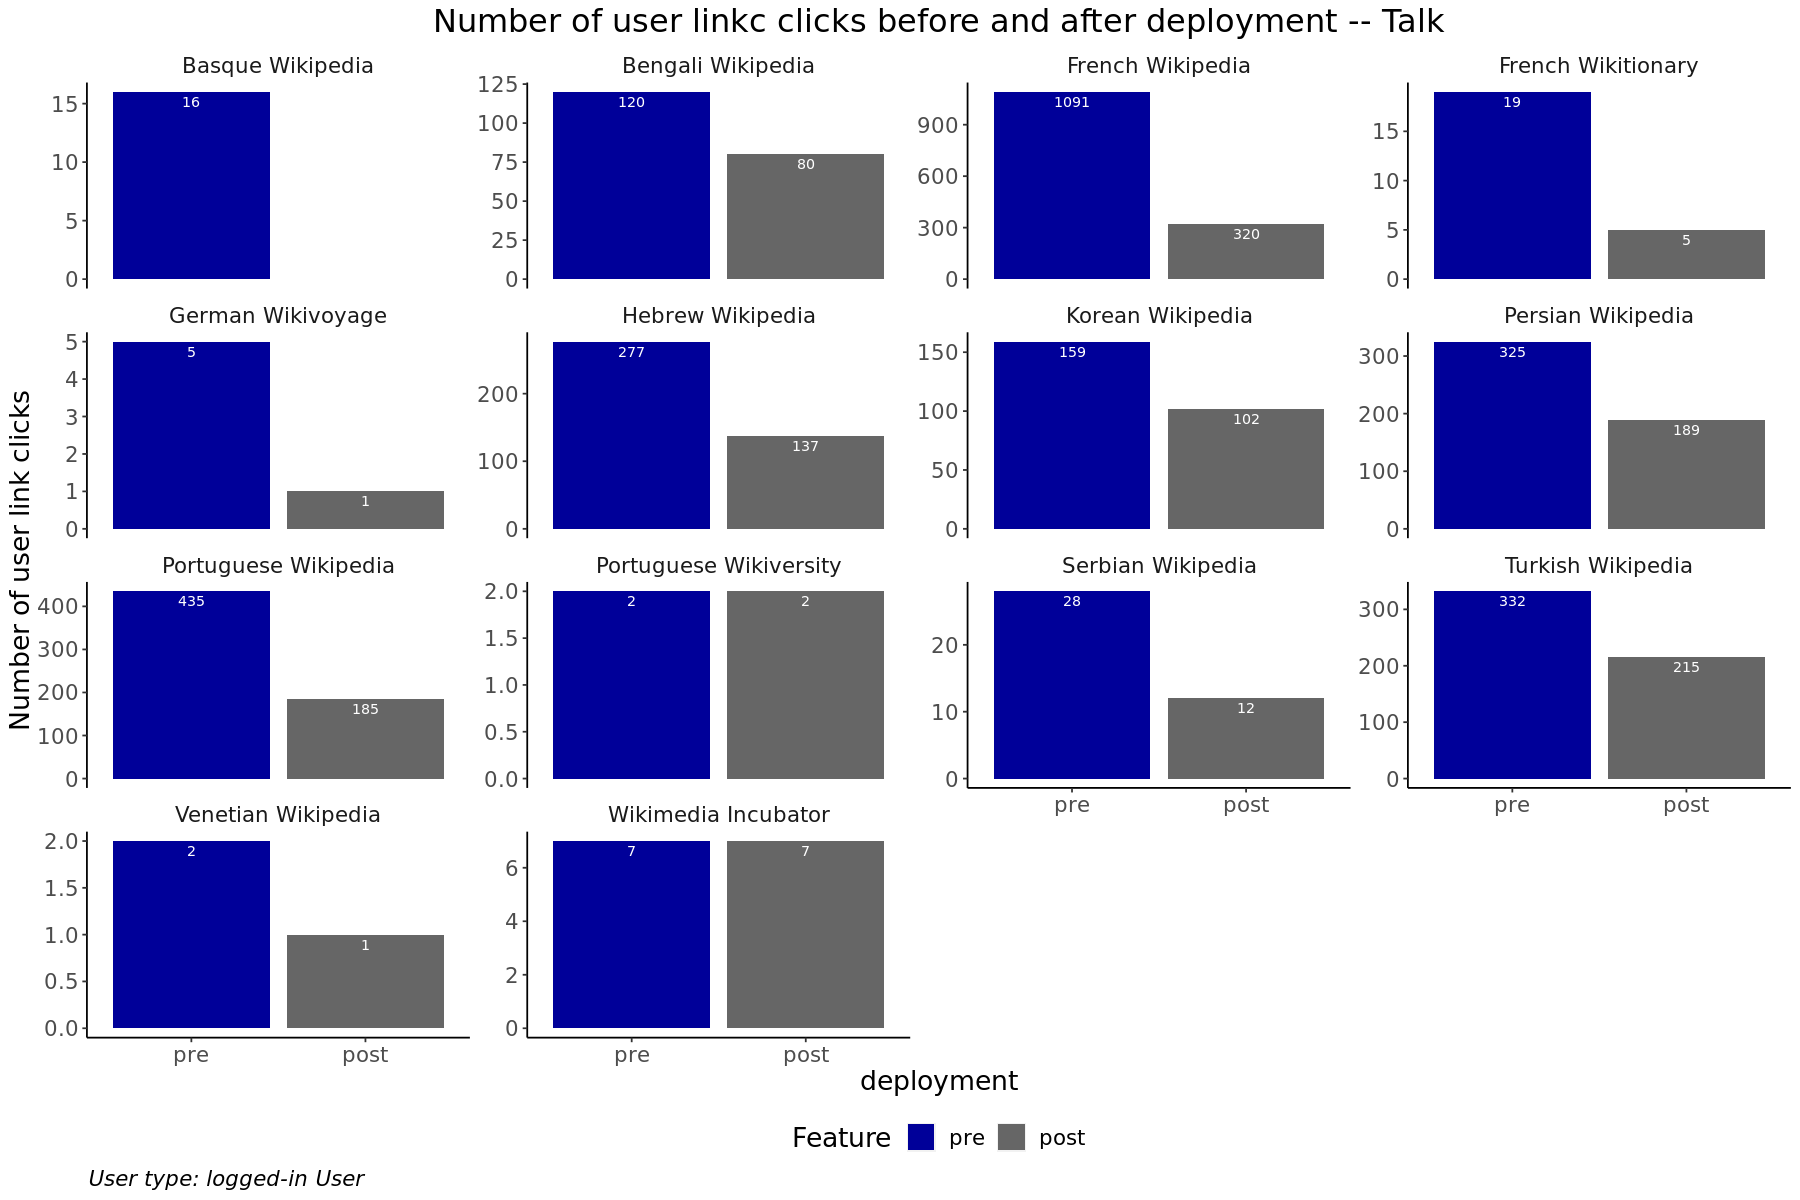

In [122]:
talk_clicks_barchart <- df_user_link_clicks_prepost %>%
        filter(name=='pt-mytalk') %>%
        ggplot(aes(x = deployment, y= sum_clicks, fill=deployment)) +
        geom_bar(stat="identity", position = 'dodge') +
        geom_text(aes(label = paste(sum_clicks)), color = "white", position = position_dodge(0.9), vjust = 1.5, size = 3) +
        facet_wrap(~wiki_name, scale = 'free_y') +
        labs (
              y = "Number of user link clicks",
             title = "Number of user linkc clicks before and after deployment -- Talk",
             caption = "User type: logged-in User") +
     scale_fill_manual(values= c( "#000099", "#666666"), name = "Feature")  +
         theme(
            panel.grid.major = element_blank(), 
            panel.grid.minor = element_blank(),
            panel.background = element_blank(),
            plot.caption = element_text(hjust = 0, face= "italic"),
            strip.background =element_rect(fill="white"),
            plot.title = element_text(hjust = 0.5),
            text = element_text(size=16),
            axis.line = element_line(colour = "black"),
            legend.position = "bottom")

talk_clicks_barchart

__Determin the percentage of changes__

In [123]:
# determine percent change

df_talk_clicks_prepost_w <- df_user_link_clicks_prepost %>%
  filter(name=='pt-mytalk') %>%
  select(wiki_name, deployment,sum_clicks) %>%
  pivot_wider(names_from = deployment, values_from = sum_clicks) %>%
  mutate(pct_change=round((post-pre)/pre * 100 , 2))

df_talk_clicks_prepost_w

wiki_name              pre  post pct_change
1  Basque Wikipedia         16  NA      NA    
2  Bengali Wikipedia       120  80  -33.33    
3  French Wikipedia       1091 320  -70.67    
4  French Wikitionary       19   5  -73.68    
5  German Wikivoyage         5   1  -80.00    
6  Hebrew Wikipedia        277 137  -50.54    
7  Korean Wikipedia        159 102  -35.85    
8  Persian Wikipedia       325 189  -41.85    
9  Portuguese Wikipedia    435 185  -57.47    
10 Portuguese Wikiversity    2   2    0.00    
11 Serbian Wikipedia        28  12  -57.14    
12 Turkish Wikipedia       332 215  -35.24    
13 Venetian Wikipedia        2   1  -50.00    
14 Wikimedia Incubator       7   7    0.00

Warning message:
“Removed 1 rows containing missing values (geom_pointrange).”
Warning message:
“Removed 1 rows containing missing values (geom_text).”


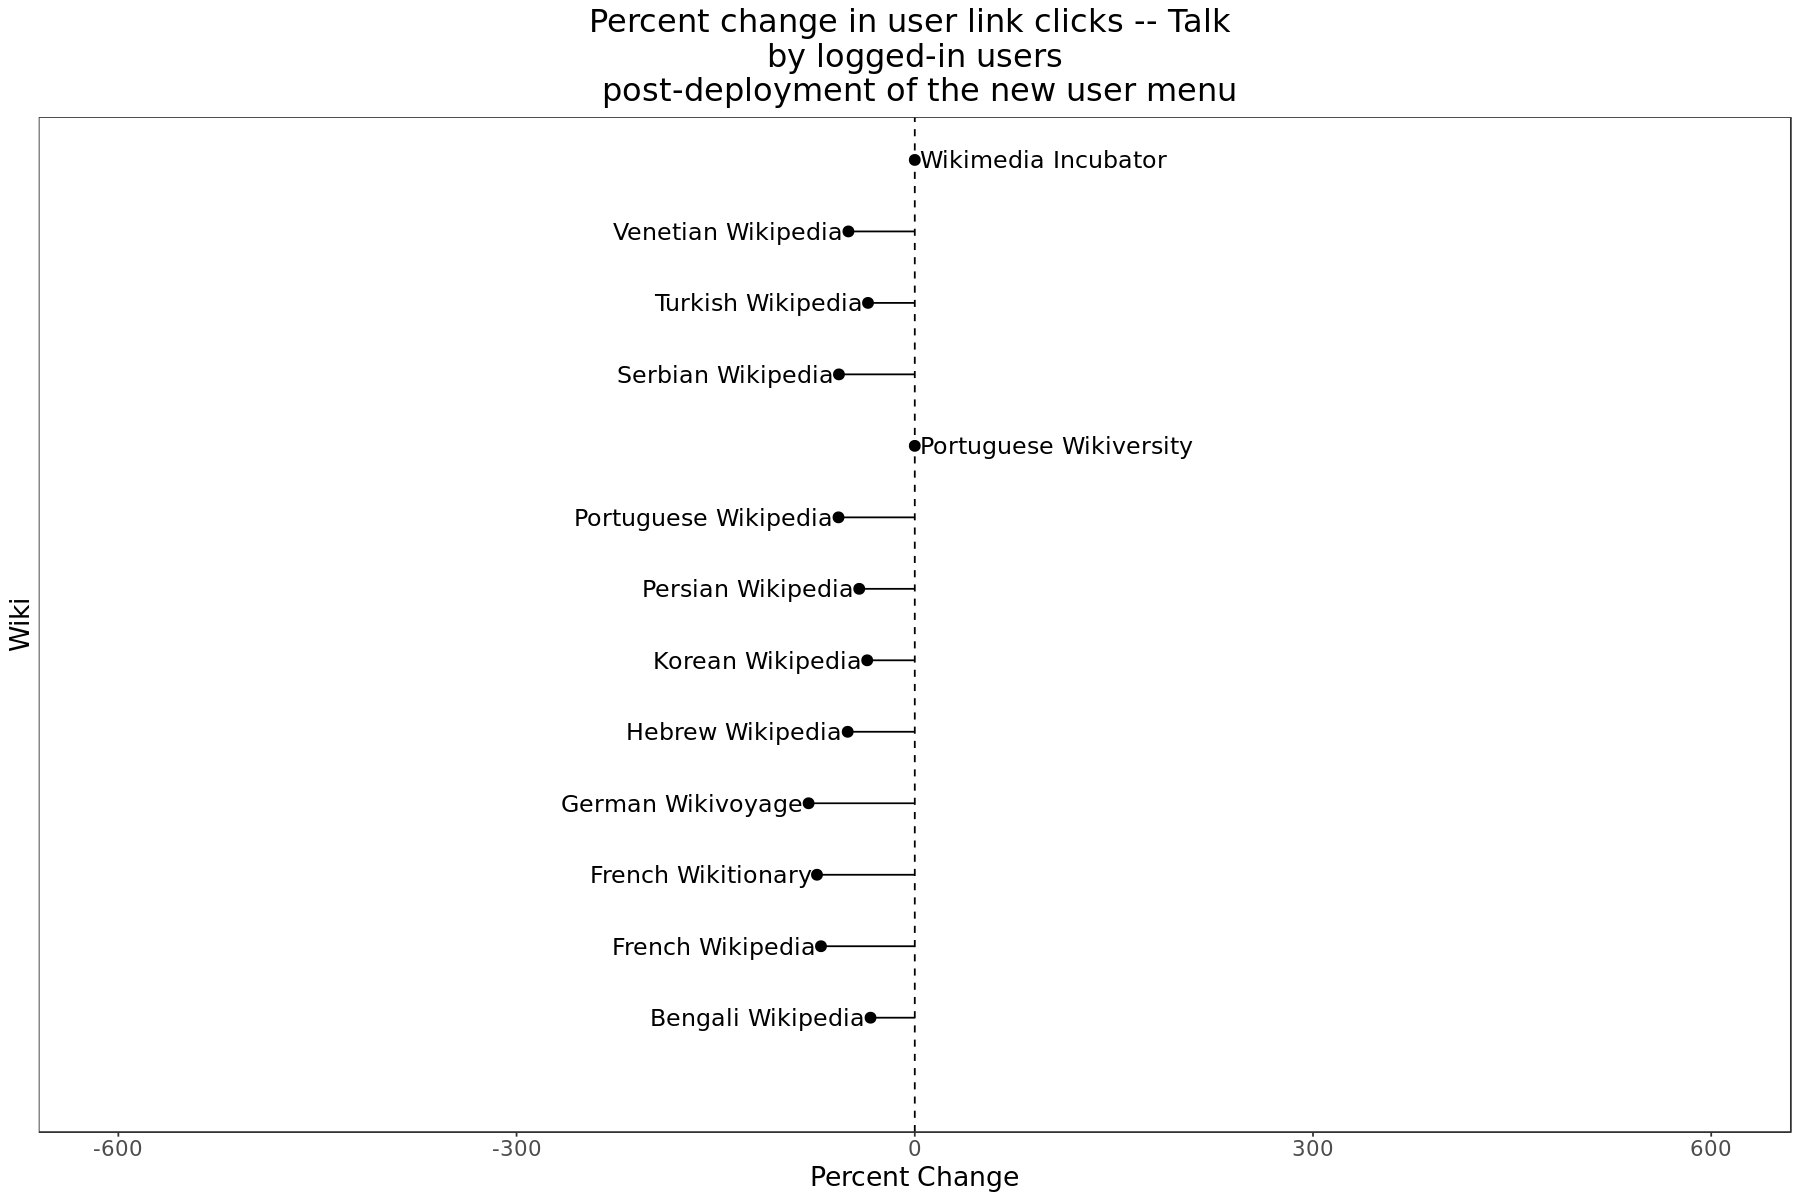

In [124]:
# chart percent change in logged-out sessions pre and post deployment for each of the early adopter wikis

pct_talk_g <- df_talk_clicks_prepost_w %>%
        filter( is.numeric(pct_change) & pre>0) %>%
        ggplot() +
        geom_hline(yintercept = 0, linetype = "dashed") +
        geom_pointrange(
            aes(x = wiki_name, ymin = 0, ymax = pct_change, y = pct_change)
        ) +
        geom_text(
            aes(
                y = pct_change + ifelse(pct_change < 0, -4, 4),
                x = wiki_name, label = wiki_name,
                hjust = ifelse(pct_change < 0, "right", "left")
            ),
            size = 5
        ) +
        scale_x_discrete(breaks = NULL) +
        coord_flip(ylim = c(-600, 600)) +
         labs (x = "Wiki",
                y = "Percent Change",
             title = "Percent change in user link clicks -- Talk \n by logged-in users \n post-deployment of the new user menu") +
        theme_bw() +
        theme(
            panel.grid.major = element_blank(), 
            panel.grid.minor = element_blank(),
            panel.background = element_blank(),
            plot.title = element_text(hjust = 0.5),
            text = element_text(size=16)) 
      
pct_talk_g 


__Average percent change__

Average of the percent changes observed on each early adopter wiki

In [125]:
mean((filter(df_talk_clicks_prepost_w, is.numeric(pct_change) & pre>0))$pct_change, na.rm=TRUE)

[1] -45.05923

## Sandbox


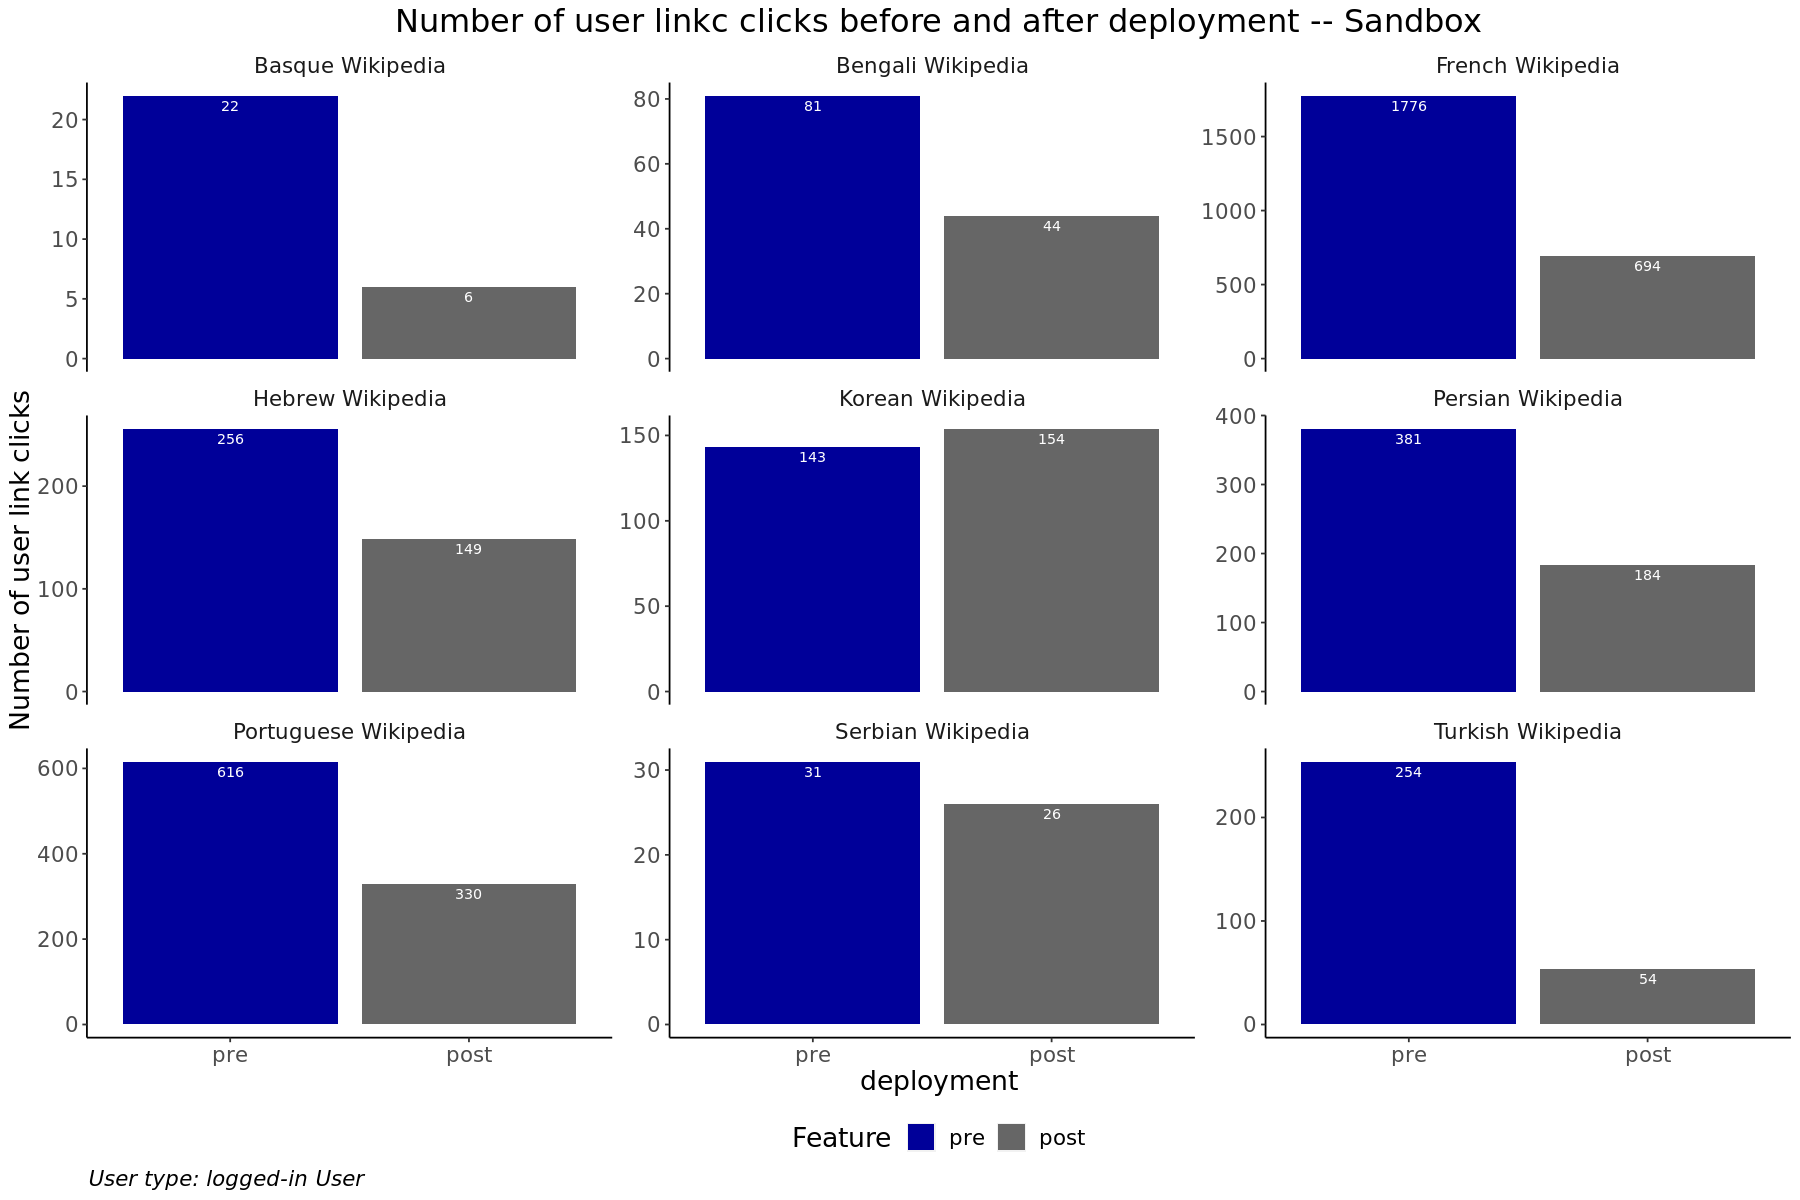

In [126]:
sandbox_clicks_barchart <- df_user_link_clicks_prepost %>%
        filter(name=='pt-sandbox') %>%
        ggplot(aes(x = deployment, y= sum_clicks, fill=deployment)) +
        geom_bar(stat="identity", position = 'dodge') +
        geom_text(aes(label = paste(sum_clicks)), color = "white", position = position_dodge(0.9), vjust = 1.5, size = 3) +
        facet_wrap(~wiki_name, scale = 'free_y') +
        labs (
              y = "Number of user link clicks",
             title = "Number of user linkc clicks before and after deployment -- Sandbox",
             caption = "User type: logged-in User") +
     scale_fill_manual(values= c( "#000099", "#666666"), name = "Feature")  +
         theme(
            panel.grid.major = element_blank(), 
            panel.grid.minor = element_blank(),
            panel.background = element_blank(),
            plot.caption = element_text(hjust = 0, face= "italic"),
            strip.background =element_rect(fill="white"),
            plot.title = element_text(hjust = 0.5),
            text = element_text(size=16),
            axis.line = element_line(colour = "black"),
            legend.position = "bottom")

sandbox_clicks_barchart



__Determin the percentage of changes__


In [127]:

# determine percent change

df_sandbox_clicks_prepost_w <- df_user_link_clicks_prepost %>%
  filter(name=='pt-sandbox') %>%
  select(wiki_name, deployment,sum_clicks) %>%
  pivot_wider(names_from = deployment, values_from = sum_clicks) %>%
  mutate(pct_change=round((post-pre)/pre * 100 , 2))

df_sandbox_clicks_prepost_w


wiki_name            post pre  pct_change
1 Basque Wikipedia       6    22 -72.73    
2 Bengali Wikipedia     44    81 -45.68    
3 French Wikipedia     694  1776 -60.92    
4 Hebrew Wikipedia     149   256 -41.80    
5 Korean Wikipedia     154   143   7.69    
6 Persian Wikipedia    184   381 -51.71    
7 Portuguese Wikipedia 330   616 -46.43    
8 Serbian Wikipedia     26    31 -16.13    
9 Turkish Wikipedia     54   254 -78.74

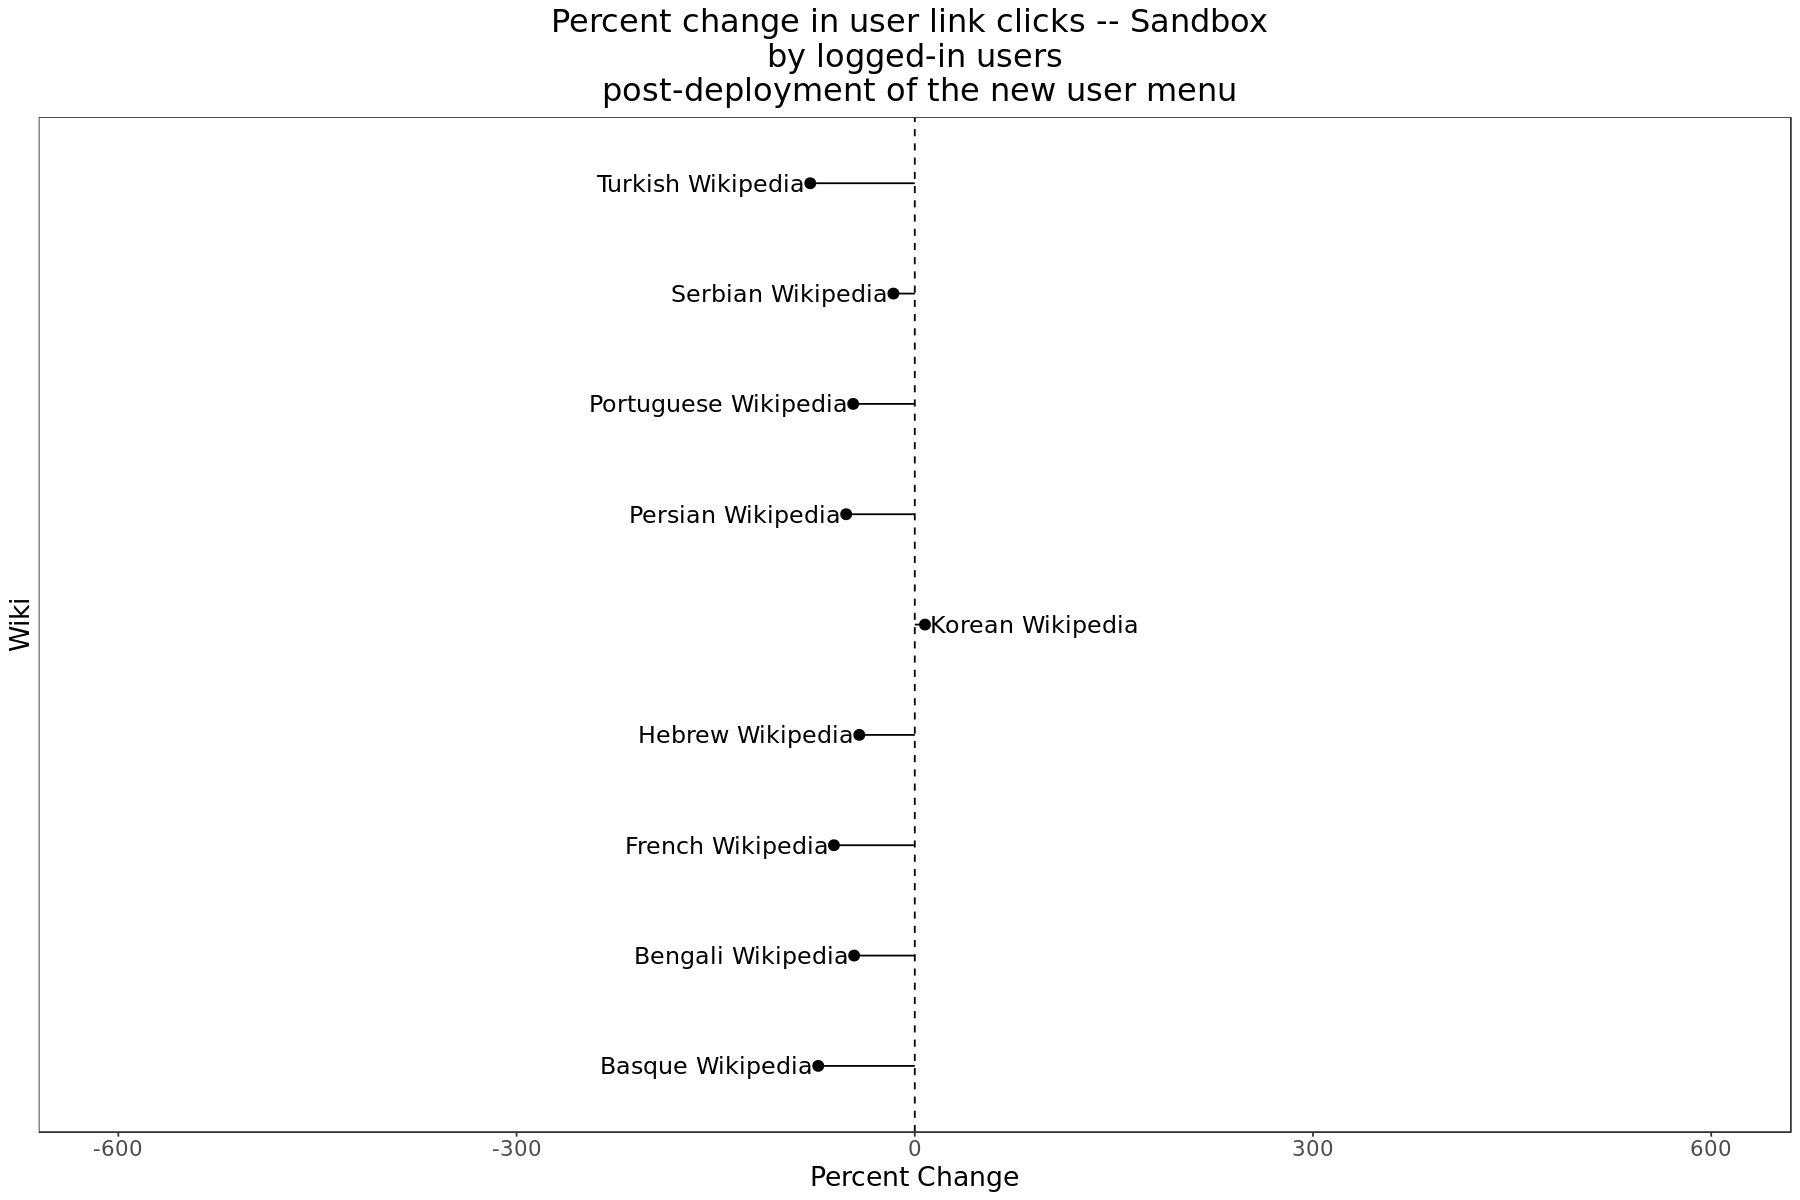

In [128]:

# chart percent change in logged-out sessions pre and post deployment for each of the early adopter wikis

pct_sandbox_g <- df_sandbox_clicks_prepost_w %>%
        filter( is.numeric(pct_change) & pre>0) %>%
        ggplot() +
        geom_hline(yintercept = 0, linetype = "dashed") +
        geom_pointrange(
            aes(x = wiki_name, ymin = 0, ymax = pct_change, y = pct_change)
        ) +
        geom_text(
            aes(
                y = pct_change + ifelse(pct_change < 0, -4, 4),
                x = wiki_name, label = wiki_name,
                hjust = ifelse(pct_change < 0, "right", "left")
            ),
            size = 5
        ) +
        scale_x_discrete(breaks = NULL) +
        coord_flip(ylim = c(-600, 600)) +
         labs (x = "Wiki",
                y = "Percent Change",
             title = "Percent change in user link clicks -- Sandbox \n by logged-in users \n post-deployment of the new user menu") +
        theme_bw() +
        theme(
            panel.grid.major = element_blank(), 
            panel.grid.minor = element_blank(),
            panel.background = element_blank(),
            plot.title = element_text(hjust = 0.5),
            text = element_text(size=16)) 
      
pct_sandbox_g 




__Average percent change__

Average of the percent changes observed on each early adopter wiki

In [129]:


mean((filter(df_sandbox_clicks_prepost_w, is.numeric(pct_change) & pre>0))$pct_change, na.rm=TRUE)

[1] -45.16111

## Preferences


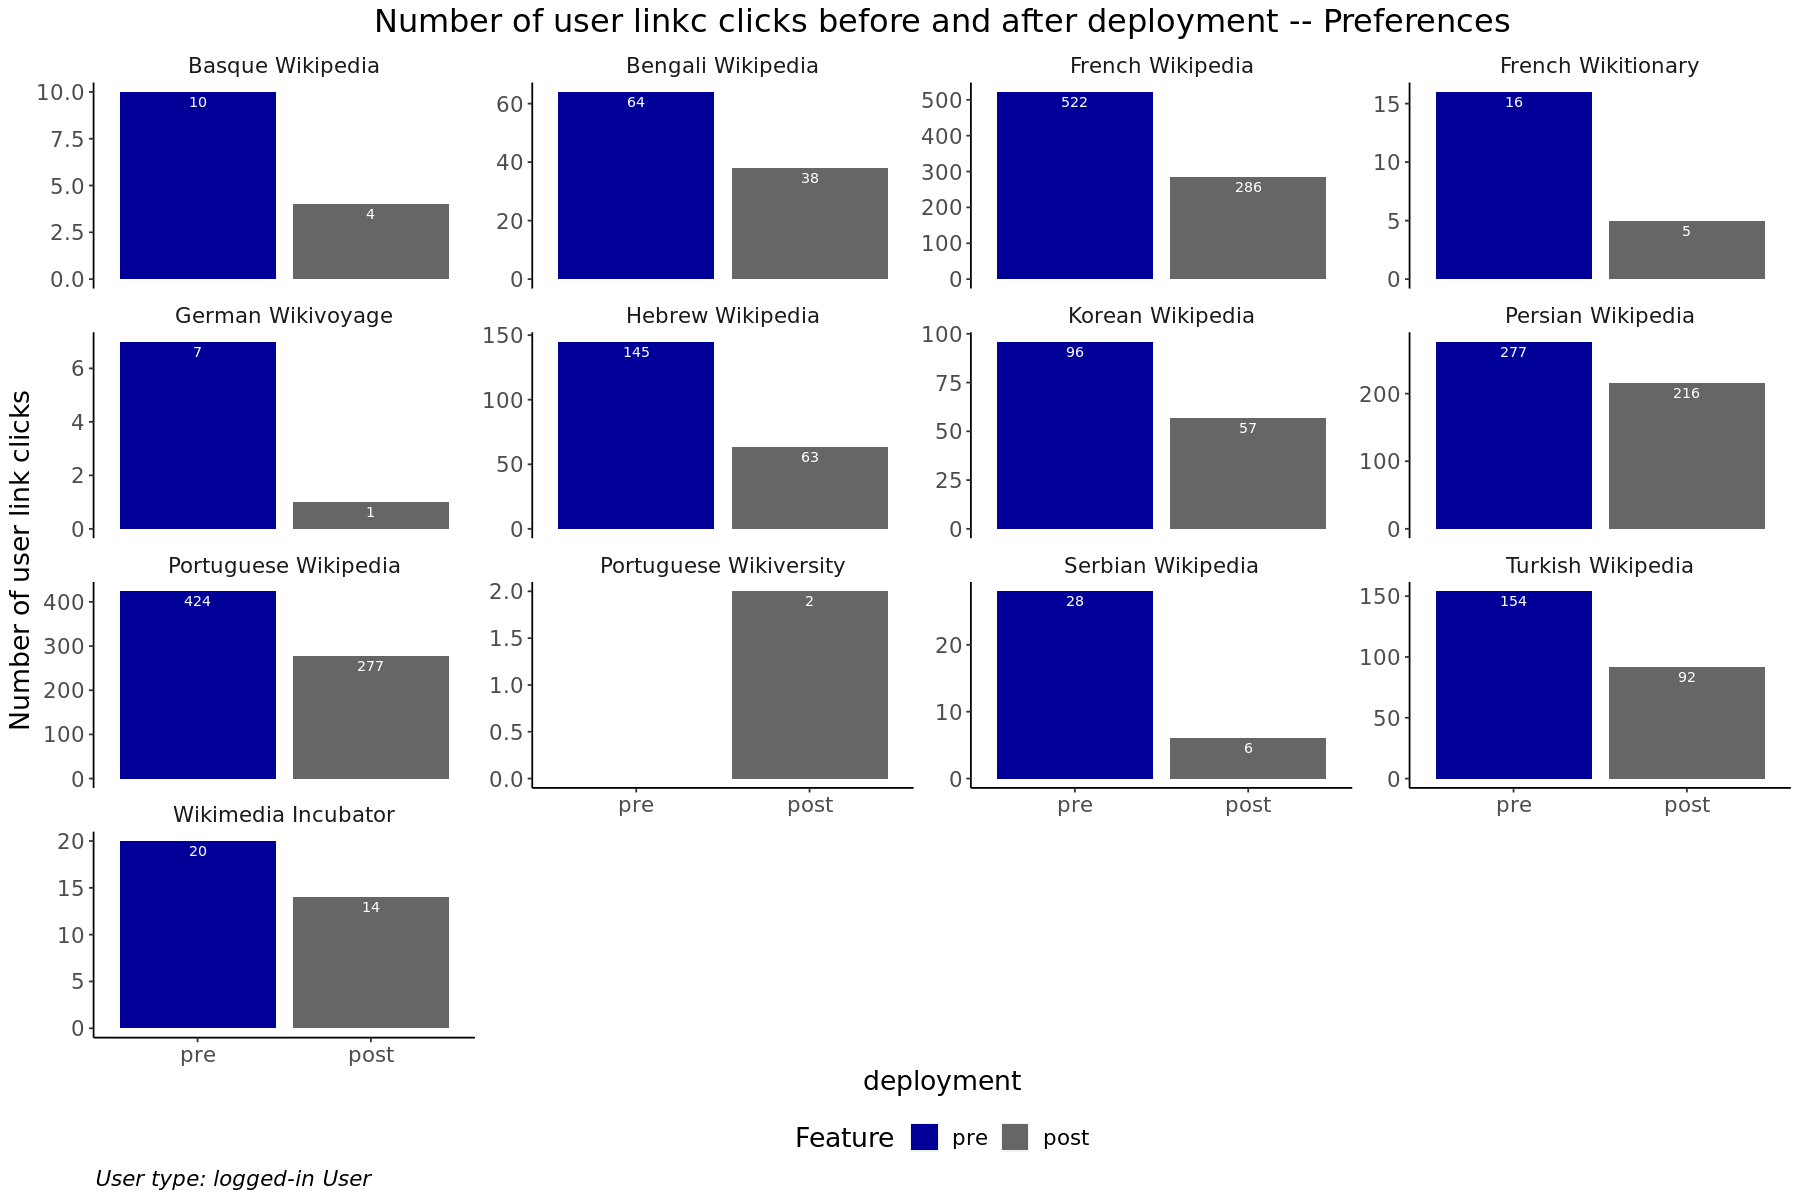

In [130]:
pref_clicks_barchart <- df_user_link_clicks_prepost %>%
        filter(name=='pt-preferences') %>%
        ggplot(aes(x = deployment, y= sum_clicks, fill=deployment)) +
        geom_bar(stat="identity", position = 'dodge') +
        geom_text(aes(label = paste(sum_clicks)), color = "white", position = position_dodge(0.9), vjust = 1.5, size = 3) +
        facet_wrap(~wiki_name, scale = 'free_y') +
        labs (
              y = "Number of user link clicks",
             title = "Number of user linkc clicks before and after deployment -- Preferences",
             caption = "User type: logged-in User") +
     scale_fill_manual(values= c( "#000099", "#666666"), name = "Feature")  +
         theme(
            panel.grid.major = element_blank(), 
            panel.grid.minor = element_blank(),
            panel.background = element_blank(),
            plot.caption = element_text(hjust = 0, face= "italic"),
            strip.background =element_rect(fill="white"),
            plot.title = element_text(hjust = 0.5),
            text = element_text(size=16),
            axis.line = element_line(colour = "black"),
            legend.position = "bottom")
pref_clicks_barchart

__Determin the percentage of changes__

In [131]:

# determine percent change

df_pref_clicks_prepost_w <- df_user_link_clicks_prepost %>%
  filter(name=='pt-preferences') %>%
  select(wiki_name, deployment,sum_clicks) %>%
  pivot_wider(names_from = deployment, values_from = sum_clicks) %>%
  mutate(pct_change=round((post-pre)/pre * 100 , 2))

df_pref_clicks_prepost_w

wiki_name              post pre pct_change
1  Basque Wikipedia         4   10 -60.00    
2  Bengali Wikipedia       38   64 -40.62    
3  French Wikipedia       286  522 -45.21    
4  French Wikitionary       5   16 -68.75    
5  German Wikivoyage        1    7 -85.71    
6  Hebrew Wikipedia        63  145 -56.55    
7  Korean Wikipedia        57   96 -40.62    
8  Persian Wikipedia      216  277 -22.02    
9  Portuguese Wikipedia   277  424 -34.67    
10 Portuguese Wikiversity   2   NA     NA    
11 Serbian Wikipedia        6   28 -78.57    
12 Turkish Wikipedia       92  154 -40.26    
13 Wikimedia Incubator     14   20 -30.00

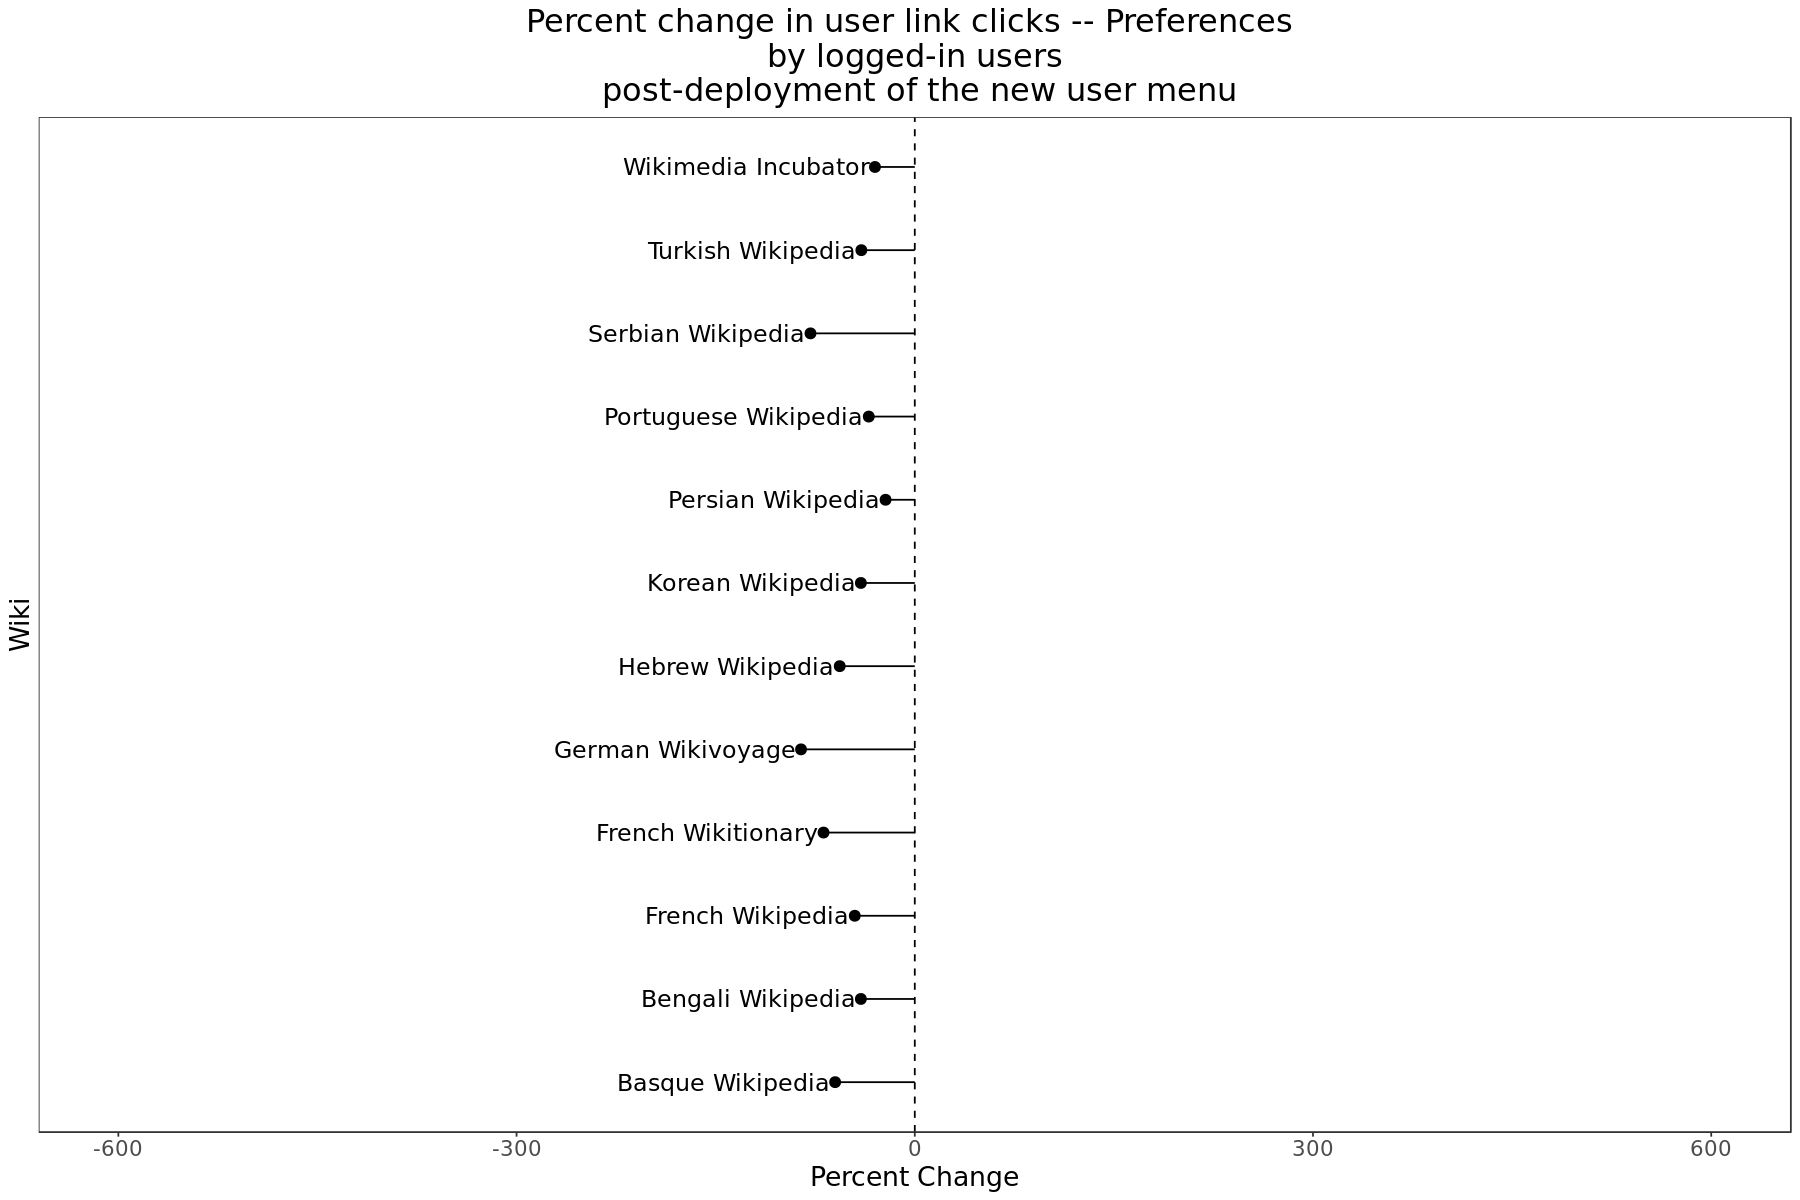

In [132]:
# chart percent change in logged-out sessions pre and post deployment for each of the early adopter wikis

pct_pref_g <- df_pref_clicks_prepost_w %>%
        filter( is.numeric(pct_change) & pre>0) %>%
        ggplot() +
        geom_hline(yintercept = 0, linetype = "dashed") +
        geom_pointrange(
            aes(x = wiki_name, ymin = 0, ymax = pct_change, y = pct_change)
        ) +
        geom_text(
            aes(
                y = pct_change + ifelse(pct_change < 0, -4, 4),
                x = wiki_name, label = wiki_name,
                hjust = ifelse(pct_change < 0, "right", "left")
            ),
            size = 5
        ) +
        scale_x_discrete(breaks = NULL) +
        coord_flip(ylim = c(-600, 600)) +
         labs (x = "Wiki",
                y = "Percent Change",
             title = "Percent change in user link clicks -- Preferences \n by logged-in users \n post-deployment of the new user menu") +
        theme_bw() +
        theme(
            panel.grid.major = element_blank(), 
            panel.grid.minor = element_blank(),
            panel.background = element_blank(),
            plot.title = element_text(hjust = 0.5),
            text = element_text(size=16)) 
      
pct_pref_g 






__Average percent change__

Average of the percent changes observed on each early adopter wiki

In [133]:
mean((filter(df_pref_clicks_prepost_w, is.numeric(pct_change) & pre>0))$pct_change, na.rm=TRUE)

[1] -50.24833

## Beta


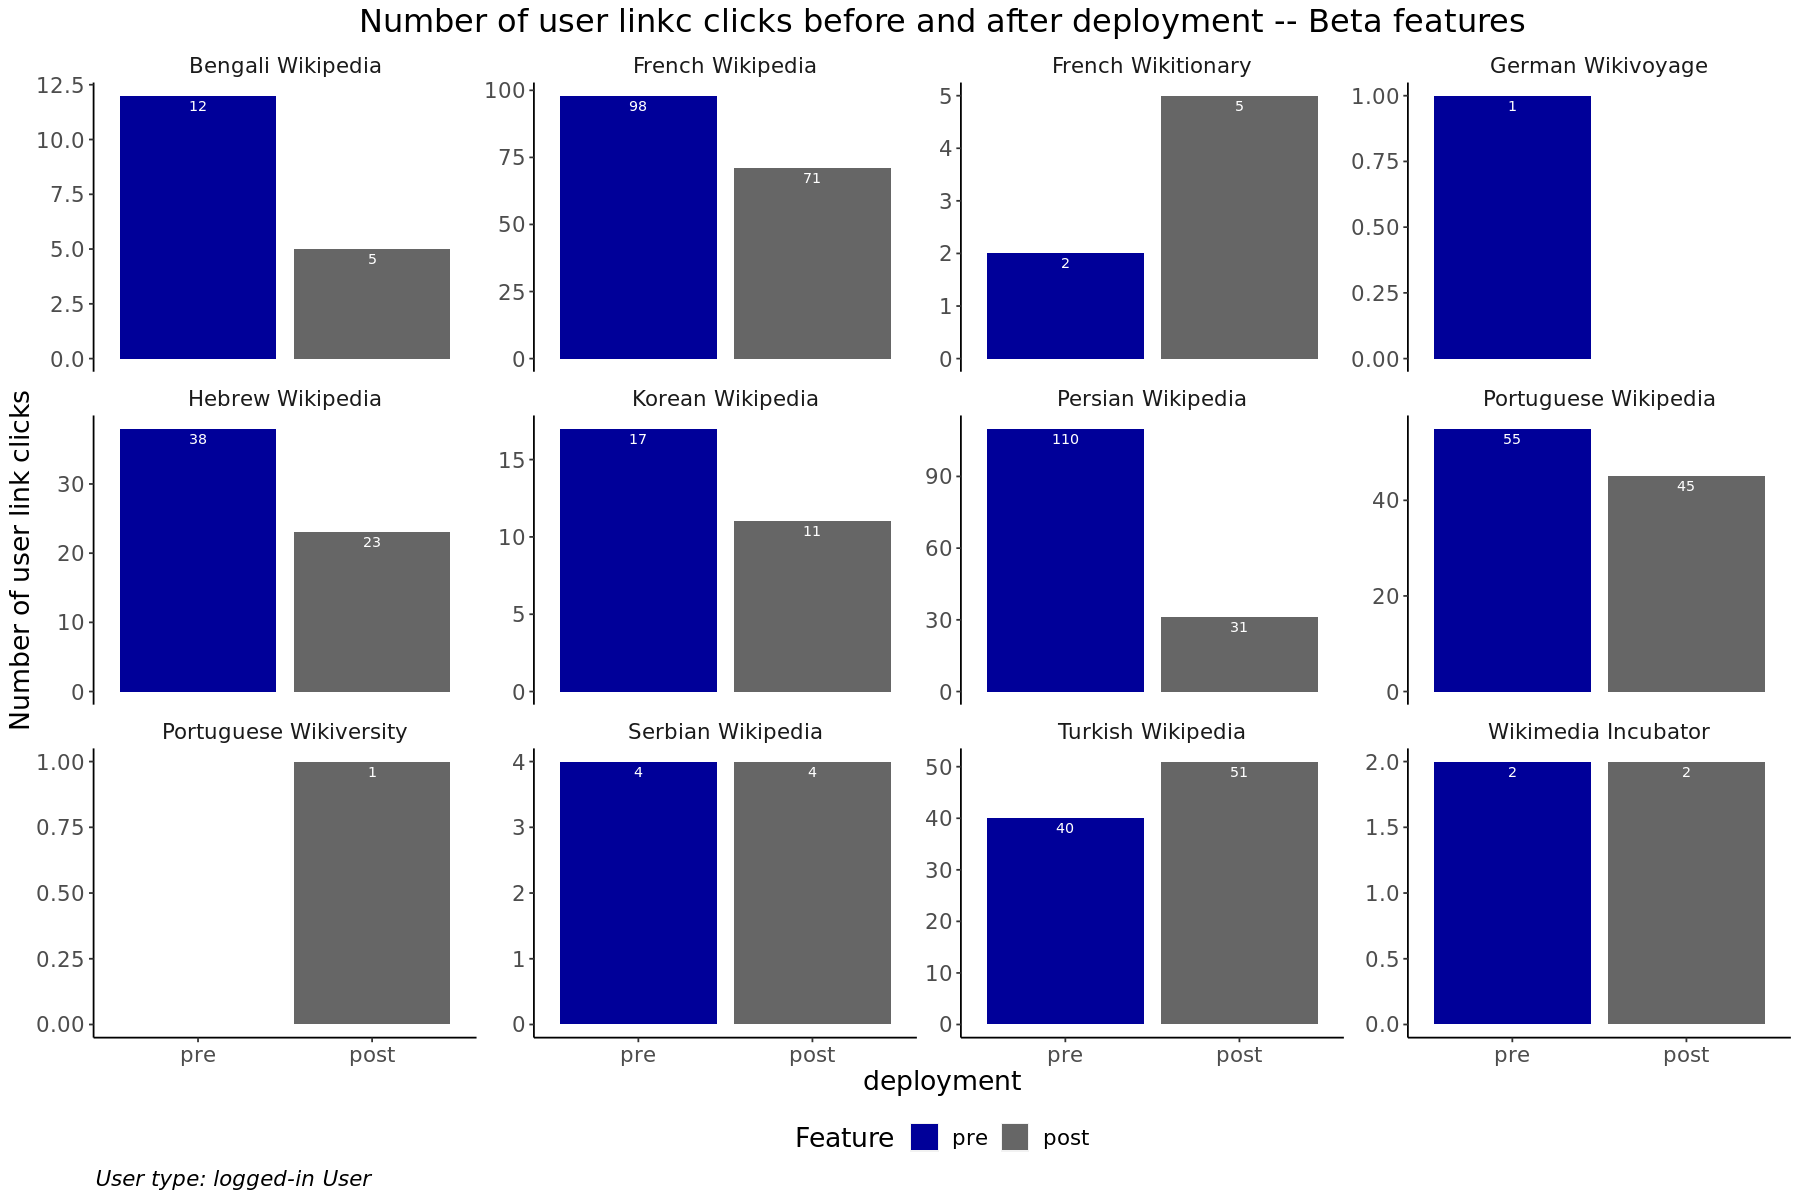

In [134]:
beta_clicks_barchart <- df_user_link_clicks_prepost %>%
        filter(name=='pt-betafeatures') %>%
        ggplot(aes(x = deployment, y= sum_clicks, fill=deployment)) +
        geom_bar(stat="identity", position = 'dodge') +
        geom_text(aes(label = paste(sum_clicks)), color = "white", position = position_dodge(0.9), vjust = 1.5, size = 3) +
        facet_wrap(~wiki_name, scale = 'free_y') +
        labs (
              y = "Number of user link clicks",
             title = "Number of user linkc clicks before and after deployment -- Beta features",
             caption = "User type: logged-in User") +
     scale_fill_manual(values= c( "#000099", "#666666"), name = "Feature")  +
         theme(
            panel.grid.major = element_blank(), 
            panel.grid.minor = element_blank(),
            panel.background = element_blank(),
            plot.caption = element_text(hjust = 0, face= "italic"),
            strip.background =element_rect(fill="white"),
            plot.title = element_text(hjust = 0.5),
            text = element_text(size=16),
            axis.line = element_line(colour = "black"),
            legend.position = "bottom")

beta_clicks_barchart



__Determin the percentage of changes__

In [135]:


# determine percent change

df_beta_clicks_prepost_w <- df_user_link_clicks_prepost %>%
  filter(name=='pt-betafeatures') %>%
  select(wiki_name, deployment,sum_clicks) %>%
  pivot_wider(names_from = deployment, values_from = sum_clicks) %>%
  mutate(pct_change=round((post-pre)/pre * 100 , 2))

df_beta_clicks_prepost_w






wiki_name              post pre pct_change
1  Bengali Wikipedia       5    12 -58.33    
2  French Wikipedia       71    98 -27.55    
3  French Wikitionary      5     2 150.00    
4  German Wikivoyage      NA     1     NA    
5  Hebrew Wikipedia       23    38 -39.47    
6  Korean Wikipedia       11    17 -35.29    
7  Persian Wikipedia      31   110 -71.82    
8  Portuguese Wikipedia   45    55 -18.18    
9  Portuguese Wikiversity  1    NA     NA    
10 Serbian Wikipedia       4     4   0.00    
11 Turkish Wikipedia      51    40  27.50    
12 Wikimedia Incubator     2     2   0.00

Warning message:
“Removed 1 rows containing missing values (geom_pointrange).”
Warning message:
“Removed 1 rows containing missing values (geom_text).”


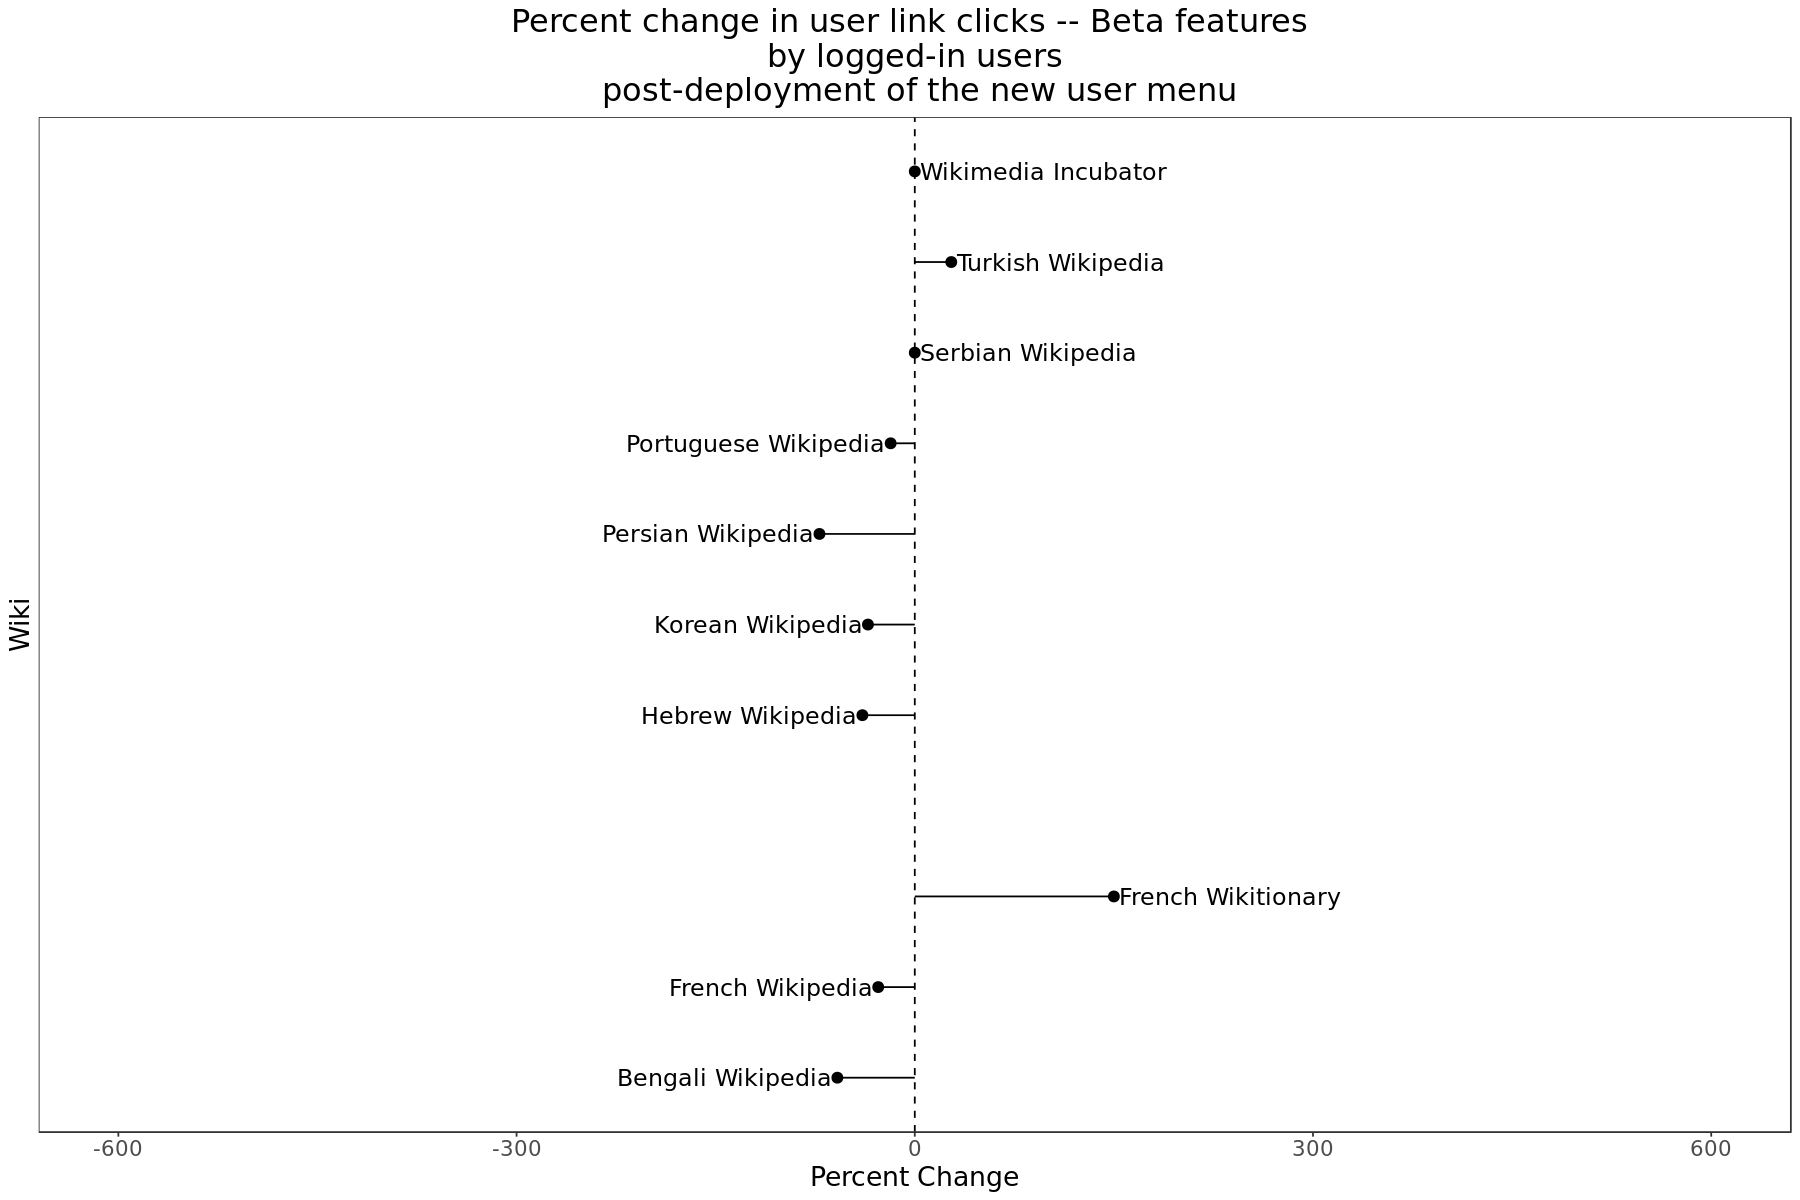

In [136]:
# chart percent change in logged-out sessions pre and post deployment for each of the early adopter wikis

pct_beta_g <- df_beta_clicks_prepost_w %>%
        filter( is.numeric(pct_change) & pre>0) %>%
        ggplot() +
        geom_hline(yintercept = 0, linetype = "dashed") +
        geom_pointrange(
            aes(x = wiki_name, ymin = 0, ymax = pct_change, y = pct_change)
        ) +
        geom_text(
            aes(
                y = pct_change + ifelse(pct_change < 0, -4, 4),
                x = wiki_name, label = wiki_name,
                hjust = ifelse(pct_change < 0, "right", "left")
            ),
            size = 5
        ) +
        scale_x_discrete(breaks = NULL) +
        coord_flip(ylim = c(-600, 600)) +
         labs (x = "Wiki",
                y = "Percent Change",
             title = "Percent change in user link clicks -- Beta features \n by logged-in users \n post-deployment of the new user menu") +
        theme_bw() +
        theme(
            panel.grid.major = element_blank(), 
            panel.grid.minor = element_blank(),
            panel.background = element_blank(),
            plot.title = element_text(hjust = 0.5),
            text = element_text(size=16)) 
      
pct_beta_g 

__Average percent change__

Average of the percent changes observed on each early adopter wiki

In [137]:


mean((filter(df_beta_clicks_prepost_w, is.numeric(pct_change) & pre>0))$pct_change, na.rm=TRUE)

[1] -7.314

## Contributions


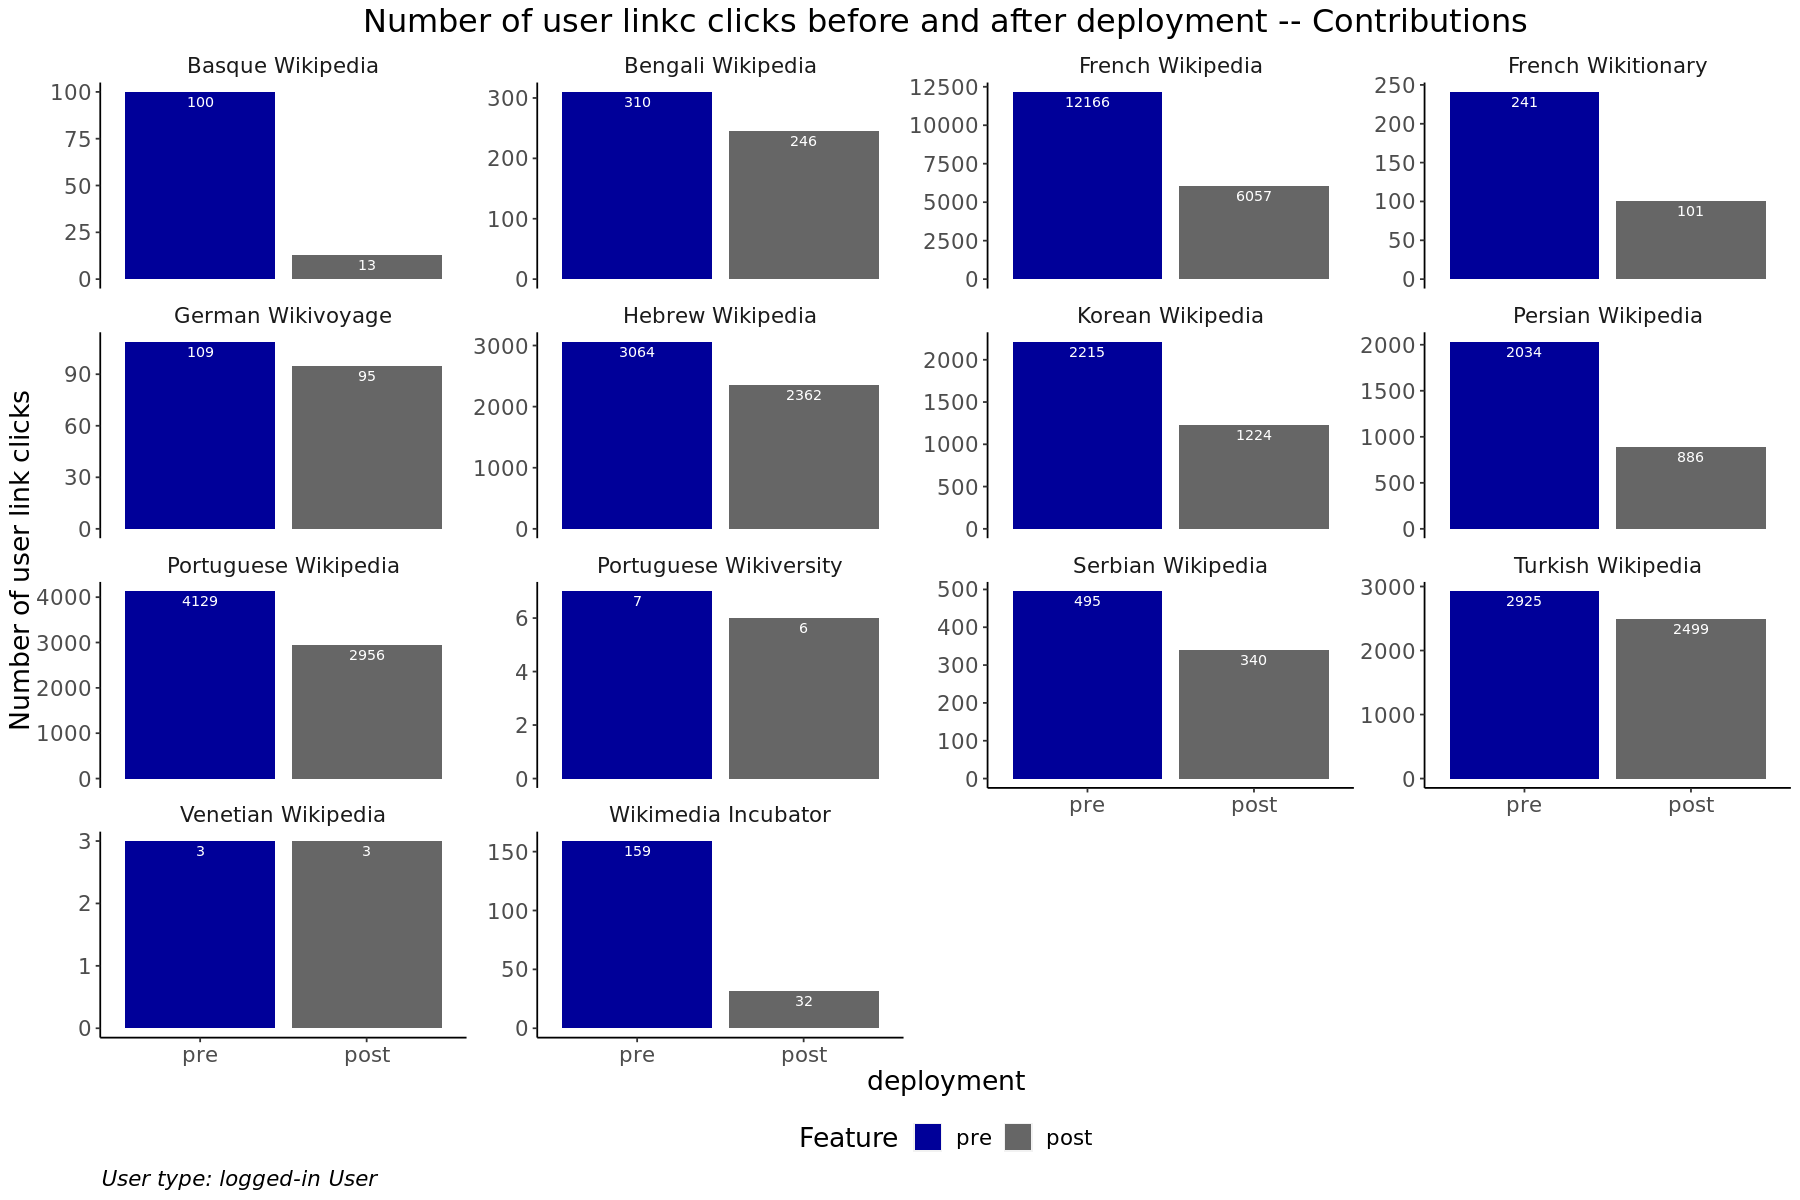

In [138]:
contris_clicks_barchart <- df_user_link_clicks_prepost %>%
        filter(name=='pt-mycontris') %>%
        ggplot(aes(x = deployment, y= sum_clicks, fill=deployment)) +
        geom_bar(stat="identity", position = 'dodge') +
        geom_text(aes(label = paste(sum_clicks)), color = "white", position = position_dodge(0.9), vjust = 1.5, size = 3) +
        facet_wrap(~wiki_name, scale = 'free_y') +
        labs (
              y = "Number of user link clicks",
             title = "Number of user linkc clicks before and after deployment -- Contributions",
             caption = "User type: logged-in User") +
     scale_fill_manual(values= c( "#000099", "#666666"), name = "Feature")  +
         theme(
            panel.grid.major = element_blank(), 
            panel.grid.minor = element_blank(),
            panel.background = element_blank(),
            plot.caption = element_text(hjust = 0, face= "italic"),
            strip.background =element_rect(fill="white"),
            plot.title = element_text(hjust = 0.5),
            text = element_text(size=16),
            axis.line = element_line(colour = "black"),
            legend.position = "bottom")

contris_clicks_barchart



__Determin the percentage of changes__

In [139]:
# determine percent change

df_contris_clicks_prepost_w <- df_user_link_clicks_prepost %>%
  filter(name=='pt-mycontris') %>%
  select(wiki_name, deployment,sum_clicks) %>%
  pivot_wider(names_from = deployment, values_from = sum_clicks) %>%
  mutate(pct_change=round((post-pre)/pre * 100 , 2))

df_contris_clicks_prepost_w

wiki_name              post pre   pct_change
1  Basque Wikipedia         13   100 -87.00    
2  Bengali Wikipedia       246   310 -20.65    
3  French Wikipedia       6057 12166 -50.21    
4  French Wikitionary      101   241 -58.09    
5  German Wikivoyage        95   109 -12.84    
6  Hebrew Wikipedia       2362  3064 -22.91    
7  Korean Wikipedia       1224  2215 -44.74    
8  Persian Wikipedia       886  2034 -56.44    
9  Portuguese Wikipedia   2956  4129 -28.41    
10 Portuguese Wikiversity    6     7 -14.29    
11 Serbian Wikipedia       340   495 -31.31    
12 Turkish Wikipedia      2499  2925 -14.56    
13 Venetian Wikipedia        3     3   0.00    
14 Wikimedia Incubator      32   159 -79.87

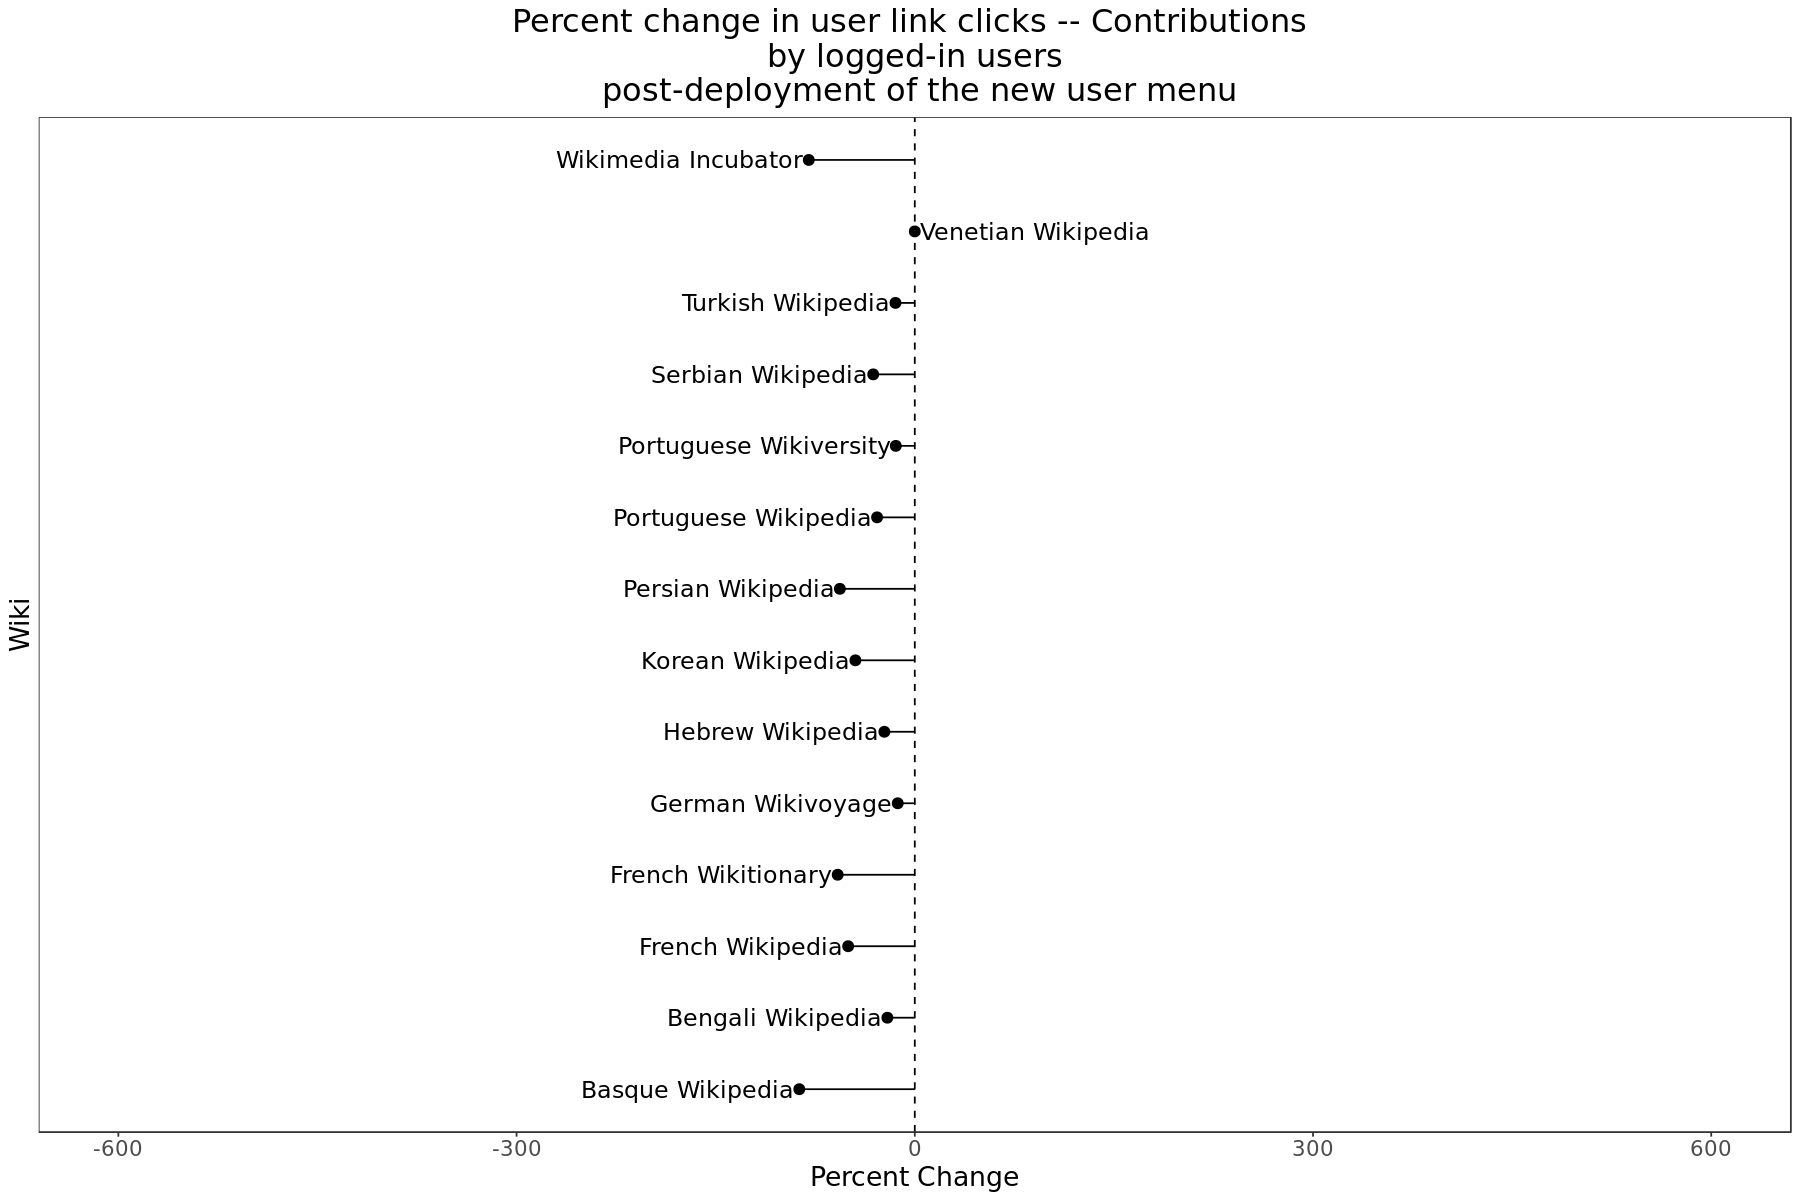

In [140]:

# chart percent change in logged-out sessions pre and post deployment for each of the early adopter wikis

pct_contris_g <- df_contris_clicks_prepost_w %>%
        filter( is.numeric(pct_change) & pre>0) %>%
        ggplot() +
        geom_hline(yintercept = 0, linetype = "dashed") +
        geom_pointrange(
            aes(x = wiki_name, ymin = 0, ymax = pct_change, y = pct_change)
        ) +
        geom_text(
            aes(
                y = pct_change + ifelse(pct_change < 0, -4, 4),
                x = wiki_name, label = wiki_name,
                hjust = ifelse(pct_change < 0, "right", "left")
            ),
            size = 5
        ) +
        scale_x_discrete(breaks = NULL) +
        coord_flip(ylim = c(-600, 600)) +
         labs (x = "Wiki",
                y = "Percent Change",
             title = "Percent change in user link clicks -- Contributions \n by logged-in users \n post-deployment of the new user menu") +
        theme_bw() +
        theme(
            panel.grid.major = element_blank(), 
            panel.grid.minor = element_blank(),
            panel.background = element_blank(),
            plot.title = element_text(hjust = 0.5),
            text = element_text(size=16)) 
      
pct_contris_g 







__Average percent change__

Average of the percent changes observed on each early adopter wiki


In [141]:

mean((filter(df_contris_clicks_prepost_w, is.numeric(pct_change) & pre>0))$pct_change, na.rm=TRUE)

[1] -37.23714

## Log out

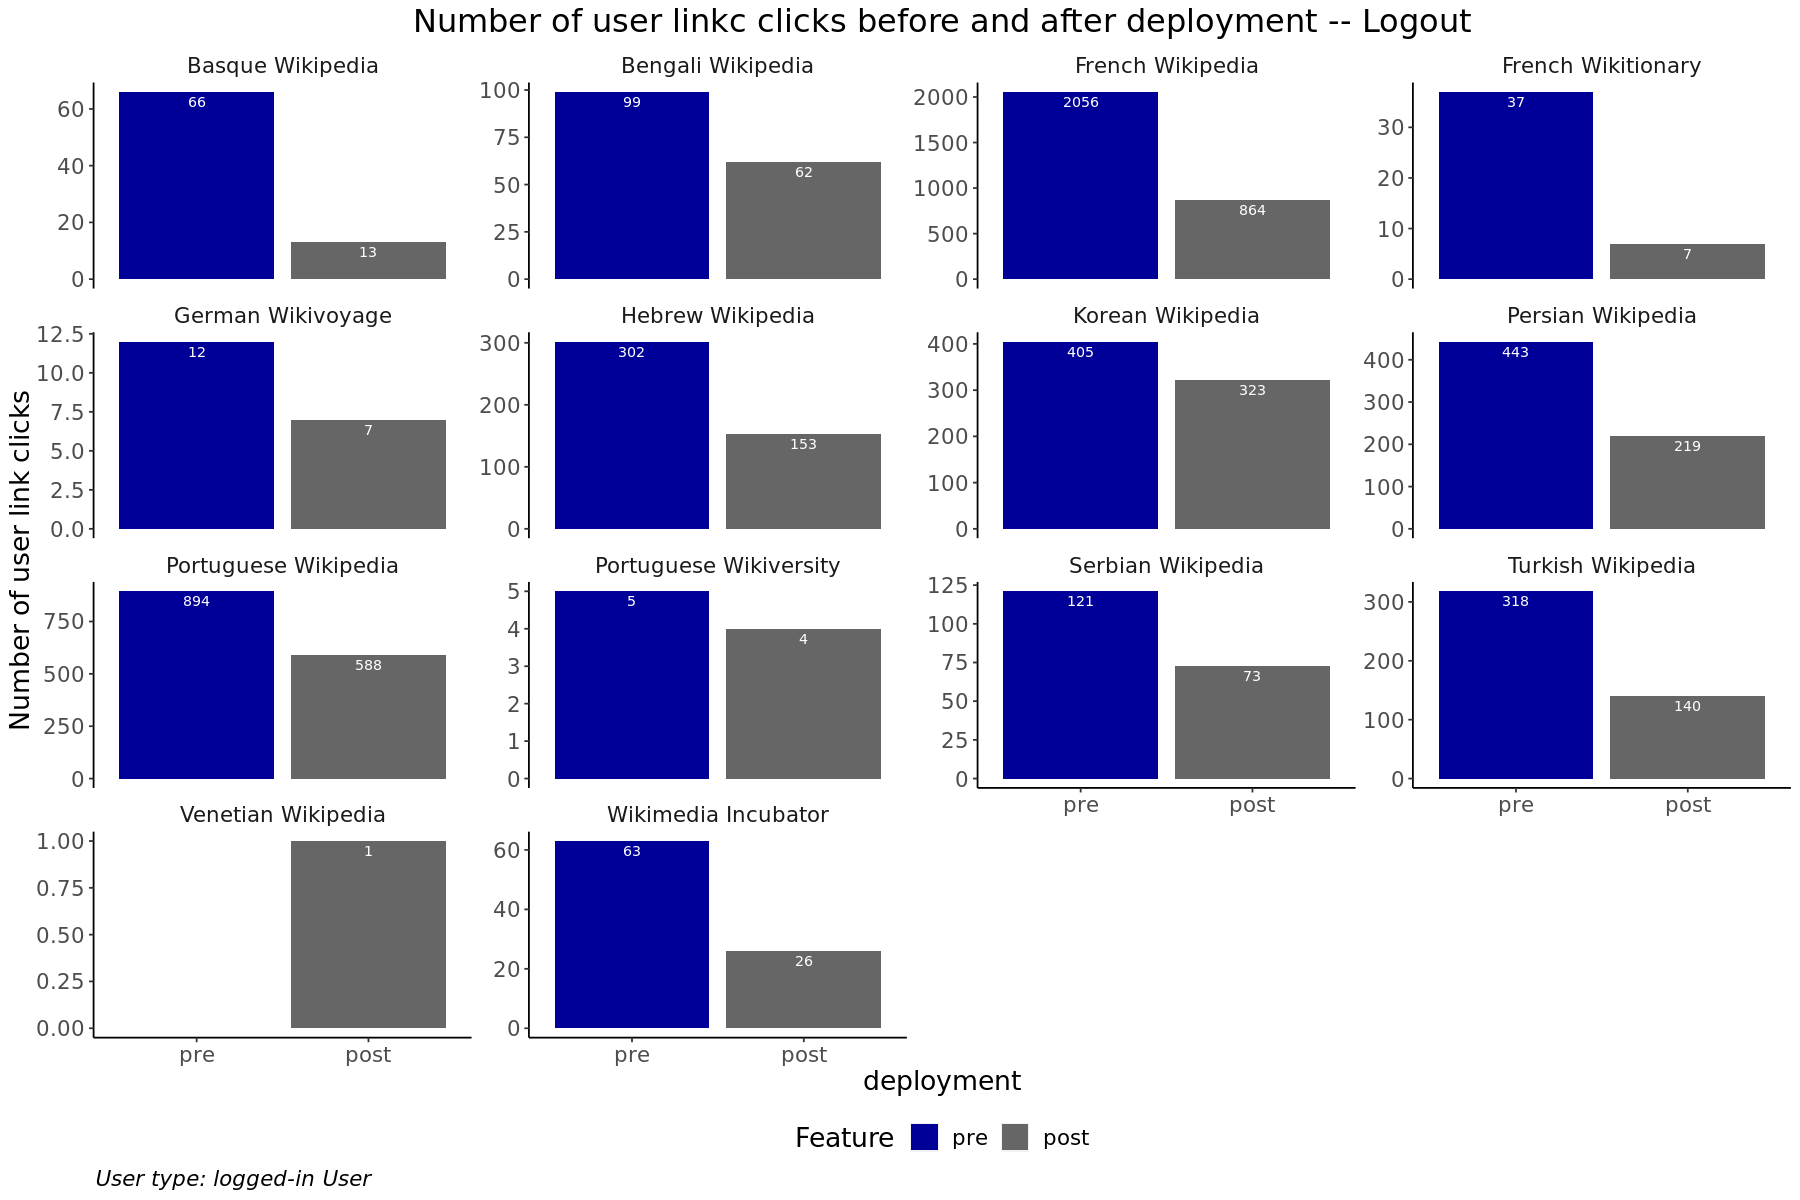

In [142]:
logout_clicks_barchart <- df_user_link_clicks_prepost %>%
        filter(name=='pt-logout') %>%
        ggplot(aes(x = deployment, y= sum_clicks, fill=deployment)) +
        geom_bar(stat="identity", position = 'dodge') +
        geom_text(aes(label = paste(sum_clicks)), color = "white", position = position_dodge(0.9), vjust = 1.5, size = 3) +
        facet_wrap(~wiki_name, scale = 'free_y') +
        labs (
              y = "Number of user link clicks",
             title = "Number of user linkc clicks before and after deployment -- Logout",
             caption = "User type: logged-in User") +
     scale_fill_manual(values= c( "#000099", "#666666"), name = "Feature")  +
         theme(
            panel.grid.major = element_blank(), 
            panel.grid.minor = element_blank(),
            panel.background = element_blank(),
            plot.caption = element_text(hjust = 0, face= "italic"),
            strip.background =element_rect(fill="white"),
            plot.title = element_text(hjust = 0.5),
            text = element_text(size=16),
            axis.line = element_line(colour = "black"),
            legend.position = "bottom")

logout_clicks_barchart

__Determin the percentage of changes__

In [143]:
# determine percent change

df_logout_clicks_prepost_w <- df_user_link_clicks_prepost %>%
  filter(name=='pt-logout') %>%
  select(wiki_name, deployment,sum_clicks) %>%
  pivot_wider(names_from = deployment, values_from = sum_clicks) %>%
  mutate(pct_change=round((post-pre)/pre * 100 , 2))

df_logout_clicks_prepost_w

wiki_name              post pre  pct_change
1  Basque Wikipedia        13    66 -80.30    
2  Bengali Wikipedia       62    99 -37.37    
3  French Wikipedia       864  2056 -57.98    
4  French Wikitionary       7    37 -81.08    
5  German Wikivoyage        7    12 -41.67    
6  Hebrew Wikipedia       153   302 -49.34    
7  Korean Wikipedia       323   405 -20.25    
8  Persian Wikipedia      219   443 -50.56    
9  Portuguese Wikipedia   588   894 -34.23    
10 Portuguese Wikiversity   4     5 -20.00    
11 Serbian Wikipedia       73   121 -39.67    
12 Turkish Wikipedia      140   318 -55.97    
13 Venetian Wikipedia       1    NA     NA    
14 Wikimedia Incubator     26    63 -58.73

Warning message:
“Removed 1 rows containing missing values (geom_pointrange).”
Warning message:
“Removed 1 rows containing missing values (geom_text).”


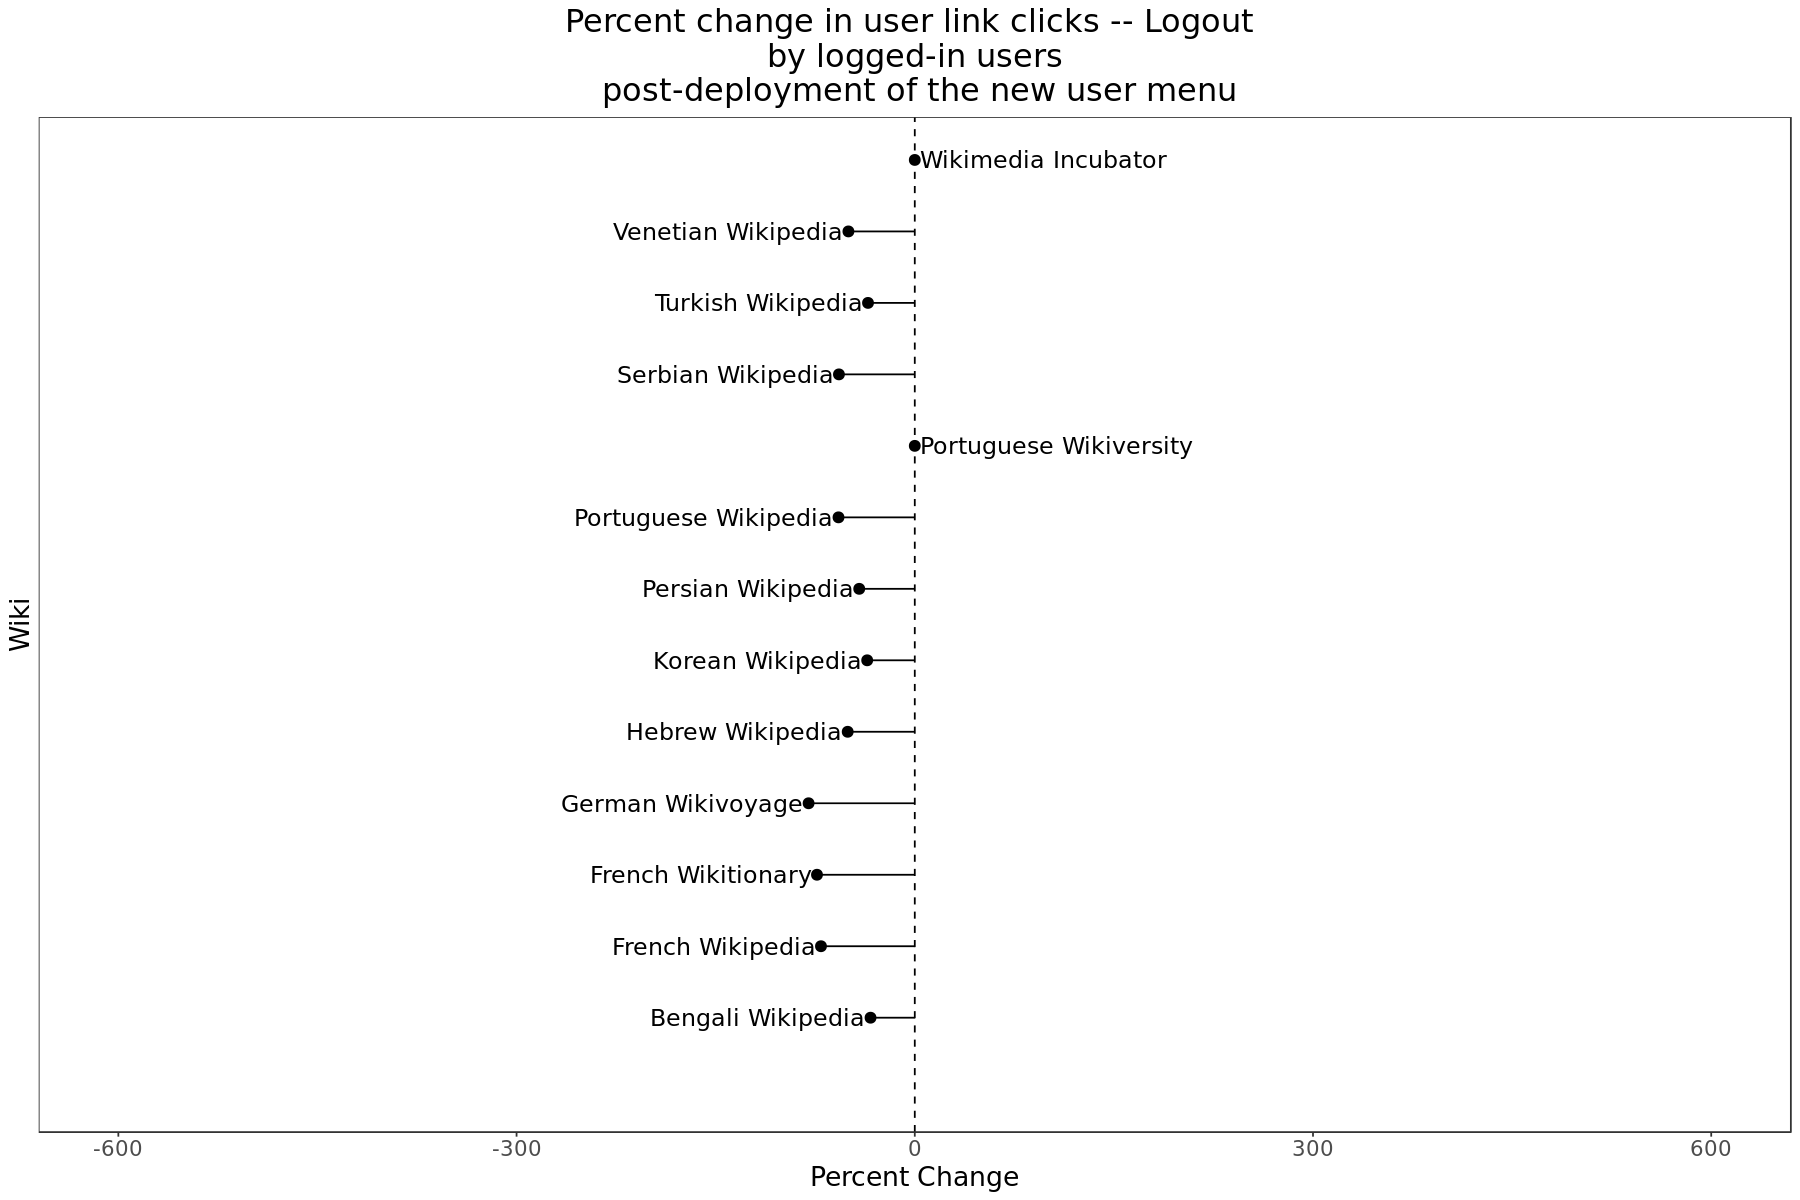

In [144]:






# chart percent change in logged-out sessions pre and post deployment for each of the early adopter wikis

pct_logout_g <- df_talk_clicks_prepost_w %>%
        filter( is.numeric(pct_change) & pre>0) %>%
        ggplot() +
        geom_hline(yintercept = 0, linetype = "dashed") +
        geom_pointrange(
            aes(x = wiki_name, ymin = 0, ymax = pct_change, y = pct_change)
        ) +
        geom_text(
            aes(
                y = pct_change + ifelse(pct_change < 0, -4, 4),
                x = wiki_name, label = wiki_name,
                hjust = ifelse(pct_change < 0, "right", "left")
            ),
            size = 5
        ) +
        scale_x_discrete(breaks = NULL) +
        coord_flip(ylim = c(-600, 600)) +
         labs (x = "Wiki",
                y = "Percent Change",
             title = "Percent change in user link clicks -- Logout \n by logged-in users \n post-deployment of the new user menu") +
        theme_bw() +
        theme(
            panel.grid.major = element_blank(), 
            panel.grid.minor = element_blank(),
            panel.background = element_blank(),
            plot.title = element_text(hjust = 0.5),
            text = element_text(size=16)) 
      
pct_logout_g 




__Average percent change__

Average of the percent changes observed on each early adopter wiki



In [145]:
mean((filter(df_logout_clicks_prepost_w, is.numeric(pct_change) & pre>0))$pct_change, na.rm=TRUE)

[1] -48.24231

__Summary__

- After deplyed new user menu, the numbers of clicks on user links decreased on all types of links. The changes varied between -40% ~ -50%. It is expected. 

#  Does edit count affect this in any way?

__Edit Attempt__

In [146]:
query_edit_attempt <- "
SELECT CONCAT(year , '-', LPAD(month, 2, '0'), '-', LPAD(day , 2, '0')) AS date_time,
          wiki,
          COUNT(1) AS n_events
FROM event_sanitized.editattemptstep
WHERE YEAR = 2021
     AND Month in (7,8,9)
    -- logged in user
     AND event.user_id != 0 AND event.user_class IS NULL
     AND event.action = 'init'
     AND wiki IN ('frwiktionary' , 'hewiki' ,'ptwikiversity' ,'frwiki', 'euwiki' ,
         'fawiki' ,'ptwiki' , 'kowiki' , 'trwiki' , 'srwiki' , 'bnwiki' , 'dewikivoyage' ,
         'vecwiki' , 'incubatorwiki' )
GROUP BY CONCAT(year , '-', LPAD(month, 2, '0'), '-', LPAD(day , 2, '0')) , wiki
ORDER BY date_time, wiki
LIMIT 100000
"

In [61]:
df_edit_attempt <-  wmfdata::query_hive(query_edit_attempt)

Don't forget to authenticate with Kerberos using kinit



In [62]:
df_edit_attempt

date_time  wiki          n_events
1    2021-07-01 bnwiki         333    
2    2021-07-01 dewikivoyage    11    
3    2021-07-01 euwiki          42    
4    2021-07-01 fawiki        1099    
5    2021-07-01 frwiki        2047    
6    2021-07-01 frwiktionary    80    
7    2021-07-01 hewiki         593    
8    2021-07-01 incubatorwiki   66    
9    2021-07-01 kowiki         394    
10   2021-07-01 ptwiki        2219    
11   2021-07-01 ptwikiversity    7    
12   2021-07-01 srwiki         273    
13   2021-07-01 trwiki         477    
14   2021-07-01 vecwiki          3    
15   2021-07-02 bnwiki         314    
16   2021-07-02 dewikivoyage    15    
17   2021-07-02 euwiki          36    
18   2021-07-02 fawiki        1133    
19   2021-07-02 frwiki        2055    
20   2021-07-02 frwiktionary    75    
21   2021-07-02 hewiki         659    
22   2021-07-02 incubatorwiki   38    
23   2021-07-02 kowiki         350    
24   2021-07-02 ptwiki        2408    
25   2021-07-02 ptwikiversity   19    
26   2021-07-02 srwiki         297    
27   2021-07-02 trwiki         538    
28   2021-07-02 vecwiki          1    
29   2021-07-03 bnwiki         307    
30   2021-07-03 dewikivoyage     3    
⋮    ⋮          ⋮             ⋮       
1236 2021-09-28 trwiki         410    
1237 2021-09-28 vecwiki          3    
1238 2021-09-29 bnwiki         402    
1239 2021-09-29 dewikivoyage    13    
1240 2021-09-29 euwiki          38    
1241 2021-09-29 fawiki        1475    
1242 2021-09-29 frwiki        2663    
1243 2021-09-29 frwiktionary   231    
1244 2021-09-29 hewiki         689    
1245 2021-09-29 incubatorwiki   82    
1246 2021-09-29 kowiki         466    
1247 2021-09-29 ptwiki        2527    
1248 2021-09-29 ptwikiversity    3    
1249 2021-09-29 srwiki         240    
1250 2021-09-29 trwiki         525    
1251 2021-09-29 vecwiki          3    
1252 2021-09-30 bnwiki         359    
1253 2021-09-30 dewikivoyage    18    
1254 2021-09-30 euwiki          59    
1255 2021-09-30 fawiki        1324    
1256 2021-09-30 frwiki        2436    
1257 2021-09-30 frwiktionary   236    
1258 2021-09-30 hewiki         721    
1259 2021-09-30 incubatorwiki  102    
1260 2021-09-30 kowiki         466    
1261 2021-09-30 ptwiki        2349    
1262 2021-09-30 ptwikiversity    3    
1263 2021-09-30 srwiki         213    
1264 2021-09-30 trwiki         478    
1265 2021-09-30 vecwiki          4

In [63]:
df_edit_attempt$date_time <- as.Date(df_edit_attempt$date_time)

In [65]:
df_edit_attempt <- df_edit_attempt %>%
mutate(
wiki_name = case_when( #clarfiy Wiki project names
        wiki == 'frwiktionary' ~ "French Wikitionary",
        wiki == 'hewiki' ~ 'Hebrew Wikipedia',
        wiki == 'ptwikiversity' ~ 'Portuguese Wikiversity',
        wiki == 'frwiki'~ "French Wikipedia",
        wiki == 'euwiki' ~ "Basque Wikipedia",
        wiki == 'fawiki' ~ 'Persian Wikipedia',
        wiki == 'ptwiki' ~ 'Portuguese Wikipedia',
        wiki == 'kowiki' ~ 'Korean Wikipedia',
        wiki == 'trwiki' ~ 'Turkish Wikipedia',
        wiki == 'srwiki' ~ 'Serbian Wikipedia',
        wiki == 'bnwiki' ~ 'Bengali Wikipedia',
        wiki == 'dewikivoyage' ~ 'German Wikivoyage',
        wiki == 'vecwiki' ~ 'Venetian Wikipedia',
        wiki == 'incubatorwiki' ~ 'Wikimedia Incubator'),
)

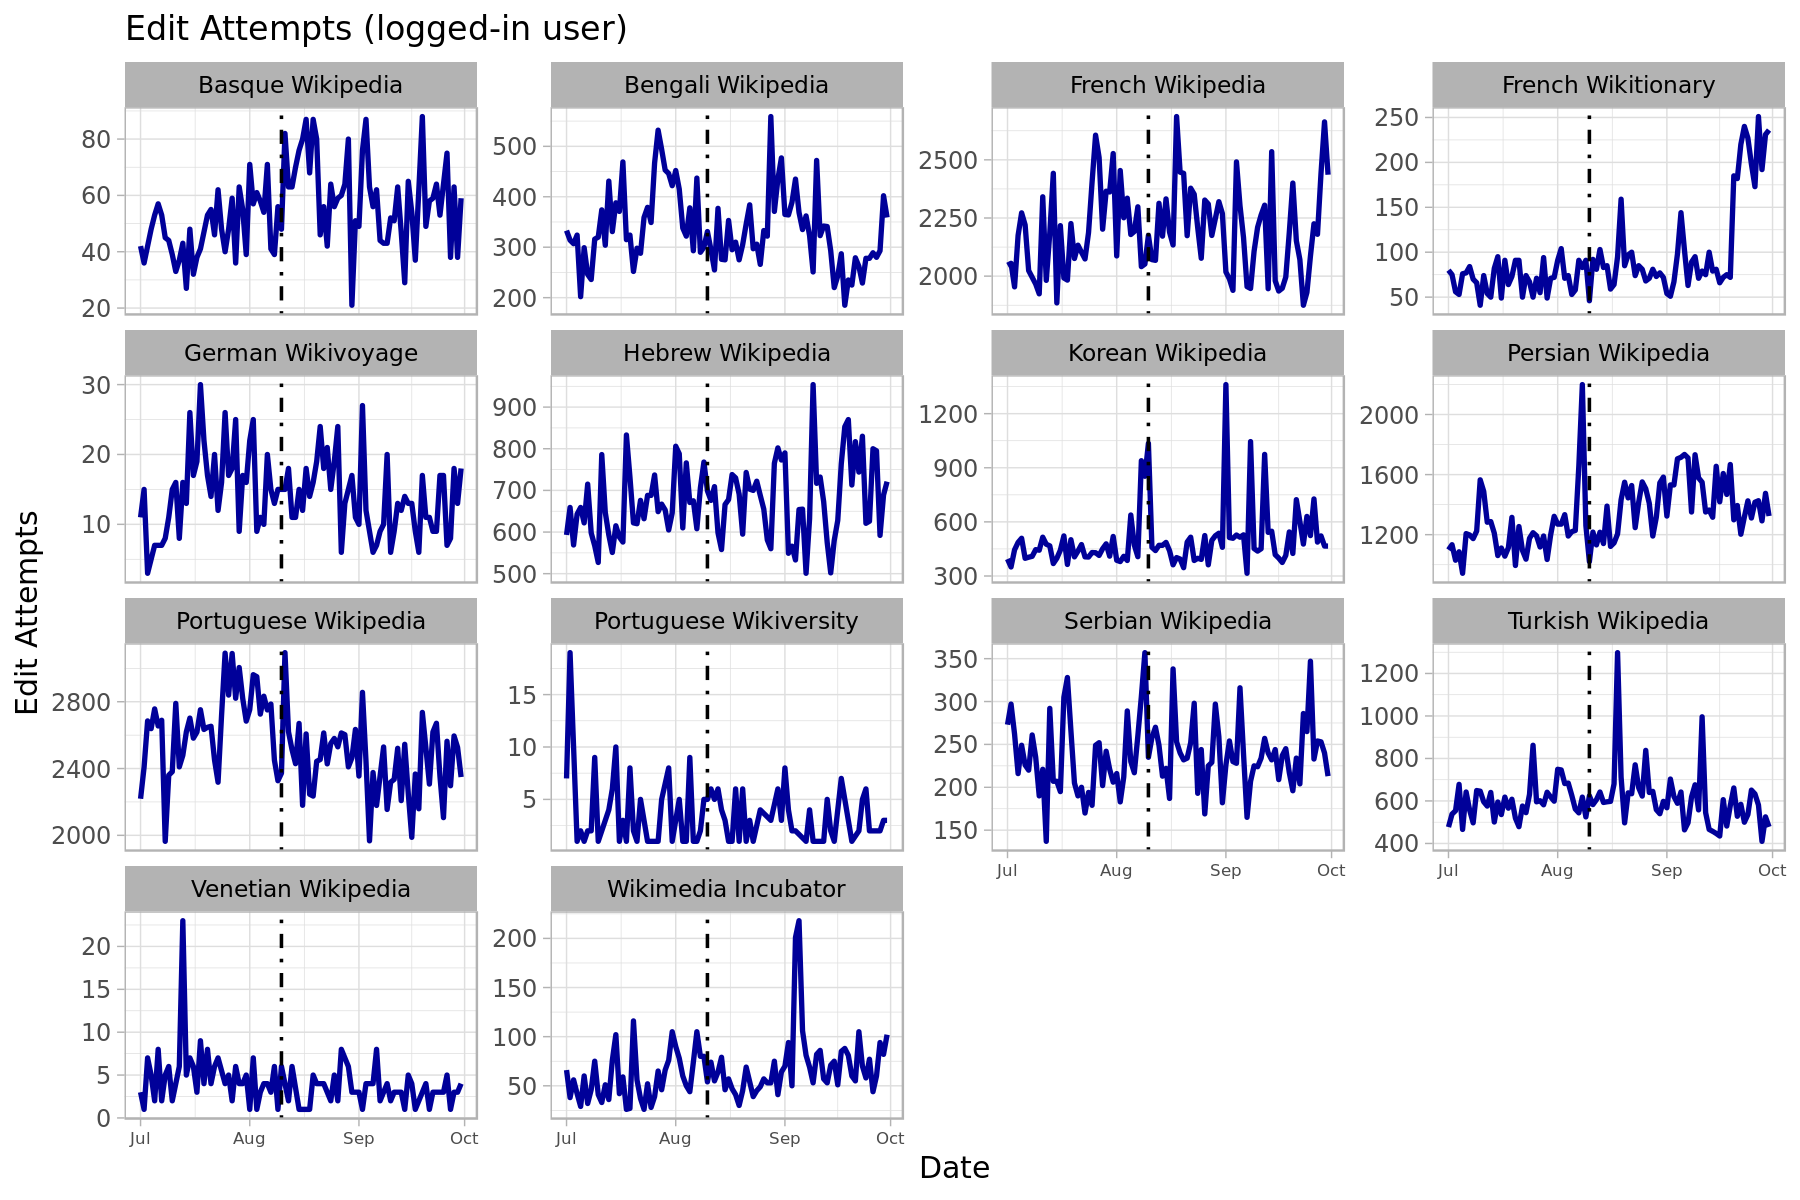

In [67]:
edit_attempt_g <- ggplot(data=df_edit_attempt, 
                                mapping=aes(x=date_time)) +
geom_line(aes(y=n_events ), color="#000099" , size = 1.5) +
geom_vline(aes(xintercept = as.numeric(as.Date('2021-08-10'))), linetype="dotdash", color="black", size=1)+
facet_wrap(~wiki_name,nrow=4,scale = 'free_y')+
labs(title = 'Edit Attempts (logged-in user) ',
     x = 'Date',
     y = 'Edit Attempts') +
theme_light(base_size=18) +
theme(legend.position = "bottom", 
     plot.caption = element_text(hjust = 0, face= "italic"),
     strip.text = element_text(size = 14, colour='black'),
     axis.text.x = element_text( size = 10 ),
     plot.title = element_text(size=20))
edit_attempt_g

In [147]:
# add column classifying pre and post deployment dates
df_edit_attempt_prepost <- df_edit_attempt %>%
    mutate(deployment = case_when(
        date_time >= '2021-07-13' & date_time <= '2021-08-09'  ~ 'pre',
        date_time >= '2021-08-10' & date_time <= '2021-09-06'  ~ 'post',      
        TRUE ~ 'NA'
    ))   %>%
       filter(deployment!='NA') %>%
    group_by(wiki_name, deployment) %>%
    summarize(sum_events = sum(n_events),  .groups = 'drop')

In [148]:
df_edit_attempt_prepost

wiki_name              deployment sum_events
1  Basque Wikipedia       post        1796     
2  Basque Wikipedia       pre         1388     
3  Bengali Wikipedia      post        9700     
4  Bengali Wikipedia      pre        10593     
5  French Wikipedia       post       62771     
6  French Wikipedia       pre        62367     
7  French Wikitionary     post        2347     
8  French Wikitionary     pre         2055     
9  German Wikivoyage      post         418     
10 German Wikivoyage      pre          490     
11 Hebrew Wikipedia       post       18777     
12 Hebrew Wikipedia       pre        18769     
13 Korean Wikipedia       post       14339     
14 Korean Wikipedia       pre        13194     
15 Persian Wikipedia      post       38847     
16 Persian Wikipedia      pre        34608     
17 Portuguese Wikipedia   post       69465     
18 Portuguese Wikipedia   pre        76064     
19 Portuguese Wikiversity post          81     
20 Portuguese Wikiversity pre           82     
21 Serbian Wikipedia      post        6772     
22 Serbian Wikipedia      pre         6580     
23 Turkish Wikipedia      post       18163     
24 Turkish Wikipedia      pre        17050     
25 Venetian Wikipedia     post         101     
26 Venetian Wikipedia     pre          142     
27 Wikimedia Incubator    post        1930     
28 Wikimedia Incubator    pre         1741

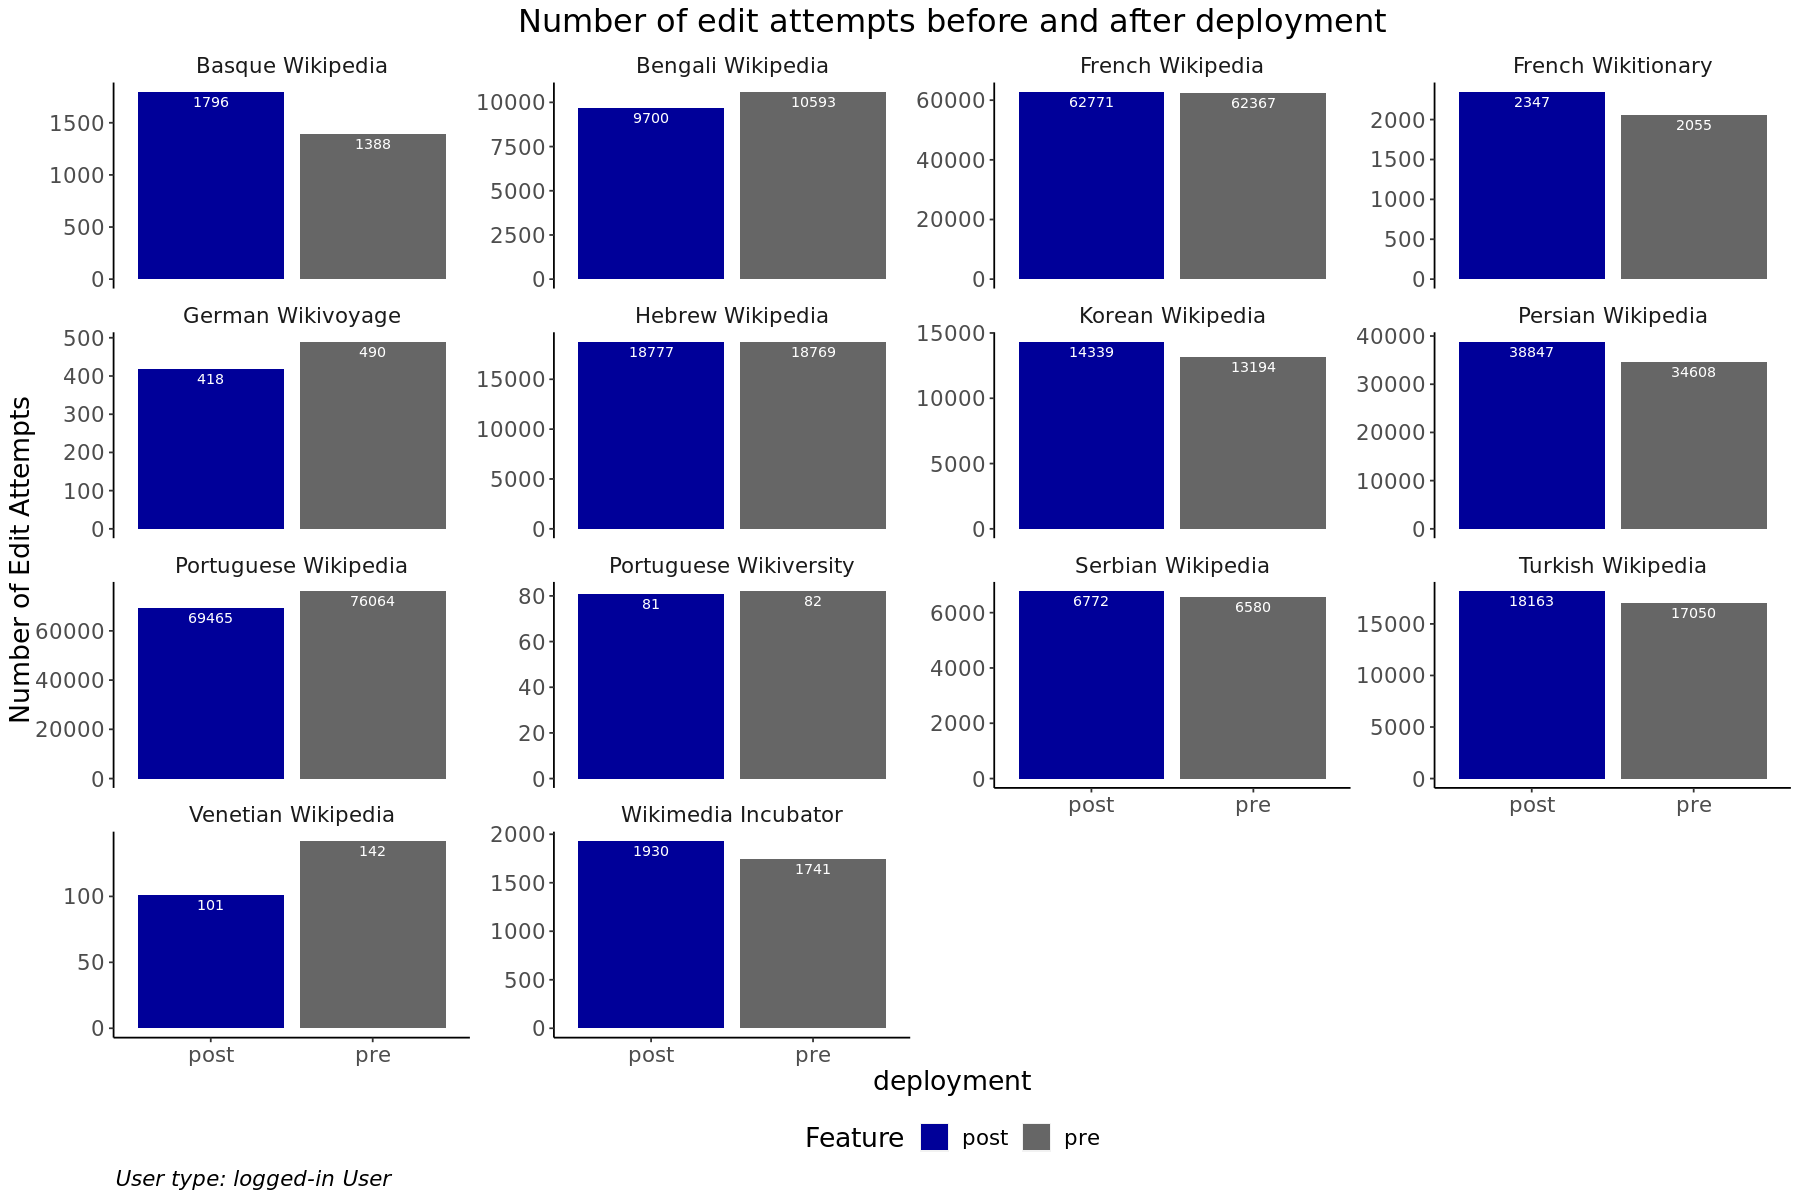

In [149]:
edit_attempt_barchart <- df_edit_attempt_prepost %>%
        ggplot(aes(x = deployment, y= sum_events, fill=deployment)) +
        geom_bar(stat="identity", position = 'dodge') +
        geom_text(aes(label = paste(sum_events)), color = "white", position = position_dodge(0.9), vjust = 1.5, size = 3) +
        facet_wrap(~wiki_name, scale = 'free_y') +
        labs (
              y = "Number of Edit Attempts",
             title = "Number of edit attempts before and after deployment",
             caption = "User type: logged-in User") +
     scale_fill_manual(values= c( "#000099", "#666666"), name = "Feature")  +
         theme(
            panel.grid.major = element_blank(), 
            panel.grid.minor = element_blank(),
            panel.background = element_blank(),
            plot.caption = element_text(hjust = 0, face= "italic"),
            strip.background =element_rect(fill="white"),
            plot.title = element_text(hjust = 0.5),
            text = element_text(size=16),
            axis.line = element_line(colour = "black"),
            legend.position = "bottom")

edit_attempt_barchart

__Determin the percentage of changes__

In [150]:

# determine percent change

df_edit_attempt_prepost_w <- df_edit_attempt_prepost %>%
  select(wiki_name, deployment,sum_events) %>%
  pivot_wider(names_from = deployment, values_from = sum_events) %>%
  mutate(pct_change=round((post-pre)/pre * 100 , 2))

df_edit_attempt_prepost_w

wiki_name              post  pre   pct_change
1  Basque Wikipedia        1796  1388  29.39    
2  Bengali Wikipedia       9700 10593  -8.43    
3  French Wikipedia       62771 62367   0.65    
4  French Wikitionary      2347  2055  14.21    
5  German Wikivoyage        418   490 -14.69    
6  Hebrew Wikipedia       18777 18769   0.04    
7  Korean Wikipedia       14339 13194   8.68    
8  Persian Wikipedia      38847 34608  12.25    
9  Portuguese Wikipedia   69465 76064  -8.68    
10 Portuguese Wikiversity    81    82  -1.22    
11 Serbian Wikipedia       6772  6580   2.92    
12 Turkish Wikipedia      18163 17050   6.53    
13 Venetian Wikipedia       101   142 -28.87    
14 Wikimedia Incubator     1930  1741  10.86

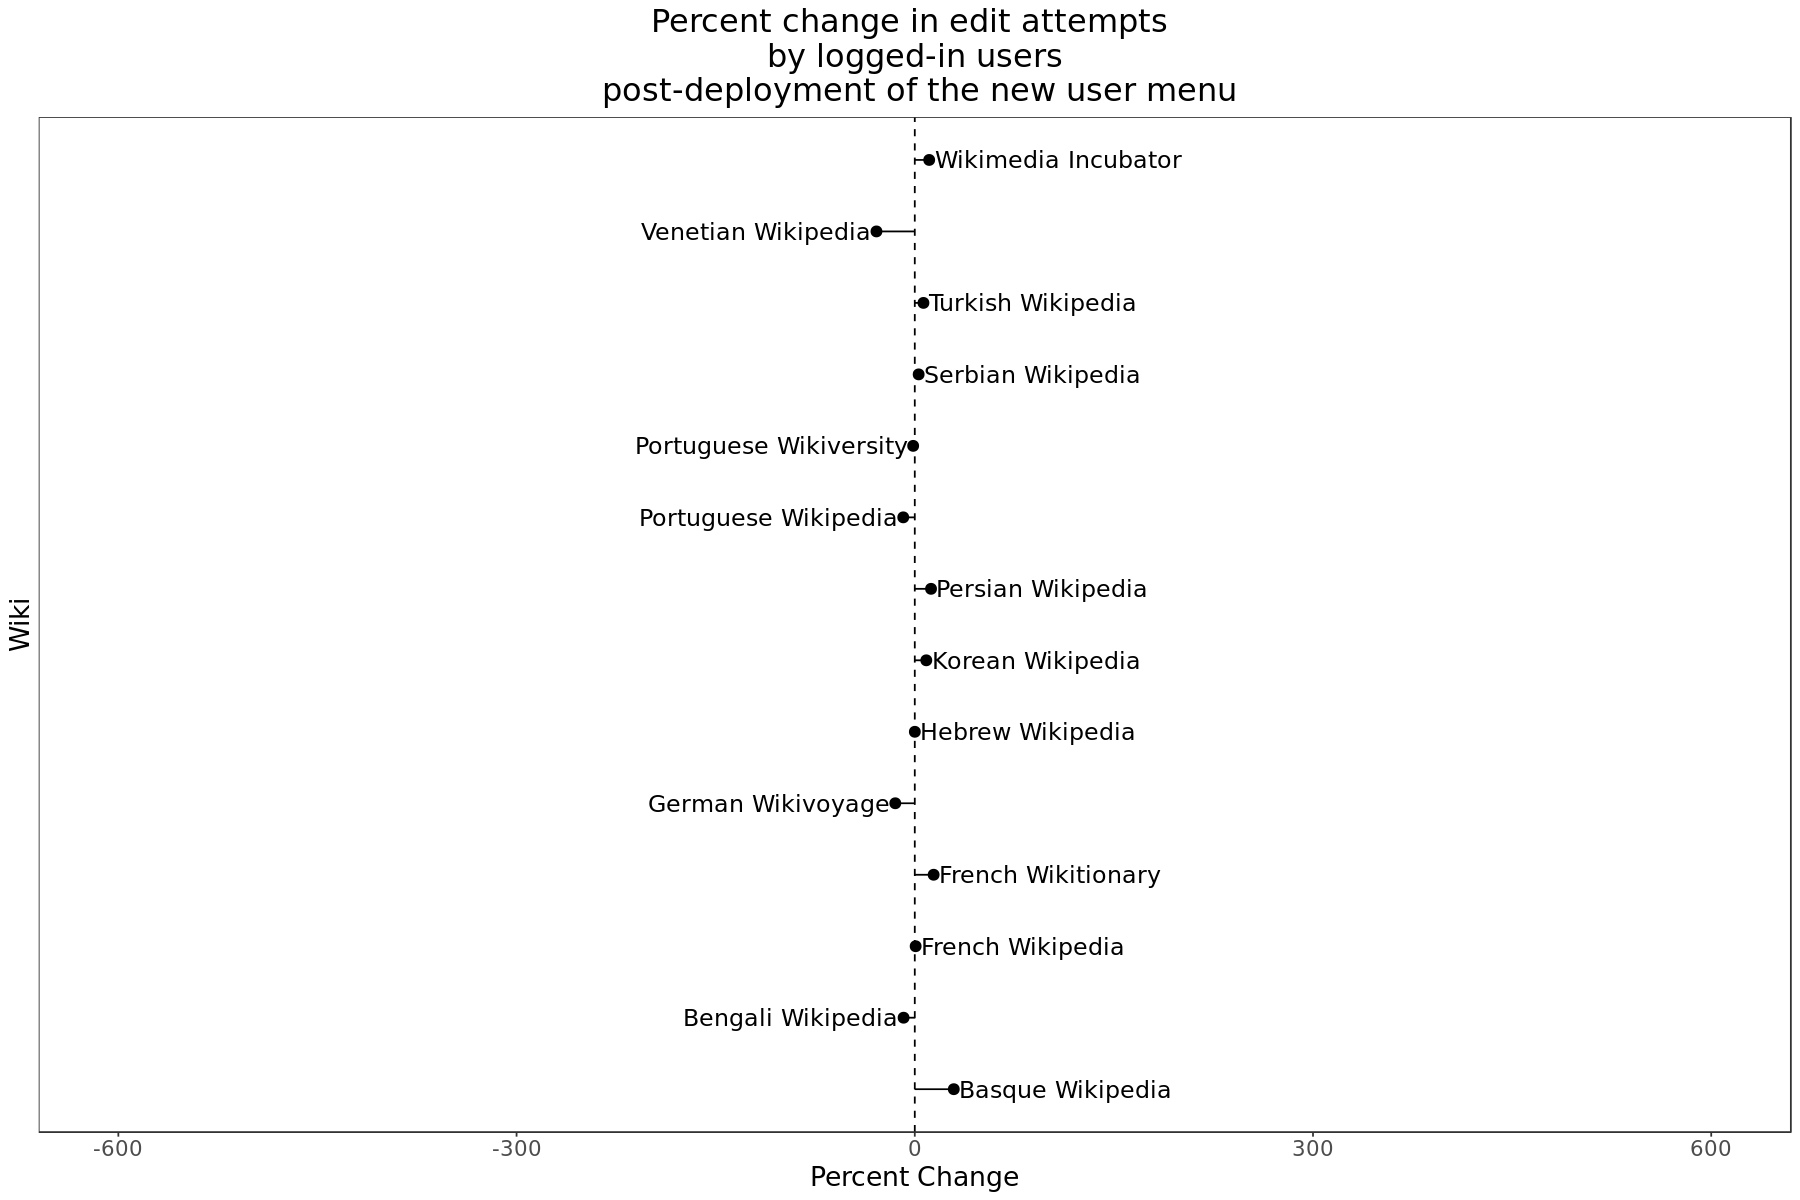

In [151]:








# chart percent change in logged-out sessions pre and post deployment for each of the early adopter wikis

pct_ea_g <- df_edit_attempt_prepost_w %>%
        filter( is.numeric(pct_change) & pre>0) %>%
        ggplot() +
        geom_hline(yintercept = 0, linetype = "dashed") +
        geom_pointrange(
            aes(x = wiki_name, ymin = 0, ymax = pct_change, y = pct_change)
        ) +
        geom_text(
            aes(
                y = pct_change + ifelse(pct_change < 0, -4, 4),
                x = wiki_name, label = wiki_name,
                hjust = ifelse(pct_change < 0, "right", "left")
            ),
            size = 5
        ) +
        scale_x_discrete(breaks = NULL) +
        coord_flip(ylim = c(-600, 600)) +
         labs (x = "Wiki",
                y = "Percent Change",
             title = "Percent change in edit attempts \n by logged-in users \n post-deployment of the new user menu") +
        theme_bw() +
        theme(
            panel.grid.major = element_blank(), 
            panel.grid.minor = element_blank(),
            panel.background = element_blank(),
            plot.title = element_text(hjust = 0.5),
            text = element_text(size=16)) 
      
pct_ea_g 





__Average percent change__

Average of the percent changes observed on each early adopter wiki

In [152]:

mean((filter(df_edit_attempt_prepost_w, is.numeric(pct_change) & pre>0))$pct_change, na.rm=TRUE)

[1] 1.688571

__Edits__

In [76]:
query_edits_nonbot <- "
SELECT
       DATE(event_timestamp) AS date_time, wiki_db, COUNT(revision_id) AS edits
FROM wmf.mediawiki_history
WHERE
        event_entity = 'revision' AND
        event_type = 'create' AND
        DATE(event_timestamp) BETWEEN '2021-07-01' AND  '2021-09-30' AND
        event_user_is_anonymous = false AND 
        size(event_user_is_bot_by_historical) = 0 AND size(event_user_is_bot_by) = 0  
        AND event_user_text not regexp '^.*bot([^a-z].*$|$)' 
        AND snapshot = '2021-12'
        AND  wiki_db IN ('frwiktionary' , 'hewiki' ,'ptwikiversity' ,'frwiki', 'euwiki' ,
         'fawiki' ,'ptwiki' , 'kowiki' , 'trwiki' , 'srwiki' , 'bnwiki' , 'dewikivoyage' ,
         'vecwiki' , 'incubatorwiki' )
GROUP BY DATE(event_timestamp), wiki_db
ORDER BY date_time, wiki_db
LIMIT 100000
"


In [77]:
df_edits_nonbot  <-  wmfdata::query_hive(query_edits_nonbot )

Don't forget to authenticate with Kerberos using kinit



In [78]:
df_edits_nonbot$date_time <- as.Date(df_edits_nonbot$date_time)

In [80]:
df_edits_nonbot <- df_edits_nonbot %>%
mutate(
wiki_name = case_when( #clarfiy Wiki project names
        wiki_db == 'frwiktionary' ~ "French Wikitionary",
        wiki_db == 'hewiki' ~ 'Hebrew Wikipedia',
        wiki_db == 'ptwikiversity' ~ 'Portuguese Wikiversity',
        wiki_db == 'frwiki'~ "French Wikipedia",
        wiki_db == 'euwiki' ~ "Basque Wikipedia",
        wiki_db == 'fawiki' ~ 'Persian Wikipedia',
        wiki_db == 'ptwiki' ~ 'Portuguese Wikipedia',
        wiki_db == 'kowiki' ~ 'Korean Wikipedia',
        wiki_db == 'trwiki' ~ 'Turkish Wikipedia',
        wiki_db == 'srwiki' ~ 'Serbian Wikipedia',
        wiki_db == 'bnwiki' ~ 'Bengali Wikipedia',
        wiki_db == 'dewikivoyage' ~ 'German Wikivoyage',
        wiki_db == 'vecwiki' ~ 'Venetian Wikipedia',
        wiki_db == 'incubatorwiki' ~ 'Wikimedia Incubator'),
)



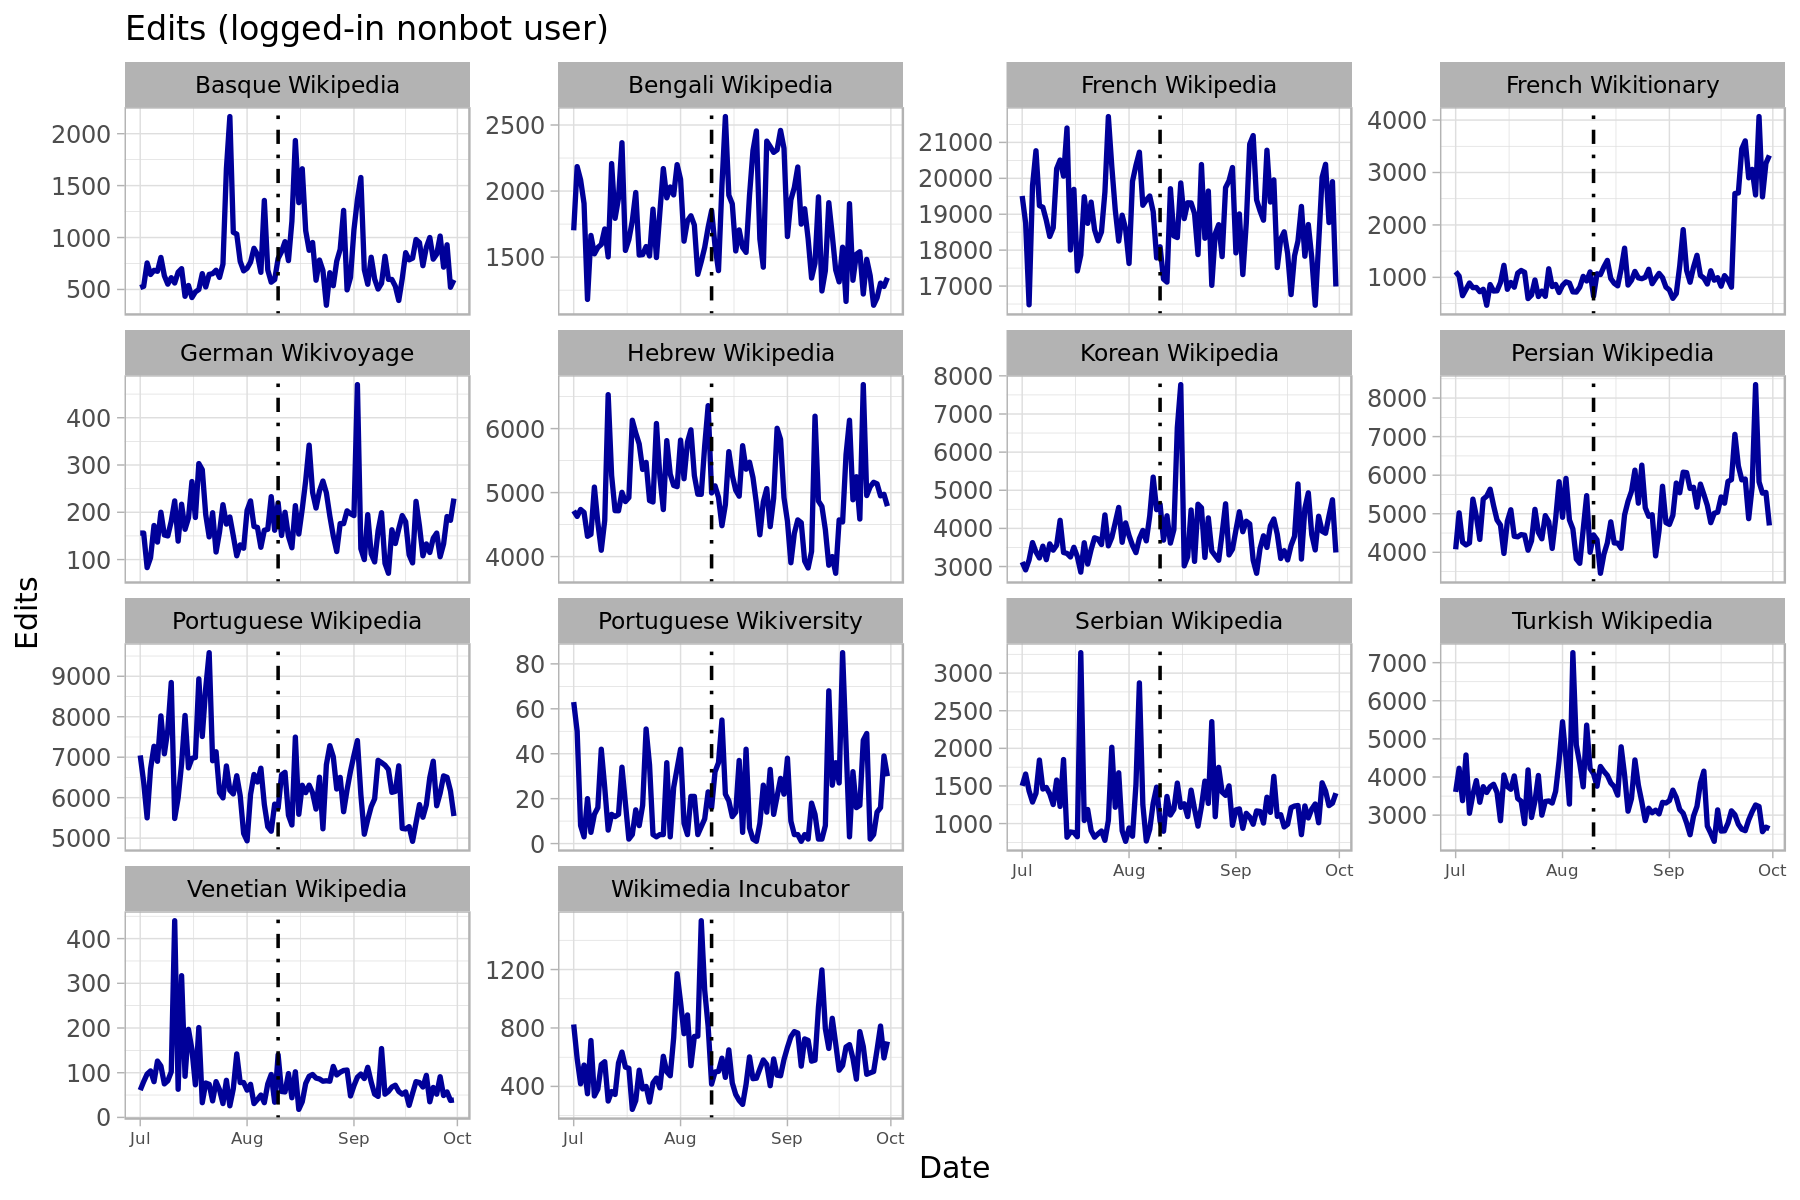

In [81]:
edits_g <- ggplot(data=df_edits_nonbot, 
                                mapping=aes(x=date_time)) +
geom_line(aes(y=edits ), color="#000099" , size = 1.5) +
geom_vline(aes(xintercept = as.numeric(as.Date('2021-08-10'))), linetype="dotdash", color="black", size=1)+
facet_wrap(~wiki_name,nrow=4,scale = 'free_y')+
labs(title = 'Edits (logged-in nonbot user) ',
     x = 'Date',
     y = 'Edits') +
theme_light(base_size=18) +
theme(legend.position = "bottom", 
     plot.caption = element_text(hjust = 0, face= "italic"),
     strip.text = element_text(size = 14, colour='black'),
     axis.text.x = element_text( size = 10 ),
     plot.title = element_text(size=20))
edits_g

In [153]:
# add column classifying pre and post deployment dates
df_edits_nonbot_prepost <- df_edits_nonbot %>%
    mutate(deployment = case_when(
        date_time >= '2021-07-13' & date_time <= '2021-08-09'  ~ 'pre',
        date_time >= '2021-08-10' & date_time <= '2021-09-06'  ~ 'post',      
        TRUE ~ 'NA'
    ))   %>%
       filter(deployment!='NA') %>%
    group_by(wiki_name, deployment) %>%
    summarize(sum_events = sum(edits),  .groups = 'drop')

df_edits_nonbot_prepost

wiki_name              deployment sum_events
1  Basque Wikipedia       post        26083    
2  Basque Wikipedia       pre         22019    
3  Bengali Wikipedia      post        54979    
4  Bengali Wikipedia      pre         49878    
5  French Wikipedia       post       528617    
6  French Wikipedia       pre        537592    
7  French Wikitionary     post        28780    
8  French Wikitionary     pre         24400    
9  German Wikivoyage      post         5636    
10 German Wikivoyage      pre          5139    
11 Hebrew Wikipedia       post       138104    
12 Hebrew Wikipedia       pre        150086    
13 Korean Wikipedia       post       114121    
14 Korean Wikipedia       pre        105147    
15 Persian Wikipedia      post       138512    
16 Persian Wikipedia      pre        129897    
17 Portuguese Wikipedia   post       174417    
18 Portuguese Wikipedia   pre        186046    
19 Portuguese Wikiversity post          507    
20 Portuguese Wikiversity pre           405    
21 Serbian Wikipedia      post        35355    
22 Serbian Wikipedia      pre         34505    
23 Turkish Wikipedia      post        99789    
24 Turkish Wikipedia      pre        110163    
25 Venetian Wikipedia     post         2339    
26 Venetian Wikipedia     pre          2391    
27 Wikimedia Incubator    post        14787    
28 Wikimedia Incubator    pre         17540

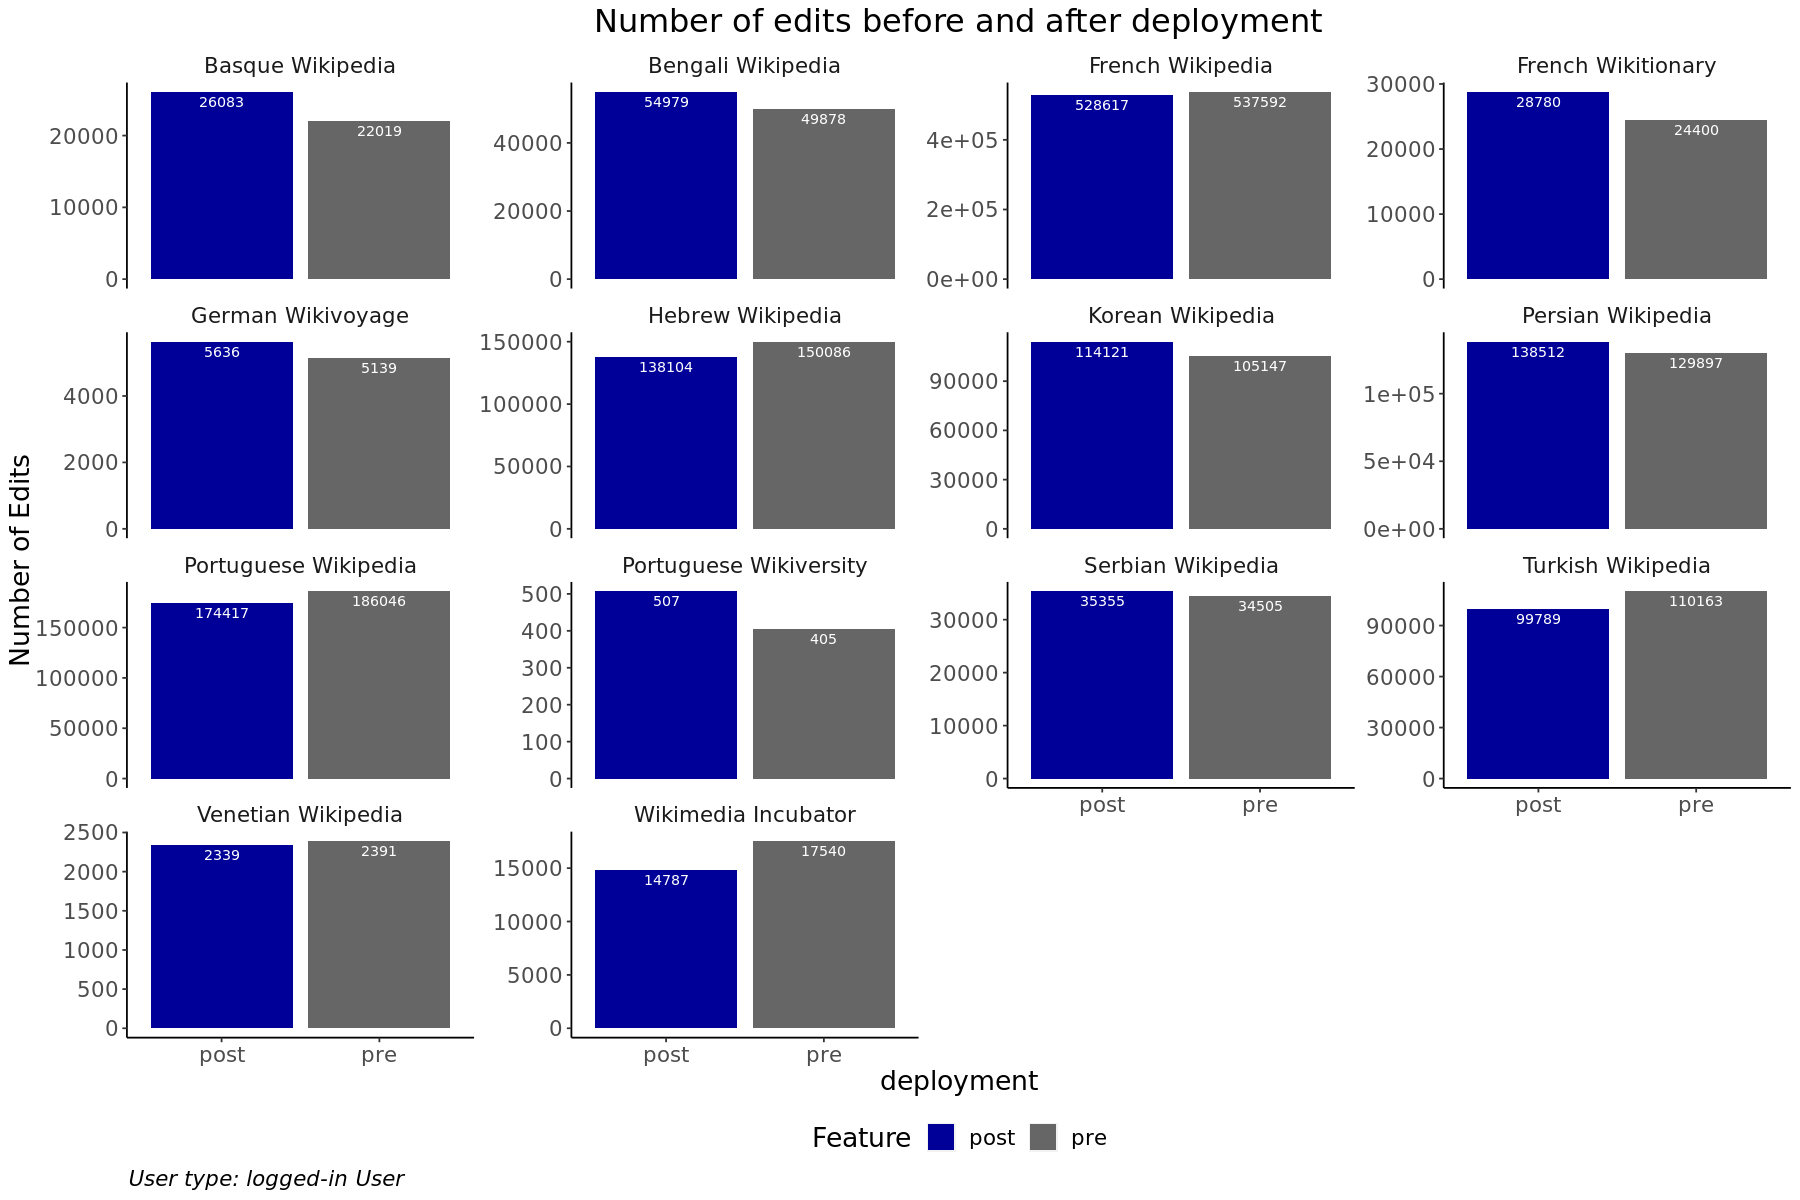

In [154]:
edits_barchart <- df_edits_nonbot_prepost %>%
        ggplot(aes(x = deployment, y= sum_events, fill=deployment)) +
        geom_bar(stat="identity", position = 'dodge') +
        geom_text(aes(label = paste(sum_events)), color = "white", position = position_dodge(0.9), vjust = 1.5, size = 3) +
        facet_wrap(~wiki_name, scale = 'free_y') +
        labs (
              y = "Number of Edits",
             title = "Number of edits before and after deployment",
             caption = "User type: logged-in User") +
     scale_fill_manual(values= c( "#000099", "#666666"), name = "Feature")  +
         theme(
            panel.grid.major = element_blank(), 
            panel.grid.minor = element_blank(),
            panel.background = element_blank(),
            plot.caption = element_text(hjust = 0, face= "italic"),
            strip.background =element_rect(fill="white"),
            plot.title = element_text(hjust = 0.5),
            text = element_text(size=16),
            axis.line = element_line(colour = "black"),
            legend.position = "bottom")

edits_barchart

__Determin the percentage of changes__

In [155]:
# determine percent change

df_edits_nonbot_prepost_w <- df_edits_nonbot_prepost %>%
  select(wiki_name, deployment,sum_events) %>%
  pivot_wider(names_from = deployment, values_from = sum_events) %>%
  mutate(pct_change=round((post-pre)/pre * 100 , 2))

df_edits_nonbot_prepost_w

wiki_name              post   pre    pct_change
1  Basque Wikipedia        26083  22019  18.46    
2  Bengali Wikipedia       54979  49878  10.23    
3  French Wikipedia       528617 537592  -1.67    
4  French Wikitionary      28780  24400  17.95    
5  German Wikivoyage        5636   5139   9.67    
6  Hebrew Wikipedia       138104 150086  -7.98    
7  Korean Wikipedia       114121 105147   8.53    
8  Persian Wikipedia      138512 129897   6.63    
9  Portuguese Wikipedia   174417 186046  -6.25    
10 Portuguese Wikiversity    507    405  25.19    
11 Serbian Wikipedia       35355  34505   2.46    
12 Turkish Wikipedia       99789 110163  -9.42    
13 Venetian Wikipedia       2339   2391  -2.17    
14 Wikimedia Incubator     14787  17540 -15.70

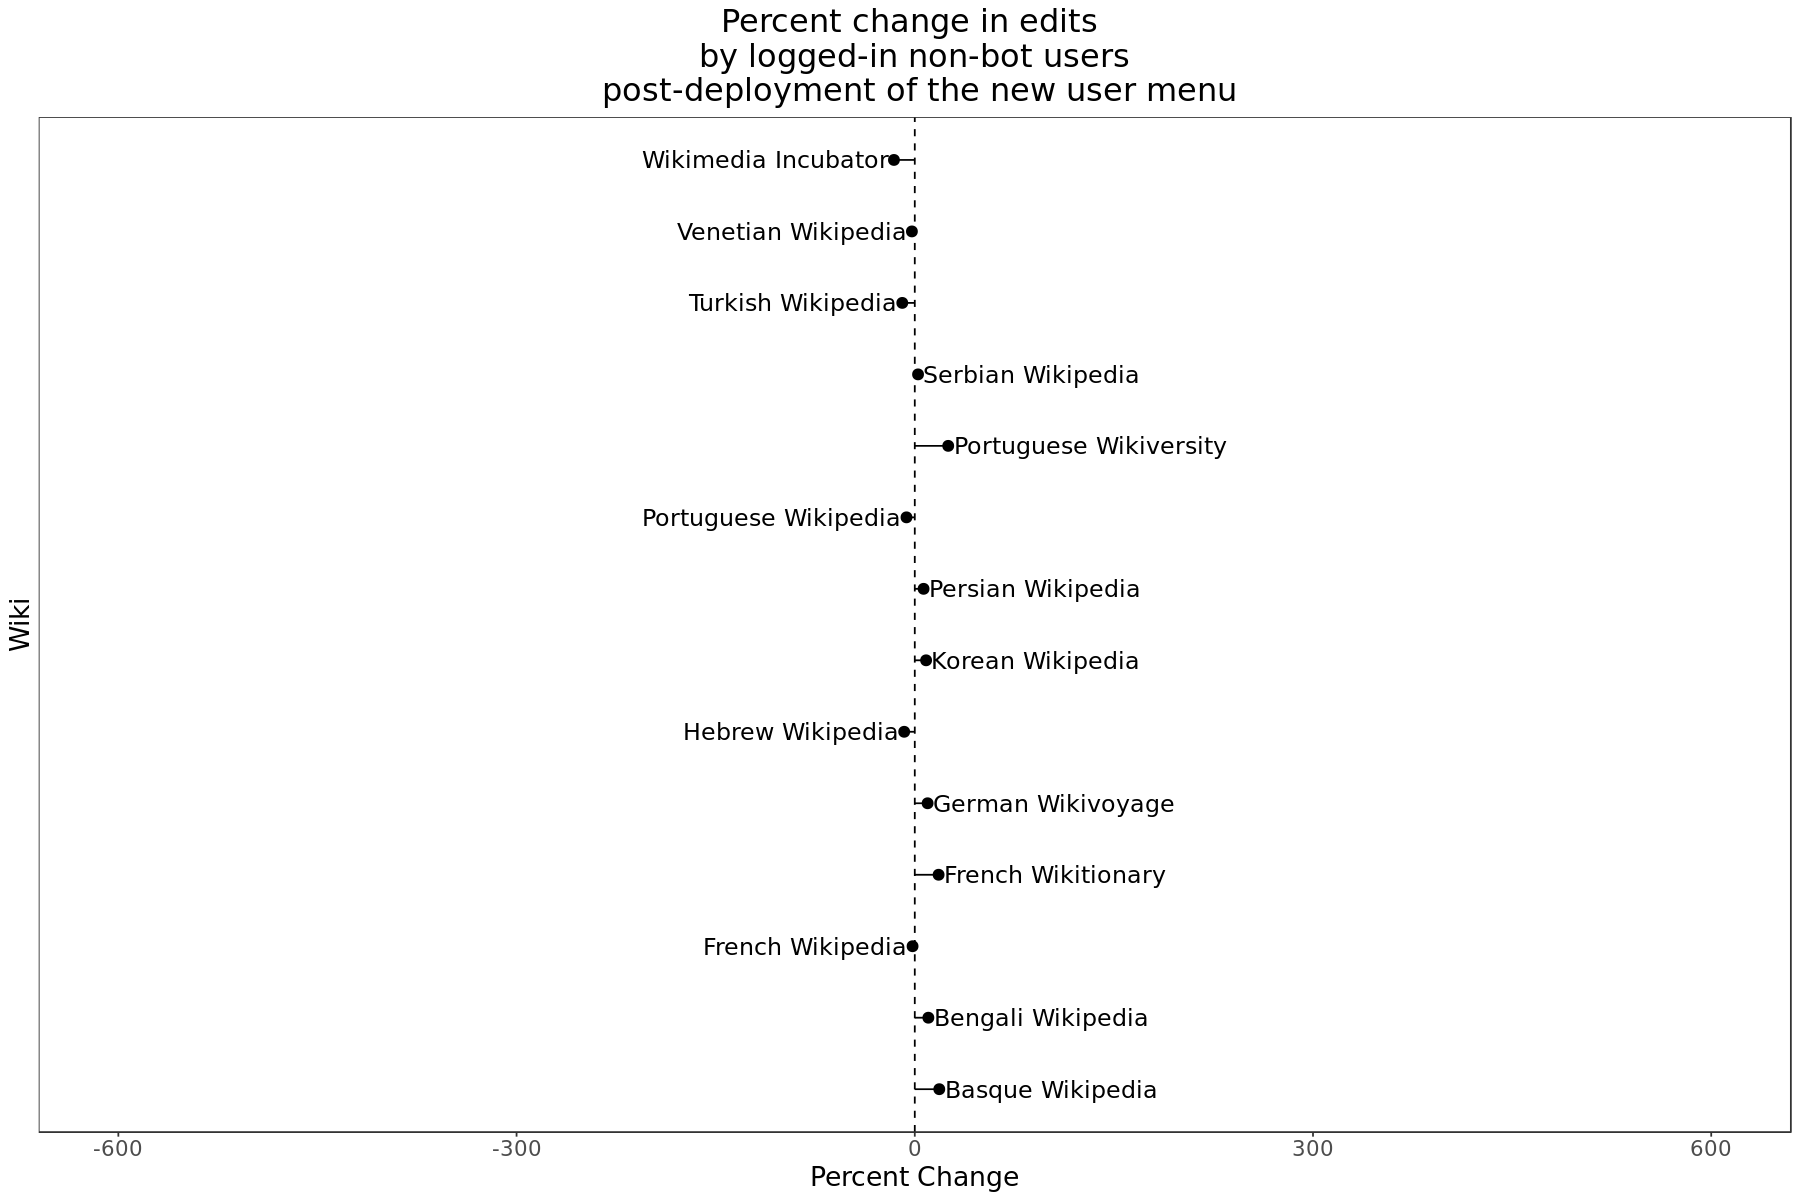

In [156]:
# chart percent change in logged-out sessions pre and post deployment for each of the early adopter wikis

pct_e_g <- df_edits_nonbot_prepost_w  %>%
        filter( is.numeric(pct_change) & pre>0) %>%
        ggplot() +
        geom_hline(yintercept = 0, linetype = "dashed") +
        geom_pointrange(
            aes(x = wiki_name, ymin = 0, ymax = pct_change, y = pct_change)
        ) +
        geom_text(
            aes(
                y = pct_change + ifelse(pct_change < 0, -4, 4),
                x = wiki_name, label = wiki_name,
                hjust = ifelse(pct_change < 0, "right", "left")
            ),
            size = 5
        ) +
        scale_x_discrete(breaks = NULL) +
        coord_flip(ylim = c(-600, 600)) +
         labs (x = "Wiki",
                y = "Percent Change",
             title = "Percent change in edits \n by logged-in non-bot users \n post-deployment of the new user menu") +
        theme_bw() +
        theme(
            panel.grid.major = element_blank(), 
            panel.grid.minor = element_blank(),
            panel.background = element_blank(),
            plot.title = element_text(hjust = 0.5),
            text = element_text(size=16)) 
      
pct_e_g 

__Average percent change__

Average of the percent changes observed on each early adopter wiki

In [157]:
mean((filter(df_edits_nonbot_prepost_w, is.numeric(pct_change) & pre>0))$pct_change, na.rm=TRUE)

[1] 3.995

__Summary__:



- Edit attempts by logged-in users do not have significant changes after  the deployment. 
- Edits by non-bot logged-in users do not have significant changes after the deployment.



# Pattern by edit buckets

In [82]:
query_user_link_clicks_2 <- 
"
SELECT TO_DATE(dt) AS event_date, 
    wiki, 
    event.name, 
    event.editCountBucket, 
    COUNT(1) AS clicks 
FROM event_sanitized.desktopwebuiactionstracking 
WHERE year=2021 and month >=7
AND event.action='click' 
AND NOT event.isAnon 
AND event.name IN ('pt-watchlist' , 'pt-mytalk', 
'pt-sandbox', 'pt-preferences', 'pt-betafeatures', 'pt-mycontris', 'pt-logout') 
AND wiki IN ('frwiktionary' , 'hewiki' ,'ptwikiversity' ,'frwiki', 'euwiki' ,
         'fawiki' ,'ptwiki' , 'kowiki' , 'trwiki' , 'srwiki' , 'bnwiki' , 'dewikivoyage' ,
         'vecwiki' , 'incubatorwiki' )
GROUP BY  TO_DATE(dt) , wiki, event.name, event.editCountBucket
"

In [88]:
df_user_link_clicks_editbuckets  <-  wmfdata::query_hive(query_user_link_clicks_2 )

Don't forget to authenticate with Kerberos using kinit



In [89]:
df_user_link_clicks_editbuckets$event_date <- as.Date(df_user_link_clicks_editbuckets$event_date)

In [90]:
df_user_link_clicks_editbuckets  <- df_user_link_clicks_editbuckets  %>%
mutate(
wiki_name = case_when( #clarfiy Wiki project names
        wiki == 'frwiktionary' ~ "French Wikitionary",
        wiki == 'hewiki' ~ 'Hebrew Wikipedia',
        wiki == 'ptwikiversity' ~ 'Portuguese Wikiversity',
        wiki == 'frwiki'~ "French Wikipedia",
        wiki == 'euwiki' ~ "Basque Wikipedia",
        wiki == 'fawiki' ~ 'Persian Wikipedia',
        wiki == 'ptwiki' ~ 'Portuguese Wikipedia',
        wiki == 'kowiki' ~ 'Korean Wikipedia',
        wiki == 'trwiki' ~ 'Turkish Wikipedia',
        wiki == 'srwiki' ~ 'Serbian Wikipedia',
        wiki == 'bnwiki' ~ 'Bengali Wikipedia',
        wiki == 'dewikivoyage' ~ 'German Wikivoyage',
        wiki == 'vecwiki' ~ 'Venetian Wikipedia',
        wiki == 'incubatorwiki' ~ 'Wikimedia Incubator'),
)

In [92]:
df_clicks_eb <- df_user_link_clicks_editbuckets   %>%
    group_by(editcountbucket, event_date) %>%
    summarize(user_link_clicks=sum(clicks, na.rm=TRUE), .groups='drop')


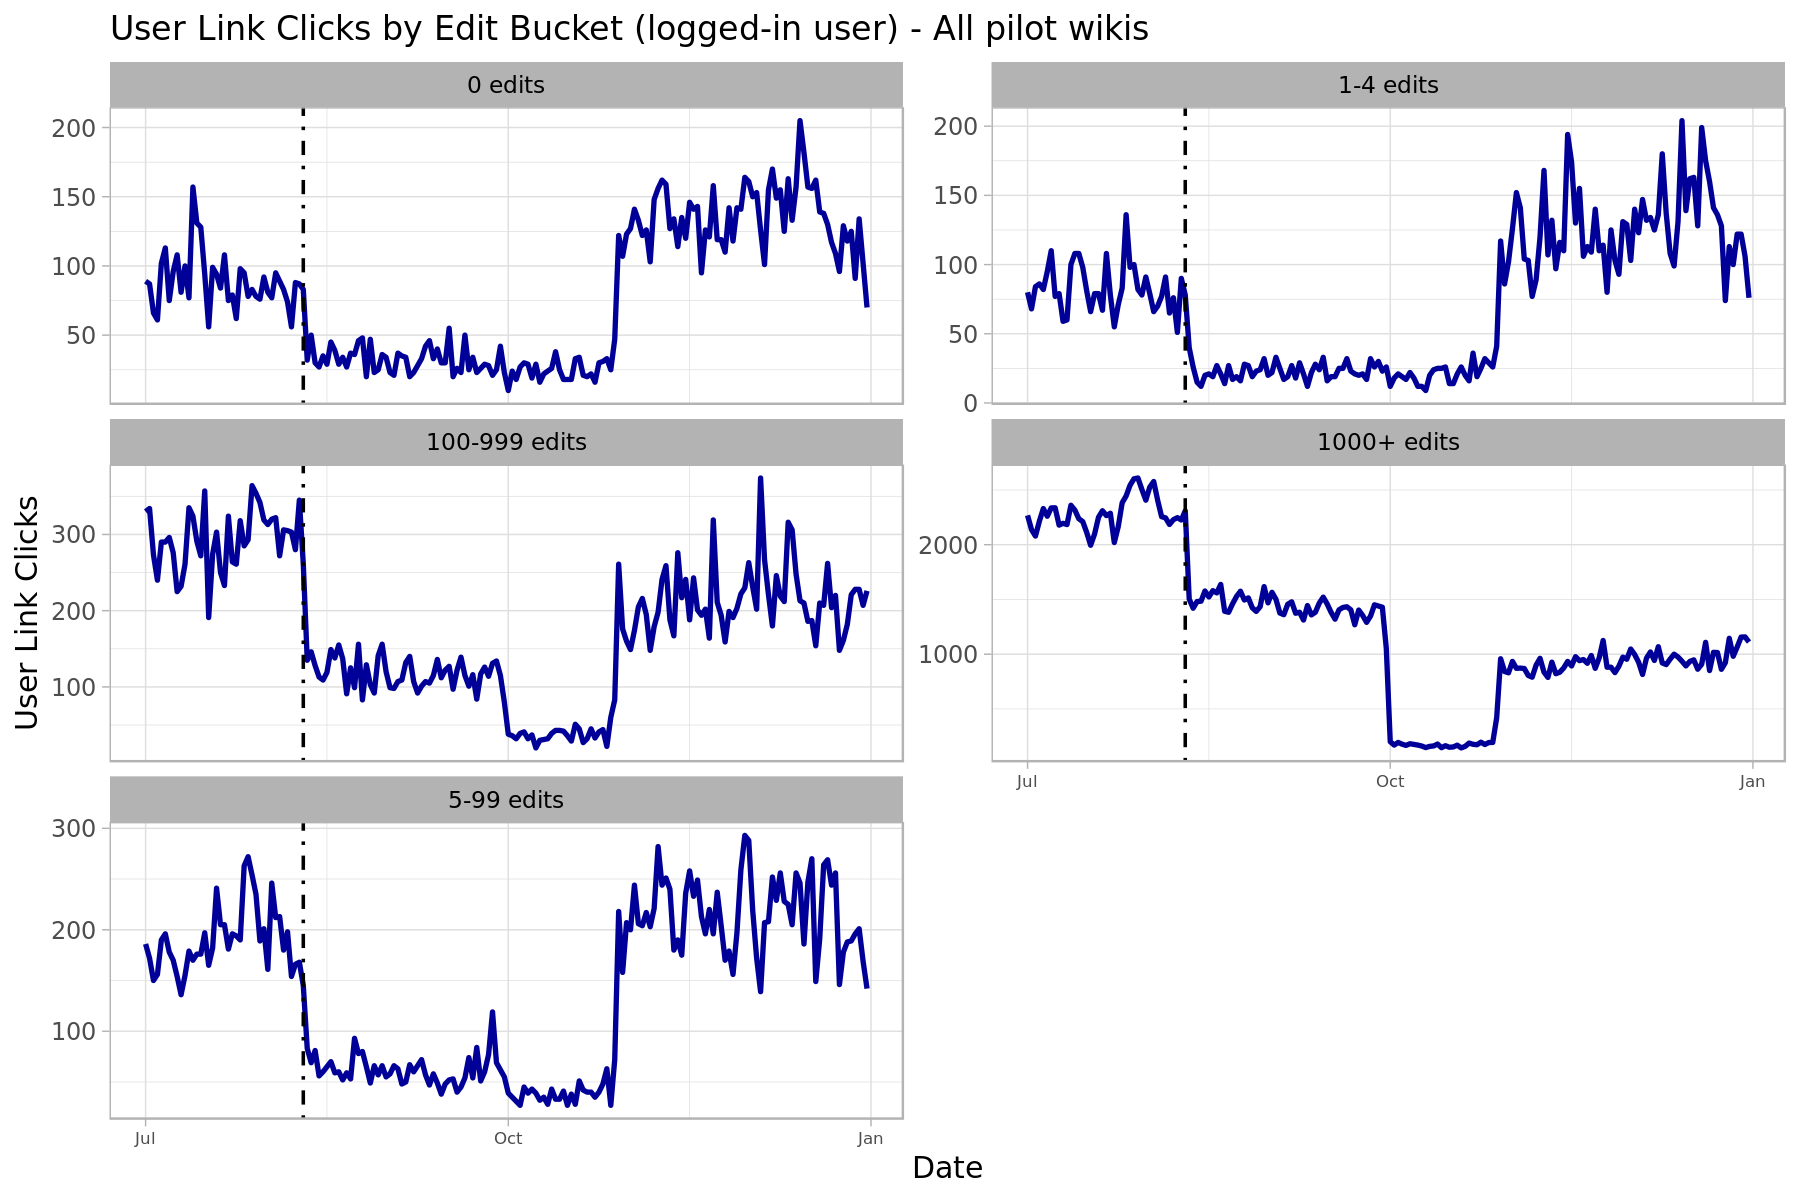

In [93]:
click_eb_g <- ggplot(data=df_clicks_eb , mapping=aes(x=event_date)) +
geom_line(aes(y=user_link_clicks ), color="#000099" , size = 1.5) +
geom_vline(aes(xintercept = as.numeric(as.Date('2021-08-10'))), linetype="dotdash", color="black", size=1)+
facet_wrap(~editcountbucket ,nrow=4,scale = 'free_y')+
labs(title = 'User Link Clicks by Edit Bucket (logged-in user) - All pilot wikis ',
     x = 'Date',
     y = 'User Link Clicks') +
theme_light(base_size=18) +
theme(legend.position = "bottom", 
     plot.caption = element_text(hjust = 0, face= "italic"),
     strip.text = element_text(size = 14, colour='black'),
     axis.text.x = element_text( size = 10 ),
     plot.title = element_text(size=20))
click_eb_g 

__Summary__:

- The user link clicks dropped since the user menu was deployed. The pattern is consistent across edits bucket groups. It is inline with our expectations. 
- Most of the clicks are from the 1000+ edits groups. Experienced users used this feature more often.
- The jump in Oct 28, 2021 is due to the change of sampling rate. https://phabricator.wikimedia.org/T292588
